In [5]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib
import warnings
warnings.filterwarnings('ignore')

cust_df = pd.read_csv('./train_santander.csv',encoding='latin-1')
print('dataset shape:', cust_df.shape)
cust_df.head(3)

dataset shape: (76020, 371)


ID  var3  var15  imp_ent_var16_ult1  imp_op_var39_comer_ult1  \
0   1     2     23                 0.0                      0.0   
1   3     2     34                 0.0                      0.0   
2   4     2     23                 0.0                      0.0   

   imp_op_var39_comer_ult3  imp_op_var40_comer_ult1  imp_op_var40_comer_ult3  \
0                      0.0                      0.0                      0.0   
1                      0.0                      0.0                      0.0   
2                      0.0                      0.0                      0.0   

   imp_op_var40_efect_ult1  imp_op_var40_efect_ult3  ...  \
0                      0.0                      0.0  ...   
1                      0.0                      0.0  ...   
2                      0.0                      0.0  ...   

   saldo_medio_var33_hace2  saldo_medio_var33_hace3  saldo_medio_var33_ult1  \
0                      0.0                      0.0                     0.0   
1                      0.0                      0.0                     0.0   
2                      0.0                      0.0                     0.0   

   saldo_medio_var33_ult3  saldo_medio_var44_hace2  saldo_medio_var44_hace3  \
0                     0.0                      0.0                      0.0   
1                     0.0                      0.0                      0.0   
2                     0.0                      0.0                      0.0   

   saldo_medio_var44_ult1  saldo_medio_var44_ult3     var38  TARGET  
0                     0.0                     0.0  39205.17       0  
1                     0.0                     0.0  49278.03       0  
2                     0.0                     0.0  67333.77       0  

[3 rows x 371 columns]

In [6]:
cust_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76020 entries, 0 to 76019
Columns: 371 entries, ID to TARGET
dtypes: float64(111), int64(260)
memory usage: 215.2 MB


In [7]:
cust_df.isnull().sum().sum()  # 결측치 없음 

0

In [8]:
# cust_df[cust_df['TARGET']==1].TARGET.count()  # 불만족 고객 
cust_df[cust_df['TARGET']==1].shape[0]

3008

In [9]:
print(cust_df['TARGET'].value_counts())
unsatisfied_cnt = cust_df[cust_df['TARGET']==1].TARGET.count()
total_cnt=cust_df.TARGET.count()
print('unsatisfied 비율은 {0:.2f}'.format((unsatisfied_cnt/total_cnt)))

0    73012
1     3008
Name: TARGET, dtype: int64
unsatisfied 비율은 0.04


In [10]:
cust_df.describe()

ID           var3         var15  imp_ent_var16_ult1  \
count   76020.000000   76020.000000  76020.000000        76020.000000   
mean    75964.050723   -1523.199277     33.212865           86.208265   
std     43781.947379   39033.462364     12.956486         1614.757313   
min         1.000000 -999999.000000      5.000000            0.000000   
25%     38104.750000       2.000000     23.000000            0.000000   
50%     76043.000000       2.000000     28.000000            0.000000   
75%    113748.750000       2.000000     40.000000            0.000000   
max    151838.000000     238.000000    105.000000       210000.000000   

       imp_op_var39_comer_ult1  imp_op_var39_comer_ult3  \
count             76020.000000             76020.000000   
mean                 72.363067               119.529632   
std                 339.315831               546.266294   
min                   0.000000                 0.000000   
25%                   0.000000                 0.000000   
50%                   0.000000                 0.000000   
75%                   0.000000                 0.000000   
max               12888.030000             21024.810000   

       imp_op_var40_comer_ult1  imp_op_var40_comer_ult3  \
count             76020.000000             76020.000000   
mean                  3.559130                 6.472698   
std                  93.155749               153.737066   
min                   0.000000                 0.000000   
25%                   0.000000                 0.000000   
50%                   0.000000                 0.000000   
75%                   0.000000                 0.000000   
max                8237.820000             11073.570000   

       imp_op_var40_efect_ult1  imp_op_var40_efect_ult3  ...  \
count             76020.000000             76020.000000  ...   
mean                  0.412946                 0.567352  ...   
std                  30.604864                36.513513  ...   
min                   0.000000                 0.000000  ...   
25%                   0.000000                 0.000000  ...   
50%                   0.000000                 0.000000  ...   
75%                   0.000000                 0.000000  ...   
max                6600.000000              6600.000000  ...   

       saldo_medio_var33_hace2  saldo_medio_var33_hace3  \
count             76020.000000             76020.000000   
mean                  7.935824                 1.365146   
std                 455.887218               113.959637   
min                   0.000000                 0.000000   
25%                   0.000000                 0.000000   
50%                   0.000000                 0.000000   
75%                   0.000000                 0.000000   
max               50003.880000             20385.720000   

       saldo_medio_var33_ult1  saldo_medio_var33_ult3  \
count            76020.000000            76020.000000   
mean                12.215580                8.784074   
std                783.207399              538.439211   
min                  0.000000                0.000000   
25%                  0.000000                0.000000   
50%                  0.000000                0.000000   
75%                  0.000000                0.000000   
max             138831.630000            91778.730000   

       saldo_medio_var44_hace2  saldo_medio_var44_hace3  \
count             76020.000000             76020.000000   
mean                 31.505324                 1.858575   
std                2013.125393               147.786584   
min                   0.000000                 0.000000   
25%                   0.000000                 0.000000   
50%                   0.000000                 0.000000   
75%                   0.000000                 0.000000   
max              438329.220000             24650.010000   

       saldo_medio_var44_ult1  saldo_medio_var44_ult3         var38  \
count            76020.000000            76020.000000  7.602000e+04   

In [11]:
cust_df['var3'].value_counts()

 2         74165
 8           138
-999999      116
 9           110
 3           108
           ...  
 231           1
 188           1
 168           1
 135           1
 87            1
Name: var3, Length: 208, dtype: int64

In [12]:
# var3 피처 값 대체 및 ID 대체 드롭
cust_df['var3'].replace(-999999, 2, inplace=True)
cust_df.drop('ID',axis=1,inplace=True)

# 피처 세트와 레이블 세트분리, 레이블 컬럼은 DataFrame의 맨 마지막에 위치해 컬럼 위치 -1로 분리 
X_features = cust_df.iloc[:,:-1]
y_labels = cust_df.iloc[:,-1]
print('피처 데이터 shape : {0}'.format(X_features.shape))

피처 데이터 shape : (76020, 369)


In [15]:
y_train.value_counts() 

0    58442
1     2374
Name: TARGET, dtype: int64

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_features, y_labels,
                                                    test_size=0.2, random_state=0)
train_cnt = y_train.count()
test_cnt = y_test.count()
print('학습 세트 Shape:{0}, 테스트 세트 Shape:{1}'.format(X_train.shape , X_test.shape))

print(' 학습 세트 레이블 값 분포 비율')
print(y_train.value_counts()/train_cnt)
print('\n 테스트 세트 레이블 값 분포 비율')
print(y_test.value_counts()/test_cnt)

학습 세트 Shape:(60816, 369), 테스트 세트 Shape:(15204, 369)
 학습 세트 레이블 값 분포 비율
0    0.960964
1    0.039036
Name: TARGET, dtype: float64

 테스트 세트 레이블 값 분포 비율
0    0.9583
1    0.0417
Name: TARGET, dtype: float64


In [16]:
# X_train, y_train을 다시 학습과 검증 데이터 세트로 분리. 
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train,
                                                    test_size=0.3, random_state=0)

## XGBoost 모델 학습

In [20]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

# n_estimators는 500으로, random_state는 예제 수행 시마다 동일 예측 결과를 위해 설정..
xgb_clf = XGBClassifier(n_estimators=500, learning_rate=0.05, random_state=156)

# 성능 평가 지표를 auc로, 조기 중단 파라미터는 100으로 설정하고 학습 수행
xgb_clf.fit(X_tr, y_tr, early_stopping_rounds=100, eval_metric='auc',eval_set=[(X_tr,y_tr),(X_val,y_val)])

xgb_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:,1], average='macro')
print('ROC AUC : {0:.4f}'.format(xgb_roc_score))

[0]	validation_0-auc:0.82179	validation_1-auc:0.80068
[1]	validation_0-auc:0.83092	validation_1-auc:0.80941
[2]	validation_0-auc:0.83207	validation_1-auc:0.80903
[3]	validation_0-auc:0.83288	validation_1-auc:0.80889
[4]	validation_0-auc:0.83414	validation_1-auc:0.80924
[5]	validation_0-auc:0.83524	validation_1-auc:0.80907
[6]	validation_0-auc:0.83568	validation_1-auc:0.81005
[7]	validation_0-auc:0.83741	validation_1-auc:0.81088
[8]	validation_0-auc:0.83896	validation_1-auc:0.81305
[9]	validation_0-auc:0.83949	validation_1-auc:0.81363
[10]	validation_0-auc:0.83908	validation_1-auc:0.81277
[11]	validation_0-auc:0.83913	validation_1-auc:0.81260
[12]	validation_0-auc:0.84009	validation_1-auc:0.81325
[13]	validation_0-auc:0.84081	validation_1-auc:0.81329
[14]	validation_0-auc:0.84196	validation_1-auc:0.81380
[15]	validation_0-auc:0.84394	validation_1-auc:0.81540
[16]	validation_0-auc:0.84414	validation_1-auc:0.81573
[17]	validation_0-auc:0.84437	validation_1-auc:0.81577
[18]	validation_0-au

[149]	validation_0-auc:0.90451	validation_1-auc:0.83346
[150]	validation_0-auc:0.90459	validation_1-auc:0.83343
[151]	validation_0-auc:0.90462	validation_1-auc:0.83344
[152]	validation_0-auc:0.90476	validation_1-auc:0.83342
[153]	validation_0-auc:0.90494	validation_1-auc:0.83339
[154]	validation_0-auc:0.90507	validation_1-auc:0.83336
[155]	validation_0-auc:0.90512	validation_1-auc:0.83334
[156]	validation_0-auc:0.90518	validation_1-auc:0.83331
[157]	validation_0-auc:0.90524	validation_1-auc:0.83339
[158]	validation_0-auc:0.90543	validation_1-auc:0.83330
[159]	validation_0-auc:0.90553	validation_1-auc:0.83331
[160]	validation_0-auc:0.90567	validation_1-auc:0.83342
[161]	validation_0-auc:0.90586	validation_1-auc:0.83339
[162]	validation_0-auc:0.90592	validation_1-auc:0.83340
[163]	validation_0-auc:0.90594	validation_1-auc:0.83340
[164]	validation_0-auc:0.90622	validation_1-auc:0.83337
[165]	validation_0-auc:0.90634	validation_1-auc:0.83333
[166]	validation_0-auc:0.90645	validation_1-auc:

## 하이퍼 파라미터 튜닝 

cross_val_score -> early_stopping을 수행할 수 없다

In [21]:
from hyperopt import hp

# max_depth는 5에서 15까지 1간격으로, min_child_weight는 1에서 6까지 1간격으로
# colsample_bytree는 0.5에서 0.95사이, learning_rate는 0.01에서 0.2사이 정규 분포된 값으로 검색. 

xgb_search_space = {'max_depth': hp.quniform('max_depth', 5, 15, 1), 
                    'min_child_weight': hp.quniform('min_child_weight', 1, 6, 1),
                    'colsample_bytree': hp.uniform('colsample_bytree', 0.5, 0.95),
                    'learning_rate': hp.uniform('learning_rate', 0.01, 0.2)
}

In [22]:
from sklearn.model_selection import KFold 
from sklearn.metrics import roc_auc_score

# 목적 함수 설정.
# 추후 fmin()에서 입력된 search_space값으로 XGBClassifier 교차 검증 학습 후 -1 * roc_auc 평균 값을 반환
def objective_func(search_space):
    xgb_clf = XGBClassifier(n_estimators=100,
                           max_depth=int(search_space['max_depth']),
                           min_child_weight=int(search_space['min_child_weight']),
                           colsample_bytree=search_space['colsample_bytree'],
                           learning_rate=search_space['learning_rate'])
    
    # 3개 k-fold 방식으로 평가된 roc-auc 지표를 담는 list
    roc_auc_list = []
    
    # 3개 k-fold 방식 적용
    kf = KFold(n_splits=3)
    
    # X_train을 다시 학습과 검증용 데이터로 분리 
    for tr_index, val_index in kf.split(X_train):
        # kf.split(X_train)으로 추출된 학습과 검증 index값으로 학습과 검증 데이터 세트 분리 
        X_tr, y_tr = X_train.iloc[tr_index], y_train.iloc[tr_index]
        X_val, y_val= X_train.iloc[val_index], y_train.iloc[val_index]
        
        # early stopping은 30회로 설정하고 추출된 학습과 검증 데이터로 XGBClassifier 학습 수행 
        xgb_clf.fit(X_tr, y_tr, early_stopping_rounds=30,eval_metric='auc',
                   eval_set=[(X_tr,y_tr),(X_val,y_val)])
        
        # 1로 예측한 확률값 추출후 roc auc 계산하고 평균 roc auc 계산을 위해 list에 결과값 담음
        score = roc_auc_score(y_val, xgb_clf.predict_proba(X_val)[:,1])
        roc_auc_list.append(score)
        
    # 3개 k-fold로 계산된 roc_auc값의 평균값을 반환하되,
    # HyperOpt는 목적함수의 최소값을 위한 입력값을 찾으므로 -1을 곱한 뒤 반환
    return -1 * np.mean(roc_auc_list)

In [23]:
from hyperopt import fmin, tpe, Trials

trials = Trials()

# fmin()함수를 호출. max_evals지정된 횟수만큼 반복 후 목적함수의 최소값을 가지는 최적 입력값 추출.
best = fmin(fn=objective_func,
            space=xgb_search_space,
            algo=tpe.suggest,
            max_evals=50, # 최대 반복 횟수를 지정합니다.
            trials=trials, rstate=np.random.default_rng(seed=30))

print('best:', best)

[0]	validation_0-auc:0.73641	validation_1-auc:0.69861                           
[1]	validation_0-auc:0.75284	validation_1-auc:0.71875                           
[2]	validation_0-auc:0.81276	validation_1-auc:0.78335                           
[3]	validation_0-auc:0.82546	validation_1-auc:0.79690                           
[4]	validation_0-auc:0.83346	validation_1-auc:0.80340                           
[5]	validation_0-auc:0.83938	validation_1-auc:0.81157                           
[6]	validation_0-auc:0.83512	validation_1-auc:0.80456                           
[7]	validation_0-auc:0.84044	validation_1-auc:0.81013                           
[8]	validation_0-auc:0.83842	validation_1-auc:0.80757                           
[9]	validation_0-auc:0.83590	validation_1-auc:0.80661                           
[10]	validation_0-auc:0.84039	validation_1-auc:0.81095                          
[11]	validation_0-auc:0.84409	validation_1-auc:0.81470                          
[12]	validation_0-auc:0.8479

[2]	validation_0-auc:0.81798	validation_1-auc:0.79614                           
[3]	validation_0-auc:0.82959	validation_1-auc:0.80970                           
[4]	validation_0-auc:0.83592	validation_1-auc:0.81619                           
[5]	validation_0-auc:0.84093	validation_1-auc:0.82171                           
[6]	validation_0-auc:0.84019	validation_1-auc:0.81997                           
[7]	validation_0-auc:0.84429	validation_1-auc:0.82344                           
[8]	validation_0-auc:0.84426	validation_1-auc:0.82073                           
[9]	validation_0-auc:0.84243	validation_1-auc:0.81729                           
[10]	validation_0-auc:0.84577	validation_1-auc:0.82023                          
[11]	validation_0-auc:0.84788	validation_1-auc:0.82274                          
[12]	validation_0-auc:0.85128	validation_1-auc:0.82473                          
[13]	validation_0-auc:0.85056	validation_1-auc:0.82337                          
[14]	validation_0-auc:0.8525

[16]	validation_0-auc:0.85612	validation_1-auc:0.82445                          
[17]	validation_0-auc:0.85698	validation_1-auc:0.82486                          
[18]	validation_0-auc:0.85785	validation_1-auc:0.82587                          
[19]	validation_0-auc:0.85937	validation_1-auc:0.82707                          
[20]	validation_0-auc:0.86035	validation_1-auc:0.82753                          
[21]	validation_0-auc:0.86110	validation_1-auc:0.82793                          
[22]	validation_0-auc:0.86209	validation_1-auc:0.82839                          
[23]	validation_0-auc:0.86312	validation_1-auc:0.82905                          
[24]	validation_0-auc:0.86378	validation_1-auc:0.82896                          
[25]	validation_0-auc:0.86456	validation_1-auc:0.82872                          
[26]	validation_0-auc:0.86597	validation_1-auc:0.82988                          
[27]	validation_0-auc:0.86674	validation_1-auc:0.82992                          
[28]	validation_0-auc:0.8687

[17]	validation_0-auc:0.86183	validation_1-auc:0.81772                          
[18]	validation_0-auc:0.86599	validation_1-auc:0.81944                          
[19]	validation_0-auc:0.86715	validation_1-auc:0.82025                          
[20]	validation_0-auc:0.86833	validation_1-auc:0.82136                          
[21]	validation_0-auc:0.86998	validation_1-auc:0.82206                          
[22]	validation_0-auc:0.87023	validation_1-auc:0.82092                          
[23]	validation_0-auc:0.87054	validation_1-auc:0.82042                          
[24]	validation_0-auc:0.87077	validation_1-auc:0.81875                          
[25]	validation_0-auc:0.87258	validation_1-auc:0.81780                          
[26]	validation_0-auc:0.87563	validation_1-auc:0.81976                          
[27]	validation_0-auc:0.87815	validation_1-auc:0.82154                          
[28]	validation_0-auc:0.87943	validation_1-auc:0.82263                          
[29]	validation_0-auc:0.8816

[18]	validation_0-auc:0.86869	validation_1-auc:0.82533                          
[19]	validation_0-auc:0.87068	validation_1-auc:0.82654                          
[20]	validation_0-auc:0.87137	validation_1-auc:0.82788                          
[21]	validation_0-auc:0.87382	validation_1-auc:0.82906                          
[22]	validation_0-auc:0.87315	validation_1-auc:0.82754                          
[23]	validation_0-auc:0.87337	validation_1-auc:0.82614                          
[24]	validation_0-auc:0.87434	validation_1-auc:0.82443                          
[25]	validation_0-auc:0.87623	validation_1-auc:0.82308                          
[26]	validation_0-auc:0.87803	validation_1-auc:0.82406                          
[27]	validation_0-auc:0.87993	validation_1-auc:0.82435                          
[28]	validation_0-auc:0.88141	validation_1-auc:0.82535                          
[29]	validation_0-auc:0.88360	validation_1-auc:0.82618                          
[30]	validation_0-auc:0.8838

[19]	validation_0-auc:0.87204	validation_1-auc:0.82326                          
[20]	validation_0-auc:0.87294	validation_1-auc:0.82448                          
[21]	validation_0-auc:0.87482	validation_1-auc:0.82497                          
[22]	validation_0-auc:0.87559	validation_1-auc:0.82388                          
[23]	validation_0-auc:0.87554	validation_1-auc:0.82269                          
[24]	validation_0-auc:0.87562	validation_1-auc:0.82175                          
[25]	validation_0-auc:0.87698	validation_1-auc:0.82143                          
[26]	validation_0-auc:0.87923	validation_1-auc:0.82221                          
[27]	validation_0-auc:0.88080	validation_1-auc:0.82286                          
[28]	validation_0-auc:0.88237	validation_1-auc:0.82366                          
[29]	validation_0-auc:0.88441	validation_1-auc:0.82438                          
[30]	validation_0-auc:0.88472	validation_1-auc:0.82372                          
[31]	validation_0-auc:0.8851

[20]	validation_0-auc:0.90497	validation_1-auc:0.82820                          
[21]	validation_0-auc:0.90785	validation_1-auc:0.82924                          
[22]	validation_0-auc:0.91101	validation_1-auc:0.82930                          
[23]	validation_0-auc:0.91457	validation_1-auc:0.82950                          
[24]	validation_0-auc:0.91653	validation_1-auc:0.82842                          
[25]	validation_0-auc:0.91781	validation_1-auc:0.82777                          
[26]	validation_0-auc:0.92092	validation_1-auc:0.82862                          
[27]	validation_0-auc:0.92311	validation_1-auc:0.82860                          
[28]	validation_0-auc:0.92481	validation_1-auc:0.82888                          
[29]	validation_0-auc:0.92600	validation_1-auc:0.82961                          
[30]	validation_0-auc:0.92738	validation_1-auc:0.82983                          
[31]	validation_0-auc:0.92881	validation_1-auc:0.82958                          
[32]	validation_0-auc:0.9305

[10]	validation_0-auc:0.88048	validation_1-auc:0.81545                          
[11]	validation_0-auc:0.88447	validation_1-auc:0.81935                          
[12]	validation_0-auc:0.88808	validation_1-auc:0.82148                          
[13]	validation_0-auc:0.88920	validation_1-auc:0.81926                          
[14]	validation_0-auc:0.89271	validation_1-auc:0.82155                          
[15]	validation_0-auc:0.89602	validation_1-auc:0.82305                          
[16]	validation_0-auc:0.89819	validation_1-auc:0.82370                          
[17]	validation_0-auc:0.89978	validation_1-auc:0.82316                          
[18]	validation_0-auc:0.90379	validation_1-auc:0.82558                          
[19]	validation_0-auc:0.90670	validation_1-auc:0.82568                          
[20]	validation_0-auc:0.90828	validation_1-auc:0.82563                          
[21]	validation_0-auc:0.91162	validation_1-auc:0.82641                          
[22]	validation_0-auc:0.9138

[34]	validation_0-auc:0.88431	validation_1-auc:0.82422                          
[35]	validation_0-auc:0.88543	validation_1-auc:0.82478                          
[36]	validation_0-auc:0.88604	validation_1-auc:0.82517                          
[37]	validation_0-auc:0.88739	validation_1-auc:0.82549                          
[38]	validation_0-auc:0.88856	validation_1-auc:0.82608                          
[39]	validation_0-auc:0.88901	validation_1-auc:0.82667                          
[40]	validation_0-auc:0.88929	validation_1-auc:0.82575                          
[41]	validation_0-auc:0.88973	validation_1-auc:0.82615                          
[42]	validation_0-auc:0.89035	validation_1-auc:0.82607                          
[43]	validation_0-auc:0.89141	validation_1-auc:0.82626                          
[44]	validation_0-auc:0.89279	validation_1-auc:0.82651                          
[45]	validation_0-auc:0.89383	validation_1-auc:0.82624                          
[46]	validation_0-auc:0.8949

[35]	validation_0-auc:0.88687	validation_1-auc:0.82821                          
[36]	validation_0-auc:0.88784	validation_1-auc:0.82913                          
[37]	validation_0-auc:0.88964	validation_1-auc:0.82972                          
[38]	validation_0-auc:0.89101	validation_1-auc:0.83019                          
[39]	validation_0-auc:0.89176	validation_1-auc:0.83061                          
[40]	validation_0-auc:0.89171	validation_1-auc:0.83011                          
[41]	validation_0-auc:0.89202	validation_1-auc:0.83026                          
[42]	validation_0-auc:0.89258	validation_1-auc:0.83055                          
[43]	validation_0-auc:0.89337	validation_1-auc:0.83096                          
[44]	validation_0-auc:0.89434	validation_1-auc:0.83097                          
[45]	validation_0-auc:0.89582	validation_1-auc:0.83135                          
[46]	validation_0-auc:0.89663	validation_1-auc:0.83179                          
[47]	validation_0-auc:0.8970

[36]	validation_0-auc:0.89024	validation_1-auc:0.82913                          
[37]	validation_0-auc:0.89094	validation_1-auc:0.82886                          
[38]	validation_0-auc:0.89230	validation_1-auc:0.82899                          
[39]	validation_0-auc:0.89297	validation_1-auc:0.82943                          
[40]	validation_0-auc:0.89364	validation_1-auc:0.82813                          
[41]	validation_0-auc:0.89414	validation_1-auc:0.82846                          
[42]	validation_0-auc:0.89480	validation_1-auc:0.82871                          
[43]	validation_0-auc:0.89502	validation_1-auc:0.82916                          
[44]	validation_0-auc:0.89619	validation_1-auc:0.82955                          
[45]	validation_0-auc:0.89685	validation_1-auc:0.82964                          
[46]	validation_0-auc:0.89758	validation_1-auc:0.82969                          
[47]	validation_0-auc:0.89824	validation_1-auc:0.82976                          
[48]	validation_0-auc:0.8988

[4]	validation_0-auc:0.86353	validation_1-auc:0.82046                           
[5]	validation_0-auc:0.86911	validation_1-auc:0.82615                           
[6]	validation_0-auc:0.87441	validation_1-auc:0.82154                           
[7]	validation_0-auc:0.88322	validation_1-auc:0.82356                           
[8]	validation_0-auc:0.88502	validation_1-auc:0.82171                           
[9]	validation_0-auc:0.88463	validation_1-auc:0.81658                           
[10]	validation_0-auc:0.89259	validation_1-auc:0.82007                          
[11]	validation_0-auc:0.89700	validation_1-auc:0.82267                          
[12]	validation_0-auc:0.89994	validation_1-auc:0.82598                          
[13]	validation_0-auc:0.89960	validation_1-auc:0.82464                          
[14]	validation_0-auc:0.90407	validation_1-auc:0.82526                          
[15]	validation_0-auc:0.90763	validation_1-auc:0.82786                          
[16]	validation_0-auc:0.9136

[27]	validation_0-auc:0.94165	validation_1-auc:0.82766                          
[28]	validation_0-auc:0.94339	validation_1-auc:0.82827                          
[29]	validation_0-auc:0.94509	validation_1-auc:0.82839                          
[30]	validation_0-auc:0.94634	validation_1-auc:0.82796                          
[31]	validation_0-auc:0.94678	validation_1-auc:0.82792                          
[32]	validation_0-auc:0.94798	validation_1-auc:0.82881                          
[33]	validation_0-auc:0.94866	validation_1-auc:0.82940                          
[34]	validation_0-auc:0.94938	validation_1-auc:0.82963                          
[35]	validation_0-auc:0.94997	validation_1-auc:0.82990                          
[36]	validation_0-auc:0.95058	validation_1-auc:0.82961                          
[37]	validation_0-auc:0.95097	validation_1-auc:0.82947                          
[38]	validation_0-auc:0.95136	validation_1-auc:0.82987                          
[39]	validation_0-auc:0.9517

[57]	validation_0-auc:0.89585	validation_1-auc:0.83434                          
[58]	validation_0-auc:0.89668	validation_1-auc:0.83409                          
[59]	validation_0-auc:0.89735	validation_1-auc:0.83409                          
[60]	validation_0-auc:0.89748	validation_1-auc:0.83427                          
[61]	validation_0-auc:0.89764	validation_1-auc:0.83425                          
[62]	validation_0-auc:0.89776	validation_1-auc:0.83411                          
[63]	validation_0-auc:0.89814	validation_1-auc:0.83387                          
[64]	validation_0-auc:0.89877	validation_1-auc:0.83379                          
[65]	validation_0-auc:0.89911	validation_1-auc:0.83389                          
[66]	validation_0-auc:0.89936	validation_1-auc:0.83398                          
[67]	validation_0-auc:0.89983	validation_1-auc:0.83391                          
[68]	validation_0-auc:0.90003	validation_1-auc:0.83390                          
[69]	validation_0-auc:0.9005

[72]	validation_0-auc:0.90129	validation_1-auc:0.83663                          
[73]	validation_0-auc:0.90181	validation_1-auc:0.83690                          
[74]	validation_0-auc:0.90192	validation_1-auc:0.83672                          
[75]	validation_0-auc:0.90201	validation_1-auc:0.83665                          
[76]	validation_0-auc:0.90234	validation_1-auc:0.83686                          
[77]	validation_0-auc:0.90260	validation_1-auc:0.83679                          
[78]	validation_0-auc:0.90277	validation_1-auc:0.83677                          
[79]	validation_0-auc:0.90311	validation_1-auc:0.83681                          
[80]	validation_0-auc:0.90333	validation_1-auc:0.83689                          
[81]	validation_0-auc:0.90355	validation_1-auc:0.83692                          
[82]	validation_0-auc:0.90428	validation_1-auc:0.83725                          
[83]	validation_0-auc:0.90459	validation_1-auc:0.83720                          
[84]	validation_0-auc:0.9051

[73]	validation_0-auc:0.90339	validation_1-auc:0.83638                          
[74]	validation_0-auc:0.90345	validation_1-auc:0.83659                          
[75]	validation_0-auc:0.90365	validation_1-auc:0.83655                          
[76]	validation_0-auc:0.90397	validation_1-auc:0.83679                          
[77]	validation_0-auc:0.90446	validation_1-auc:0.83680                          
[78]	validation_0-auc:0.90471	validation_1-auc:0.83655                          
[79]	validation_0-auc:0.90493	validation_1-auc:0.83660                          
[80]	validation_0-auc:0.90516	validation_1-auc:0.83648                          
[81]	validation_0-auc:0.90564	validation_1-auc:0.83636                          
[82]	validation_0-auc:0.90611	validation_1-auc:0.83642                          
[83]	validation_0-auc:0.90639	validation_1-auc:0.83633                          
[84]	validation_0-auc:0.90665	validation_1-auc:0.83648                          
[85]	validation_0-auc:0.9072

[6]	validation_0-auc:0.84884	validation_1-auc:0.81961                           
[7]	validation_0-auc:0.85176	validation_1-auc:0.82182                           
[8]	validation_0-auc:0.85152	validation_1-auc:0.81912                           
[9]	validation_0-auc:0.85070	validation_1-auc:0.81588                           
[10]	validation_0-auc:0.85499	validation_1-auc:0.82145                          
[11]	validation_0-auc:0.85649	validation_1-auc:0.82355                          
[12]	validation_0-auc:0.85974	validation_1-auc:0.82505                          
[13]	validation_0-auc:0.85940	validation_1-auc:0.82340                          
[14]	validation_0-auc:0.86029	validation_1-auc:0.82188                          
[15]	validation_0-auc:0.86328	validation_1-auc:0.82476                          
[16]	validation_0-auc:0.86457	validation_1-auc:0.82568                          
[17]	validation_0-auc:0.86612	validation_1-auc:0.82771                          
[18]	validation_0-auc:0.8692

[23]	validation_0-auc:0.87722	validation_1-auc:0.82802                          
[24]	validation_0-auc:0.87736	validation_1-auc:0.82686                          
[25]	validation_0-auc:0.87816	validation_1-auc:0.82719                          
[26]	validation_0-auc:0.88102	validation_1-auc:0.82854                          
[27]	validation_0-auc:0.88408	validation_1-auc:0.83163                          
[28]	validation_0-auc:0.88516	validation_1-auc:0.83187                          
[29]	validation_0-auc:0.88702	validation_1-auc:0.83282                          
[30]	validation_0-auc:0.88797	validation_1-auc:0.83295                          
[31]	validation_0-auc:0.88793	validation_1-auc:0.83246                          
[32]	validation_0-auc:0.88932	validation_1-auc:0.83365                          
[33]	validation_0-auc:0.89046	validation_1-auc:0.83419                          
[34]	validation_0-auc:0.89185	validation_1-auc:0.83498                          
[35]	validation_0-auc:0.8927

[25]	validation_0-auc:0.89113	validation_1-auc:0.82501                          
[26]	validation_0-auc:0.89358	validation_1-auc:0.82639                          
[27]	validation_0-auc:0.89503	validation_1-auc:0.82727                          
[28]	validation_0-auc:0.89747	validation_1-auc:0.82786                          
[29]	validation_0-auc:0.89931	validation_1-auc:0.82877                          
[30]	validation_0-auc:0.90044	validation_1-auc:0.82937                          
[31]	validation_0-auc:0.90146	validation_1-auc:0.82830                          
[32]	validation_0-auc:0.90287	validation_1-auc:0.82877                          
[33]	validation_0-auc:0.90404	validation_1-auc:0.82914                          
[34]	validation_0-auc:0.90560	validation_1-auc:0.82939                          
[35]	validation_0-auc:0.90638	validation_1-auc:0.82967                          
[36]	validation_0-auc:0.90726	validation_1-auc:0.82960                          
[37]	validation_0-auc:0.9086

[35]	validation_0-auc:0.90798	validation_1-auc:0.82925                          
[36]	validation_0-auc:0.90902	validation_1-auc:0.83019                          
[37]	validation_0-auc:0.91132	validation_1-auc:0.82993                          
[38]	validation_0-auc:0.91231	validation_1-auc:0.82968                          
[39]	validation_0-auc:0.91318	validation_1-auc:0.82992                          
[40]	validation_0-auc:0.91342	validation_1-auc:0.82991                          
[41]	validation_0-auc:0.91490	validation_1-auc:0.83042                          
[42]	validation_0-auc:0.91587	validation_1-auc:0.83067                          
[43]	validation_0-auc:0.91640	validation_1-auc:0.83081                          
[44]	validation_0-auc:0.91751	validation_1-auc:0.83141                          
[45]	validation_0-auc:0.91851	validation_1-auc:0.83142                          
[46]	validation_0-auc:0.91933	validation_1-auc:0.83153                          
[47]	validation_0-auc:0.9201

[36]	validation_0-auc:0.91143	validation_1-auc:0.82790                          
[37]	validation_0-auc:0.91287	validation_1-auc:0.82804                          
[38]	validation_0-auc:0.91422	validation_1-auc:0.82751                          
[39]	validation_0-auc:0.91478	validation_1-auc:0.82762                          
[40]	validation_0-auc:0.91581	validation_1-auc:0.82714                          
[41]	validation_0-auc:0.91669	validation_1-auc:0.82729                          
[42]	validation_0-auc:0.91716	validation_1-auc:0.82743                          
[43]	validation_0-auc:0.91754	validation_1-auc:0.82786                          
[44]	validation_0-auc:0.91873	validation_1-auc:0.82786                          
[45]	validation_0-auc:0.91984	validation_1-auc:0.82777                          
[46]	validation_0-auc:0.92074	validation_1-auc:0.82754                          
[47]	validation_0-auc:0.92143	validation_1-auc:0.82760                          
[48]	validation_0-auc:0.9218

[43]	validation_0-auc:0.88899	validation_1-auc:0.83243                          
[44]	validation_0-auc:0.88934	validation_1-auc:0.83241                          
[45]	validation_0-auc:0.88995	validation_1-auc:0.83211                          
[46]	validation_0-auc:0.89024	validation_1-auc:0.83193                          
[47]	validation_0-auc:0.89069	validation_1-auc:0.83193                          
[48]	validation_0-auc:0.89163	validation_1-auc:0.83207                          
[49]	validation_0-auc:0.89185	validation_1-auc:0.83225                          
[50]	validation_0-auc:0.89257	validation_1-auc:0.83266                          
[51]	validation_0-auc:0.89276	validation_1-auc:0.83269                          
[52]	validation_0-auc:0.89323	validation_1-auc:0.83240                          
[53]	validation_0-auc:0.89370	validation_1-auc:0.83248                          
[54]	validation_0-auc:0.89454	validation_1-auc:0.83230                          
[55]	validation_0-auc:0.8946

[62]	validation_0-auc:0.89823	validation_1-auc:0.83641                          
[63]	validation_0-auc:0.89843	validation_1-auc:0.83631                          
[64]	validation_0-auc:0.89882	validation_1-auc:0.83635                          
[65]	validation_0-auc:0.89931	validation_1-auc:0.83611                          
[66]	validation_0-auc:0.89976	validation_1-auc:0.83605                          
[67]	validation_0-auc:0.89985	validation_1-auc:0.83602                          
[68]	validation_0-auc:0.89992	validation_1-auc:0.83611                          
[69]	validation_0-auc:0.90009	validation_1-auc:0.83593                          
[70]	validation_0-auc:0.90019	validation_1-auc:0.83581                          
[71]	validation_0-auc:0.90073	validation_1-auc:0.83595                          
[72]	validation_0-auc:0.90107	validation_1-auc:0.83569                          
[73]	validation_0-auc:0.90118	validation_1-auc:0.83558                          
[0]	validation_0-auc:0.75546

[9]	validation_0-auc:0.87746	validation_1-auc:0.82104                           
[10]	validation_0-auc:0.88026	validation_1-auc:0.82059                          
[11]	validation_0-auc:0.88370	validation_1-auc:0.81984                          
[12]	validation_0-auc:0.88800	validation_1-auc:0.82182                          
[13]	validation_0-auc:0.89151	validation_1-auc:0.82244                          
[14]	validation_0-auc:0.89529	validation_1-auc:0.82308                          
[15]	validation_0-auc:0.89877	validation_1-auc:0.82329                          
[16]	validation_0-auc:0.90176	validation_1-auc:0.82330                          
[17]	validation_0-auc:0.90474	validation_1-auc:0.82430                          
[18]	validation_0-auc:0.90727	validation_1-auc:0.82438                          
[19]	validation_0-auc:0.91064	validation_1-auc:0.82583                          
[20]	validation_0-auc:0.91393	validation_1-auc:0.82556                          
[21]	validation_0-auc:0.9168

[12]	validation_0-auc:0.89330	validation_1-auc:0.82631                          
[13]	validation_0-auc:0.89678	validation_1-auc:0.82773                          
[14]	validation_0-auc:0.90016	validation_1-auc:0.82789                          
[15]	validation_0-auc:0.90329	validation_1-auc:0.82717                          
[16]	validation_0-auc:0.90619	validation_1-auc:0.82751                          
[17]	validation_0-auc:0.91015	validation_1-auc:0.82829                          
[18]	validation_0-auc:0.91238	validation_1-auc:0.82853                          
[19]	validation_0-auc:0.91524	validation_1-auc:0.82932                          
[20]	validation_0-auc:0.91927	validation_1-auc:0.82909                          
[21]	validation_0-auc:0.92227	validation_1-auc:0.82824                          
[22]	validation_0-auc:0.92455	validation_1-auc:0.82838                          
[23]	validation_0-auc:0.92700	validation_1-auc:0.82927                          
[24]	validation_0-auc:0.9289

[35]	validation_0-auc:0.87827	validation_1-auc:0.82161                          
[36]	validation_0-auc:0.87888	validation_1-auc:0.82192                          
[37]	validation_0-auc:0.87941	validation_1-auc:0.82180                          
[38]	validation_0-auc:0.88044	validation_1-auc:0.82190                          
[39]	validation_0-auc:0.88118	validation_1-auc:0.82211                          
[40]	validation_0-auc:0.88164	validation_1-auc:0.82197                          
[41]	validation_0-auc:0.88204	validation_1-auc:0.82222                          
[42]	validation_0-auc:0.88326	validation_1-auc:0.82332                          
[43]	validation_0-auc:0.88348	validation_1-auc:0.82350                          
[44]	validation_0-auc:0.88402	validation_1-auc:0.82371                          
[45]	validation_0-auc:0.88481	validation_1-auc:0.82391                          
[46]	validation_0-auc:0.88546	validation_1-auc:0.82405                          
[47]	validation_0-auc:0.8863

[36]	validation_0-auc:0.88153	validation_1-auc:0.82760                          
[37]	validation_0-auc:0.88217	validation_1-auc:0.82771                          
[38]	validation_0-auc:0.88337	validation_1-auc:0.82810                          
[39]	validation_0-auc:0.88443	validation_1-auc:0.82846                          
[40]	validation_0-auc:0.88486	validation_1-auc:0.82822                          
[41]	validation_0-auc:0.88579	validation_1-auc:0.82816                          
[42]	validation_0-auc:0.88624	validation_1-auc:0.82838                          
[43]	validation_0-auc:0.88665	validation_1-auc:0.82863                          
[44]	validation_0-auc:0.88954	validation_1-auc:0.82927                          
[45]	validation_0-auc:0.89112	validation_1-auc:0.82950                          
[46]	validation_0-auc:0.89196	validation_1-auc:0.82960                          
[47]	validation_0-auc:0.89226	validation_1-auc:0.82979                          
[48]	validation_0-auc:0.8930

[37]	validation_0-auc:0.88399	validation_1-auc:0.82509                          
[38]	validation_0-auc:0.88488	validation_1-auc:0.82512                          
[39]	validation_0-auc:0.88521	validation_1-auc:0.82534                          
[40]	validation_0-auc:0.88510	validation_1-auc:0.82505                          
[41]	validation_0-auc:0.88541	validation_1-auc:0.82536                          
[42]	validation_0-auc:0.88592	validation_1-auc:0.82552                          
[43]	validation_0-auc:0.88620	validation_1-auc:0.82577                          
[44]	validation_0-auc:0.88702	validation_1-auc:0.82586                          
[45]	validation_0-auc:0.88812	validation_1-auc:0.82580                          
[46]	validation_0-auc:0.88951	validation_1-auc:0.82627                          
[47]	validation_0-auc:0.89021	validation_1-auc:0.82642                          
[48]	validation_0-auc:0.89112	validation_1-auc:0.82667                          
[49]	validation_0-auc:0.8915

[38]	validation_0-auc:0.95649	validation_1-auc:0.82274                          
[39]	validation_0-auc:0.95700	validation_1-auc:0.82282                          
[40]	validation_0-auc:0.95760	validation_1-auc:0.82216                          
[41]	validation_0-auc:0.95798	validation_1-auc:0.82217                          
[42]	validation_0-auc:0.95829	validation_1-auc:0.82198                          
[43]	validation_0-auc:0.95933	validation_1-auc:0.82256                          
[44]	validation_0-auc:0.95990	validation_1-auc:0.82234                          
[45]	validation_0-auc:0.96063	validation_1-auc:0.82228                          
[46]	validation_0-auc:0.96097	validation_1-auc:0.82205                          
[47]	validation_0-auc:0.96140	validation_1-auc:0.82194                          
[48]	validation_0-auc:0.96171	validation_1-auc:0.82192                          
[49]	validation_0-auc:0.96203	validation_1-auc:0.82167                          
[50]	validation_0-auc:0.9622

[44]	validation_0-auc:0.96459	validation_1-auc:0.82489                          
[45]	validation_0-auc:0.96477	validation_1-auc:0.82487                          
[46]	validation_0-auc:0.96511	validation_1-auc:0.82551                          
[47]	validation_0-auc:0.96524	validation_1-auc:0.82567                          
[48]	validation_0-auc:0.96539	validation_1-auc:0.82569                          
[49]	validation_0-auc:0.96574	validation_1-auc:0.82529                          
[0]	validation_0-auc:0.73557	validation_1-auc:0.70107                           
[1]	validation_0-auc:0.75412	validation_1-auc:0.71592                           
[2]	validation_0-auc:0.81407	validation_1-auc:0.78213                           
[3]	validation_0-auc:0.82281	validation_1-auc:0.79305                           
[4]	validation_0-auc:0.83223	validation_1-auc:0.80326                           
[5]	validation_0-auc:0.83603	validation_1-auc:0.80498                           
[6]	validation_0-auc:0.83355

[95]	validation_0-auc:0.88881	validation_1-auc:0.83286                          
[96]	validation_0-auc:0.88898	validation_1-auc:0.83271                          
[97]	validation_0-auc:0.88935	validation_1-auc:0.83272                          
[98]	validation_0-auc:0.88974	validation_1-auc:0.83284                          
[99]	validation_0-auc:0.89001	validation_1-auc:0.83277                          
[0]	validation_0-auc:0.73083	validation_1-auc:0.71312                           
[1]	validation_0-auc:0.74939	validation_1-auc:0.72719                           
[2]	validation_0-auc:0.81865	validation_1-auc:0.79505                           
[3]	validation_0-auc:0.83243	validation_1-auc:0.81192                           
[4]	validation_0-auc:0.83611	validation_1-auc:0.81527                           
[5]	validation_0-auc:0.83895	validation_1-auc:0.81797                           
[6]	validation_0-auc:0.83737	validation_1-auc:0.81322                           
[7]	validation_0-auc:0.84075

[96]	validation_0-auc:0.89092	validation_1-auc:0.83553                          
[97]	validation_0-auc:0.89130	validation_1-auc:0.83573                          
[98]	validation_0-auc:0.89185	validation_1-auc:0.83598                          
[99]	validation_0-auc:0.89216	validation_1-auc:0.83571                          
[0]	validation_0-auc:0.73904	validation_1-auc:0.73266                           
[1]	validation_0-auc:0.76127	validation_1-auc:0.75350                           
[2]	validation_0-auc:0.82201	validation_1-auc:0.80711                           
[3]	validation_0-auc:0.83754	validation_1-auc:0.81541                           
[4]	validation_0-auc:0.84330	validation_1-auc:0.81825                           
[5]	validation_0-auc:0.84432	validation_1-auc:0.81782                           
[6]	validation_0-auc:0.84294	validation_1-auc:0.81611                           
[7]	validation_0-auc:0.84432	validation_1-auc:0.81597                           
[8]	validation_0-auc:0.84542

[97]	validation_0-auc:0.89315	validation_1-auc:0.83219                          
[98]	validation_0-auc:0.89378	validation_1-auc:0.83234                          
[99]	validation_0-auc:0.89402	validation_1-auc:0.83217                          
[0]	validation_0-auc:0.75359	validation_1-auc:0.71514                           
[1]	validation_0-auc:0.75759	validation_1-auc:0.71544                           
[2]	validation_0-auc:0.82020	validation_1-auc:0.78400                           
[3]	validation_0-auc:0.83394	validation_1-auc:0.79781                           
[4]	validation_0-auc:0.84217	validation_1-auc:0.80590                           
[5]	validation_0-auc:0.84647	validation_1-auc:0.80863                           
[6]	validation_0-auc:0.84904	validation_1-auc:0.81126                           
[7]	validation_0-auc:0.85138	validation_1-auc:0.81308                           
[8]	validation_0-auc:0.85186	validation_1-auc:0.81447                           
[9]	validation_0-auc:0.85325

[98]	validation_0-auc:0.93324	validation_1-auc:0.82967                          
[99]	validation_0-auc:0.93352	validation_1-auc:0.82942                          
[0]	validation_0-auc:0.74356	validation_1-auc:0.71844                           
[1]	validation_0-auc:0.75732	validation_1-auc:0.72437                           
[2]	validation_0-auc:0.82524	validation_1-auc:0.79145                           
[3]	validation_0-auc:0.84043	validation_1-auc:0.80819                           
[4]	validation_0-auc:0.84618	validation_1-auc:0.81415                           
[5]	validation_0-auc:0.85073	validation_1-auc:0.81989                           
[6]	validation_0-auc:0.85364	validation_1-auc:0.82349                           
[7]	validation_0-auc:0.85523	validation_1-auc:0.82374                           
[8]	validation_0-auc:0.85601	validation_1-auc:0.82381                           
[9]	validation_0-auc:0.85856	validation_1-auc:0.82542                           
[10]	validation_0-auc:0.8593

[17]	validation_0-auc:0.86966	validation_1-auc:0.82446                          
[18]	validation_0-auc:0.87075	validation_1-auc:0.82462                          
[19]	validation_0-auc:0.87136	validation_1-auc:0.82551                          
[20]	validation_0-auc:0.87198	validation_1-auc:0.82596                          
[21]	validation_0-auc:0.87420	validation_1-auc:0.82710                          
[22]	validation_0-auc:0.87569	validation_1-auc:0.82818                          
[23]	validation_0-auc:0.87683	validation_1-auc:0.82868                          
[24]	validation_0-auc:0.87728	validation_1-auc:0.82890                          
[25]	validation_0-auc:0.87989	validation_1-auc:0.82846                          
[26]	validation_0-auc:0.88103	validation_1-auc:0.82899                          
[27]	validation_0-auc:0.88225	validation_1-auc:0.82948                          
[28]	validation_0-auc:0.88349	validation_1-auc:0.82937                          
[29]	validation_0-auc:0.8844

[36]	validation_0-auc:0.86580	validation_1-auc:0.83008                          
[37]	validation_0-auc:0.86688	validation_1-auc:0.83001                          
[38]	validation_0-auc:0.86736	validation_1-auc:0.83048                          
[39]	validation_0-auc:0.86780	validation_1-auc:0.83057                          
[40]	validation_0-auc:0.86844	validation_1-auc:0.83064                          
[41]	validation_0-auc:0.86899	validation_1-auc:0.83059                          
[42]	validation_0-auc:0.86974	validation_1-auc:0.83082                          
[43]	validation_0-auc:0.87003	validation_1-auc:0.83118                          
[44]	validation_0-auc:0.87064	validation_1-auc:0.83149                          
[45]	validation_0-auc:0.87117	validation_1-auc:0.83177                          
[46]	validation_0-auc:0.87171	validation_1-auc:0.83186                          
[47]	validation_0-auc:0.87240	validation_1-auc:0.83197                          
[48]	validation_0-auc:0.8731

[38]	validation_0-auc:0.86846	validation_1-auc:0.83314                          
[39]	validation_0-auc:0.86872	validation_1-auc:0.83338                          
[40]	validation_0-auc:0.86900	validation_1-auc:0.83301                          
[41]	validation_0-auc:0.86929	validation_1-auc:0.83343                          
[42]	validation_0-auc:0.86971	validation_1-auc:0.83401                          
[43]	validation_0-auc:0.87017	validation_1-auc:0.83460                          
[44]	validation_0-auc:0.87072	validation_1-auc:0.83451                          
[45]	validation_0-auc:0.87126	validation_1-auc:0.83457                          
[46]	validation_0-auc:0.87213	validation_1-auc:0.83511                          
[47]	validation_0-auc:0.87245	validation_1-auc:0.83523                          
[48]	validation_0-auc:0.87287	validation_1-auc:0.83532                          
[49]	validation_0-auc:0.87331	validation_1-auc:0.83530                          
[50]	validation_0-auc:0.8739

[39]	validation_0-auc:0.86816	validation_1-auc:0.83398                          
[40]	validation_0-auc:0.86841	validation_1-auc:0.83327                          
[41]	validation_0-auc:0.86935	validation_1-auc:0.83385                          
[42]	validation_0-auc:0.86964	validation_1-auc:0.83427                          
[43]	validation_0-auc:0.87011	validation_1-auc:0.83415                          
[44]	validation_0-auc:0.87108	validation_1-auc:0.83451                          
[45]	validation_0-auc:0.87186	validation_1-auc:0.83459                          
[46]	validation_0-auc:0.87244	validation_1-auc:0.83505                          
[47]	validation_0-auc:0.87328	validation_1-auc:0.83559                          
[48]	validation_0-auc:0.87368	validation_1-auc:0.83591                          
[49]	validation_0-auc:0.87380	validation_1-auc:0.83601                          
[50]	validation_0-auc:0.87431	validation_1-auc:0.83624                          
[51]	validation_0-auc:0.8747

[40]	validation_0-auc:0.94470	validation_1-auc:0.82243                          
[41]	validation_0-auc:0.94508	validation_1-auc:0.82312                          
[42]	validation_0-auc:0.94559	validation_1-auc:0.82307                          
[43]	validation_0-auc:0.94580	validation_1-auc:0.82301                          
[44]	validation_0-auc:0.94748	validation_1-auc:0.82241                          
[45]	validation_0-auc:0.94815	validation_1-auc:0.82240                          
[46]	validation_0-auc:0.94920	validation_1-auc:0.82275                          
[47]	validation_0-auc:0.94923	validation_1-auc:0.82262                          
[48]	validation_0-auc:0.94946	validation_1-auc:0.82228                          
[49]	validation_0-auc:0.94979	validation_1-auc:0.82246                          
[50]	validation_0-auc:0.95006	validation_1-auc:0.82233                          
[51]	validation_0-auc:0.95021	validation_1-auc:0.82233                          
[0]	validation_0-auc:0.73373

[37]	validation_0-auc:0.94598	validation_1-auc:0.82479                          
[38]	validation_0-auc:0.94687	validation_1-auc:0.82547                          
[39]	validation_0-auc:0.94763	validation_1-auc:0.82440                          
[40]	validation_0-auc:0.94830	validation_1-auc:0.82397                          
[41]	validation_0-auc:0.94840	validation_1-auc:0.82456                          
[42]	validation_0-auc:0.94873	validation_1-auc:0.82477                          
[43]	validation_0-auc:0.94907	validation_1-auc:0.82449                          
[44]	validation_0-auc:0.95059	validation_1-auc:0.82437                          
[45]	validation_0-auc:0.95108	validation_1-auc:0.82511                          
[46]	validation_0-auc:0.95186	validation_1-auc:0.82542                          
[47]	validation_0-auc:0.95191	validation_1-auc:0.82588                          
[48]	validation_0-auc:0.95208	validation_1-auc:0.82570                          
[49]	validation_0-auc:0.9522

[61]	validation_0-auc:0.89404	validation_1-auc:0.83257                          
[62]	validation_0-auc:0.89451	validation_1-auc:0.83255                          
[63]	validation_0-auc:0.89497	validation_1-auc:0.83238                          
[64]	validation_0-auc:0.89567	validation_1-auc:0.83238                          
[65]	validation_0-auc:0.89602	validation_1-auc:0.83240                          
[66]	validation_0-auc:0.89619	validation_1-auc:0.83244                          
[67]	validation_0-auc:0.89662	validation_1-auc:0.83248                          
[68]	validation_0-auc:0.89685	validation_1-auc:0.83232                          
[69]	validation_0-auc:0.89702	validation_1-auc:0.83220                          
[70]	validation_0-auc:0.89738	validation_1-auc:0.83239                          
[71]	validation_0-auc:0.89785	validation_1-auc:0.83232                          
[72]	validation_0-auc:0.89799	validation_1-auc:0.83215                          
[73]	validation_0-auc:0.8980

[73]	validation_0-auc:0.89886	validation_1-auc:0.83652                          
[74]	validation_0-auc:0.89892	validation_1-auc:0.83643                          
[75]	validation_0-auc:0.89914	validation_1-auc:0.83627                          
[76]	validation_0-auc:0.89934	validation_1-auc:0.83616                          
[77]	validation_0-auc:0.89953	validation_1-auc:0.83603                          
[78]	validation_0-auc:0.90001	validation_1-auc:0.83596                          
[79]	validation_0-auc:0.90028	validation_1-auc:0.83601                          
[80]	validation_0-auc:0.90045	validation_1-auc:0.83602                          
[81]	validation_0-auc:0.90065	validation_1-auc:0.83590                          
[82]	validation_0-auc:0.90085	validation_1-auc:0.83589                          
[83]	validation_0-auc:0.90132	validation_1-auc:0.83607                          
[84]	validation_0-auc:0.90151	validation_1-auc:0.83610                          
[85]	validation_0-auc:0.9016

[74]	validation_0-auc:0.90145	validation_1-auc:0.83626                          
[75]	validation_0-auc:0.90167	validation_1-auc:0.83647                          
[76]	validation_0-auc:0.90200	validation_1-auc:0.83651                          
[77]	validation_0-auc:0.90220	validation_1-auc:0.83666                          
[78]	validation_0-auc:0.90243	validation_1-auc:0.83647                          
[79]	validation_0-auc:0.90269	validation_1-auc:0.83655                          
[80]	validation_0-auc:0.90289	validation_1-auc:0.83661                          
[81]	validation_0-auc:0.90319	validation_1-auc:0.83655                          
[82]	validation_0-auc:0.90328	validation_1-auc:0.83693                          
[83]	validation_0-auc:0.90356	validation_1-auc:0.83694                          
[84]	validation_0-auc:0.90365	validation_1-auc:0.83713                          
[85]	validation_0-auc:0.90385	validation_1-auc:0.83709                          
[86]	validation_0-auc:0.9040

[14]	validation_0-auc:0.89485	validation_1-auc:0.82867                          
[15]	validation_0-auc:0.89817	validation_1-auc:0.82910                          
[16]	validation_0-auc:0.90024	validation_1-auc:0.82912                          
[17]	validation_0-auc:0.90293	validation_1-auc:0.82868                          
[18]	validation_0-auc:0.90750	validation_1-auc:0.82836                          
[19]	validation_0-auc:0.90951	validation_1-auc:0.82899                          
[20]	validation_0-auc:0.91202	validation_1-auc:0.82890                          
[21]	validation_0-auc:0.91452	validation_1-auc:0.82887                          
[22]	validation_0-auc:0.91648	validation_1-auc:0.82876                          
[23]	validation_0-auc:0.91957	validation_1-auc:0.82882                          
[24]	validation_0-auc:0.92197	validation_1-auc:0.83008                          
[25]	validation_0-auc:0.92428	validation_1-auc:0.82944                          
[26]	validation_0-auc:0.9274

[3]	validation_0-auc:0.83631	validation_1-auc:0.79968                           
[4]	validation_0-auc:0.84462	validation_1-auc:0.80956                           
[5]	validation_0-auc:0.84681	validation_1-auc:0.81107                           
[6]	validation_0-auc:0.85084	validation_1-auc:0.81372                           
[7]	validation_0-auc:0.85355	validation_1-auc:0.81468                           
[8]	validation_0-auc:0.85475	validation_1-auc:0.81584                           
[9]	validation_0-auc:0.85611	validation_1-auc:0.81735                           
[10]	validation_0-auc:0.85888	validation_1-auc:0.81854                          
[11]	validation_0-auc:0.86109	validation_1-auc:0.82043                          
[12]	validation_0-auc:0.86286	validation_1-auc:0.82181                          
[13]	validation_0-auc:0.86345	validation_1-auc:0.82248                          
[14]	validation_0-auc:0.86570	validation_1-auc:0.82158                          
[15]	validation_0-auc:0.8668

[31]	validation_0-auc:0.89787	validation_1-auc:0.82878                          
[32]	validation_0-auc:0.89950	validation_1-auc:0.82910                          
[33]	validation_0-auc:0.90058	validation_1-auc:0.82929                          
[34]	validation_0-auc:0.90207	validation_1-auc:0.82957                          
[35]	validation_0-auc:0.90312	validation_1-auc:0.82936                          
[36]	validation_0-auc:0.90390	validation_1-auc:0.82986                          
[37]	validation_0-auc:0.90532	validation_1-auc:0.82957                          
[38]	validation_0-auc:0.90642	validation_1-auc:0.82948                          
[39]	validation_0-auc:0.90771	validation_1-auc:0.82998                          
[40]	validation_0-auc:0.90878	validation_1-auc:0.82996                          
[41]	validation_0-auc:0.91008	validation_1-auc:0.83039                          
[42]	validation_0-auc:0.91102	validation_1-auc:0.83098                          
[43]	validation_0-auc:0.9120

[57]	validation_0-auc:0.93073	validation_1-auc:0.83327                          
[58]	validation_0-auc:0.93179	validation_1-auc:0.83295                          
[59]	validation_0-auc:0.93284	validation_1-auc:0.83285                          
[60]	validation_0-auc:0.93401	validation_1-auc:0.83286                          
[61]	validation_0-auc:0.93472	validation_1-auc:0.83254                          
[62]	validation_0-auc:0.93542	validation_1-auc:0.83292                          
[63]	validation_0-auc:0.93616	validation_1-auc:0.83324                          
[64]	validation_0-auc:0.93715	validation_1-auc:0.83304                          
[65]	validation_0-auc:0.93771	validation_1-auc:0.83315                          
[66]	validation_0-auc:0.93822	validation_1-auc:0.83303                          
[67]	validation_0-auc:0.93881	validation_1-auc:0.83277                          
[68]	validation_0-auc:0.93941	validation_1-auc:0.83284                          
[69]	validation_0-auc:0.9398

[73]	validation_0-auc:0.89775	validation_1-auc:0.83317                          
[74]	validation_0-auc:0.89780	validation_1-auc:0.83324                          
[75]	validation_0-auc:0.89782	validation_1-auc:0.83318                          
[76]	validation_0-auc:0.89817	validation_1-auc:0.83330                          
[77]	validation_0-auc:0.89833	validation_1-auc:0.83328                          
[78]	validation_0-auc:0.89840	validation_1-auc:0.83325                          
[79]	validation_0-auc:0.89869	validation_1-auc:0.83304                          
[80]	validation_0-auc:0.89916	validation_1-auc:0.83288                          
[81]	validation_0-auc:0.89942	validation_1-auc:0.83266                          
[0]	validation_0-auc:0.73035	validation_1-auc:0.71220                           
[1]	validation_0-auc:0.74880	validation_1-auc:0.72695                           
[2]	validation_0-auc:0.82057	validation_1-auc:0.79612                           
[3]	validation_0-auc:0.83095

[92]	validation_0-auc:0.90349	validation_1-auc:0.83792                          
[93]	validation_0-auc:0.90358	validation_1-auc:0.83782                          
[94]	validation_0-auc:0.90397	validation_1-auc:0.83777                          
[95]	validation_0-auc:0.90407	validation_1-auc:0.83770                          
[96]	validation_0-auc:0.90421	validation_1-auc:0.83769                          
[97]	validation_0-auc:0.90432	validation_1-auc:0.83762                          
[98]	validation_0-auc:0.90484	validation_1-auc:0.83778                          
[0]	validation_0-auc:0.74391	validation_1-auc:0.74019                           
[1]	validation_0-auc:0.76504	validation_1-auc:0.75945                           
[2]	validation_0-auc:0.82724	validation_1-auc:0.80980                           
[3]	validation_0-auc:0.83682	validation_1-auc:0.81607                           
[4]	validation_0-auc:0.84222	validation_1-auc:0.81798                           
[5]	validation_0-auc:0.84331

[94]	validation_0-auc:0.90456	validation_1-auc:0.83807                          
[95]	validation_0-auc:0.90479	validation_1-auc:0.83808                          
[96]	validation_0-auc:0.90499	validation_1-auc:0.83815                          
[97]	validation_0-auc:0.90537	validation_1-auc:0.83800                          
[98]	validation_0-auc:0.90549	validation_1-auc:0.83782                          
[99]	validation_0-auc:0.90558	validation_1-auc:0.83778                          
[0]	validation_0-auc:0.73581	validation_1-auc:0.70185                           
[1]	validation_0-auc:0.75640	validation_1-auc:0.71796                           
[2]	validation_0-auc:0.82488	validation_1-auc:0.78955                           
[3]	validation_0-auc:0.83681	validation_1-auc:0.80641                           
[4]	validation_0-auc:0.84214	validation_1-auc:0.81345                           
[5]	validation_0-auc:0.84890	validation_1-auc:0.81625                           
[6]	validation_0-auc:0.84706

[19]	validation_0-auc:0.87637	validation_1-auc:0.83329                          
[20]	validation_0-auc:0.87790	validation_1-auc:0.83425                          
[21]	validation_0-auc:0.87932	validation_1-auc:0.83597                          
[22]	validation_0-auc:0.88018	validation_1-auc:0.83499                          
[23]	validation_0-auc:0.88238	validation_1-auc:0.83542                          
[24]	validation_0-auc:0.88281	validation_1-auc:0.83445                          
[25]	validation_0-auc:0.88339	validation_1-auc:0.83333                          
[26]	validation_0-auc:0.88617	validation_1-auc:0.83371                          
[27]	validation_0-auc:0.88821	validation_1-auc:0.83485                          
[28]	validation_0-auc:0.88946	validation_1-auc:0.83476                          
[29]	validation_0-auc:0.89059	validation_1-auc:0.83557                          
[30]	validation_0-auc:0.89207	validation_1-auc:0.83604                          
[31]	validation_0-auc:0.8924

[44]	validation_0-auc:0.90187	validation_1-auc:0.83678                          
[45]	validation_0-auc:0.90221	validation_1-auc:0.83720                          
[46]	validation_0-auc:0.90265	validation_1-auc:0.83696                          
[47]	validation_0-auc:0.90303	validation_1-auc:0.83717                          
[48]	validation_0-auc:0.90358	validation_1-auc:0.83773                          
[49]	validation_0-auc:0.90378	validation_1-auc:0.83750                          
[50]	validation_0-auc:0.90438	validation_1-auc:0.83800                          
[51]	validation_0-auc:0.90481	validation_1-auc:0.83800                          
[52]	validation_0-auc:0.90520	validation_1-auc:0.83837                          
[53]	validation_0-auc:0.90557	validation_1-auc:0.83847                          
[54]	validation_0-auc:0.90627	validation_1-auc:0.83828                          
[55]	validation_0-auc:0.90646	validation_1-auc:0.83841                          
[56]	validation_0-auc:0.9074

[61]	validation_0-auc:0.84185	validation_1-auc:0.81948                          
[62]	validation_0-auc:0.84189	validation_1-auc:0.81938                          
[63]	validation_0-auc:0.84189	validation_1-auc:0.81943                          
[64]	validation_0-auc:0.84184	validation_1-auc:0.81974                          
[65]	validation_0-auc:0.84207	validation_1-auc:0.81967                          
[66]	validation_0-auc:0.84226	validation_1-auc:0.82034                          
[67]	validation_0-auc:0.84248	validation_1-auc:0.82014                          
[68]	validation_0-auc:0.84258	validation_1-auc:0.82022                          
[69]	validation_0-auc:0.84258	validation_1-auc:0.82045                          
[70]	validation_0-auc:0.84257	validation_1-auc:0.82045                          
[71]	validation_0-auc:0.84272	validation_1-auc:0.81984                          
[72]	validation_0-auc:0.84270	validation_1-auc:0.82014                          
[73]	validation_0-auc:0.8427

[62]	validation_0-auc:0.84273	validation_1-auc:0.82791                          
[63]	validation_0-auc:0.84301	validation_1-auc:0.82786                          
[64]	validation_0-auc:0.84333	validation_1-auc:0.82789                          
[65]	validation_0-auc:0.84353	validation_1-auc:0.82806                          
[66]	validation_0-auc:0.84359	validation_1-auc:0.82798                          
[67]	validation_0-auc:0.84371	validation_1-auc:0.82781                          
[68]	validation_0-auc:0.84368	validation_1-auc:0.82777                          
[69]	validation_0-auc:0.84382	validation_1-auc:0.82790                          
[70]	validation_0-auc:0.84410	validation_1-auc:0.82806                          
[71]	validation_0-auc:0.84413	validation_1-auc:0.82782                          
[72]	validation_0-auc:0.84413	validation_1-auc:0.82774                          
[73]	validation_0-auc:0.84406	validation_1-auc:0.82777                          
[74]	validation_0-auc:0.8441

[63]	validation_0-auc:0.84435	validation_1-auc:0.82698                          
[64]	validation_0-auc:0.84451	validation_1-auc:0.82727                          
[65]	validation_0-auc:0.84450	validation_1-auc:0.82734                          
[66]	validation_0-auc:0.84471	validation_1-auc:0.82718                          
[67]	validation_0-auc:0.84485	validation_1-auc:0.82729                          
[68]	validation_0-auc:0.84481	validation_1-auc:0.82715                          
[69]	validation_0-auc:0.84503	validation_1-auc:0.82737                          
[70]	validation_0-auc:0.84525	validation_1-auc:0.82731                          
[71]	validation_0-auc:0.84509	validation_1-auc:0.82734                          
[72]	validation_0-auc:0.84514	validation_1-auc:0.82727                          
[73]	validation_0-auc:0.84516	validation_1-auc:0.82718                          
[74]	validation_0-auc:0.84526	validation_1-auc:0.82714                          
[75]	validation_0-auc:0.8455

[64]	validation_0-auc:0.88460	validation_1-auc:0.83179                          
[65]	validation_0-auc:0.88480	validation_1-auc:0.83170                          
[66]	validation_0-auc:0.88507	validation_1-auc:0.83195                          
[0]	validation_0-auc:0.72774	validation_1-auc:0.71065                           
[1]	validation_0-auc:0.75603	validation_1-auc:0.73622                           
[2]	validation_0-auc:0.81684	validation_1-auc:0.79950                           
[3]	validation_0-auc:0.82958	validation_1-auc:0.81478                           
[4]	validation_0-auc:0.83663	validation_1-auc:0.82366                           
[5]	validation_0-auc:0.84107	validation_1-auc:0.82775                           
[6]	validation_0-auc:0.83947	validation_1-auc:0.82467                           
[7]	validation_0-auc:0.84372	validation_1-auc:0.82926                           
[8]	validation_0-auc:0.84289	validation_1-auc:0.82434                           
[9]	validation_0-auc:0.84126

[23]	validation_0-auc:0.86170	validation_1-auc:0.83468                          
[24]	validation_0-auc:0.86191	validation_1-auc:0.83323                          
[25]	validation_0-auc:0.86316	validation_1-auc:0.83330                          
[26]	validation_0-auc:0.86481	validation_1-auc:0.83459                          
[27]	validation_0-auc:0.86625	validation_1-auc:0.83465                          
[28]	validation_0-auc:0.86719	validation_1-auc:0.83526                          
[29]	validation_0-auc:0.86789	validation_1-auc:0.83630                          
[30]	validation_0-auc:0.86935	validation_1-auc:0.83628                          
[31]	validation_0-auc:0.86970	validation_1-auc:0.83549                          
[32]	validation_0-auc:0.87024	validation_1-auc:0.83619                          
[33]	validation_0-auc:0.87098	validation_1-auc:0.83712                          
[34]	validation_0-auc:0.87172	validation_1-auc:0.83745                          
[35]	validation_0-auc:0.8725

[45]	validation_0-auc:0.87933	validation_1-auc:0.83142                          
[46]	validation_0-auc:0.87969	validation_1-auc:0.83121                          
[47]	validation_0-auc:0.87999	validation_1-auc:0.83115                          
[48]	validation_0-auc:0.88038	validation_1-auc:0.83118                          
[49]	validation_0-auc:0.88113	validation_1-auc:0.83126                          
[50]	validation_0-auc:0.88135	validation_1-auc:0.83129                          
[51]	validation_0-auc:0.88239	validation_1-auc:0.83120                          
[52]	validation_0-auc:0.88380	validation_1-auc:0.83108                          
[53]	validation_0-auc:0.88415	validation_1-auc:0.83081                          
[54]	validation_0-auc:0.88438	validation_1-auc:0.83065                          
[55]	validation_0-auc:0.88453	validation_1-auc:0.83046                          
[56]	validation_0-auc:0.88528	validation_1-auc:0.83021                          
[57]	validation_0-auc:0.8854

[74]	validation_0-auc:0.89055	validation_1-auc:0.83594                          
[75]	validation_0-auc:0.89077	validation_1-auc:0.83594                          
[76]	validation_0-auc:0.89129	validation_1-auc:0.83598                          
[77]	validation_0-auc:0.89178	validation_1-auc:0.83602                          
[78]	validation_0-auc:0.89252	validation_1-auc:0.83548                          
[79]	validation_0-auc:0.89286	validation_1-auc:0.83535                          
[80]	validation_0-auc:0.89343	validation_1-auc:0.83515                          
[81]	validation_0-auc:0.89421	validation_1-auc:0.83504                          
[82]	validation_0-auc:0.89433	validation_1-auc:0.83504                          
[83]	validation_0-auc:0.89450	validation_1-auc:0.83500                          
[84]	validation_0-auc:0.89494	validation_1-auc:0.83477                          
[85]	validation_0-auc:0.89506	validation_1-auc:0.83481                          
[86]	validation_0-auc:0.8956

[11]	validation_0-auc:0.84873	validation_1-auc:0.82040                          
[12]	validation_0-auc:0.85245	validation_1-auc:0.82556                          
[13]	validation_0-auc:0.85089	validation_1-auc:0.82305                          
[14]	validation_0-auc:0.84967	validation_1-auc:0.81903                          
[15]	validation_0-auc:0.85345	validation_1-auc:0.82490                          
[16]	validation_0-auc:0.85178	validation_1-auc:0.82288                          
[17]	validation_0-auc:0.85503	validation_1-auc:0.82682                          
[18]	validation_0-auc:0.85787	validation_1-auc:0.82861                          
[19]	validation_0-auc:0.86050	validation_1-auc:0.83049                          
[20]	validation_0-auc:0.86185	validation_1-auc:0.83025                          
[21]	validation_0-auc:0.86323	validation_1-auc:0.83060                          
[22]	validation_0-auc:0.86356	validation_1-auc:0.82967                          
[23]	validation_0-auc:0.8641

[34]	validation_0-auc:0.87520	validation_1-auc:0.83709                          
[35]	validation_0-auc:0.87576	validation_1-auc:0.83709                          
[36]	validation_0-auc:0.87588	validation_1-auc:0.83715                          
[37]	validation_0-auc:0.87611	validation_1-auc:0.83750                          
[38]	validation_0-auc:0.87683	validation_1-auc:0.83727                          
[39]	validation_0-auc:0.87775	validation_1-auc:0.83726                          
[40]	validation_0-auc:0.87800	validation_1-auc:0.83753                          
[41]	validation_0-auc:0.87900	validation_1-auc:0.83763                          
[42]	validation_0-auc:0.87935	validation_1-auc:0.83735                          
[43]	validation_0-auc:0.87952	validation_1-auc:0.83724                          
[44]	validation_0-auc:0.88069	validation_1-auc:0.83732                          
[45]	validation_0-auc:0.88145	validation_1-auc:0.83710                          
[46]	validation_0-auc:0.8823

[64]	validation_0-auc:0.89060	validation_1-auc:0.83888                          
[65]	validation_0-auc:0.89071	validation_1-auc:0.83900                          
[66]	validation_0-auc:0.89084	validation_1-auc:0.83909                          
[67]	validation_0-auc:0.89171	validation_1-auc:0.83896                          
[68]	validation_0-auc:0.89233	validation_1-auc:0.83890                          
[69]	validation_0-auc:0.89289	validation_1-auc:0.83908                          
[70]	validation_0-auc:0.89312	validation_1-auc:0.83897                          
[71]	validation_0-auc:0.89347	validation_1-auc:0.83912                          
[72]	validation_0-auc:0.89413	validation_1-auc:0.83891                          
[73]	validation_0-auc:0.89431	validation_1-auc:0.83885                          
[74]	validation_0-auc:0.89515	validation_1-auc:0.83869                          
[75]	validation_0-auc:0.89529	validation_1-auc:0.83861                          
[76]	validation_0-auc:0.8953

[36]	validation_0-auc:0.90986	validation_1-auc:0.83377                          
[37]	validation_0-auc:0.91014	validation_1-auc:0.83384                          
[38]	validation_0-auc:0.91077	validation_1-auc:0.83439                          
[39]	validation_0-auc:0.91110	validation_1-auc:0.83427                          
[40]	validation_0-auc:0.91130	validation_1-auc:0.83445                          
[41]	validation_0-auc:0.91172	validation_1-auc:0.83418                          
[42]	validation_0-auc:0.91277	validation_1-auc:0.83379                          
[43]	validation_0-auc:0.91298	validation_1-auc:0.83387                          
[44]	validation_0-auc:0.91395	validation_1-auc:0.83362                          
[45]	validation_0-auc:0.91491	validation_1-auc:0.83381                          
[46]	validation_0-auc:0.91532	validation_1-auc:0.83376                          
[47]	validation_0-auc:0.91560	validation_1-auc:0.83353                          
[48]	validation_0-auc:0.9161

[66]	validation_0-auc:0.92502	validation_1-auc:0.82950                          
[67]	validation_0-auc:0.92545	validation_1-auc:0.82899                          
[68]	validation_0-auc:0.92561	validation_1-auc:0.82881                          
[69]	validation_0-auc:0.92594	validation_1-auc:0.82870                          
[70]	validation_0-auc:0.92607	validation_1-auc:0.82867                          
[71]	validation_0-auc:0.92636	validation_1-auc:0.82858                          
[0]	validation_0-auc:0.73298	validation_1-auc:0.70196                           
[1]	validation_0-auc:0.75047	validation_1-auc:0.71801                           
[2]	validation_0-auc:0.81630	validation_1-auc:0.78928                           
[3]	validation_0-auc:0.82504	validation_1-auc:0.80217                           
[4]	validation_0-auc:0.83442	validation_1-auc:0.81357                           
[5]	validation_0-auc:0.83935	validation_1-auc:0.81847                           
[6]	validation_0-auc:0.83621

[18]	validation_0-auc:0.85613	validation_1-auc:0.82924                          
[19]	validation_0-auc:0.85770	validation_1-auc:0.83074                          
[20]	validation_0-auc:0.85948	validation_1-auc:0.83183                          
[21]	validation_0-auc:0.86185	validation_1-auc:0.83298                          
[22]	validation_0-auc:0.86277	validation_1-auc:0.83342                          
[23]	validation_0-auc:0.86283	validation_1-auc:0.83276                          
[24]	validation_0-auc:0.86258	validation_1-auc:0.83221                          
[25]	validation_0-auc:0.86358	validation_1-auc:0.83126                          
[26]	validation_0-auc:0.86562	validation_1-auc:0.83259                          
[27]	validation_0-auc:0.86724	validation_1-auc:0.83386                          
[28]	validation_0-auc:0.86814	validation_1-auc:0.83400                          
[29]	validation_0-auc:0.86887	validation_1-auc:0.83488                          
[30]	validation_0-auc:0.8702

[53]	validation_0-auc:0.88164	validation_1-auc:0.84114                          
[54]	validation_0-auc:0.88210	validation_1-auc:0.84108                          
[55]	validation_0-auc:0.88250	validation_1-auc:0.84094                          
[56]	validation_0-auc:0.88282	validation_1-auc:0.84085                          
[57]	validation_0-auc:0.88321	validation_1-auc:0.84050                          
[58]	validation_0-auc:0.88383	validation_1-auc:0.84016                          
[59]	validation_0-auc:0.88420	validation_1-auc:0.84006                          
[60]	validation_0-auc:0.88450	validation_1-auc:0.83988                          
[61]	validation_0-auc:0.88488	validation_1-auc:0.83983                          
[62]	validation_0-auc:0.88508	validation_1-auc:0.83985                          
[63]	validation_0-auc:0.88579	validation_1-auc:0.83989                          
[64]	validation_0-auc:0.88593	validation_1-auc:0.83969                          
[65]	validation_0-auc:0.8863

[18]	validation_0-auc:0.89000	validation_1-auc:0.83408                          
[19]	validation_0-auc:0.89175	validation_1-auc:0.83417                          
[20]	validation_0-auc:0.89256	validation_1-auc:0.83456                          
[21]	validation_0-auc:0.89503	validation_1-auc:0.83472                          
[22]	validation_0-auc:0.89661	validation_1-auc:0.83380                          
[23]	validation_0-auc:0.89824	validation_1-auc:0.83355                          
[24]	validation_0-auc:0.89913	validation_1-auc:0.83346                          
[25]	validation_0-auc:0.90048	validation_1-auc:0.83239                          
[26]	validation_0-auc:0.90204	validation_1-auc:0.83321                          
[27]	validation_0-auc:0.90278	validation_1-auc:0.83320                          
[28]	validation_0-auc:0.90361	validation_1-auc:0.83397                          
[29]	validation_0-auc:0.90484	validation_1-auc:0.83400                          
[30]	validation_0-auc:0.9054

[51]	validation_0-auc:0.91838	validation_1-auc:0.83397                          
[52]	validation_0-auc:0.91940	validation_1-auc:0.83378                          
[53]	validation_0-auc:0.91978	validation_1-auc:0.83368                          
[54]	validation_0-auc:0.92004	validation_1-auc:0.83382                          
[55]	validation_0-auc:0.92044	validation_1-auc:0.83347                          
[56]	validation_0-auc:0.92073	validation_1-auc:0.83348                          
[57]	validation_0-auc:0.92106	validation_1-auc:0.83325                          
[58]	validation_0-auc:0.92185	validation_1-auc:0.83310                          
[59]	validation_0-auc:0.92202	validation_1-auc:0.83308                          
[60]	validation_0-auc:0.92295	validation_1-auc:0.83288                          
[61]	validation_0-auc:0.92333	validation_1-auc:0.83263                          
[62]	validation_0-auc:0.92343	validation_1-auc:0.83250                          
[63]	validation_0-auc:0.9238

[16]	validation_0-auc:0.85770	validation_1-auc:0.82653                          
[17]	validation_0-auc:0.86021	validation_1-auc:0.82873                          
[18]	validation_0-auc:0.86374	validation_1-auc:0.83038                          
[19]	validation_0-auc:0.86243	validation_1-auc:0.82854                          
[20]	validation_0-auc:0.86480	validation_1-auc:0.83200                          
[21]	validation_0-auc:0.86715	validation_1-auc:0.83284                          
[22]	validation_0-auc:0.86755	validation_1-auc:0.83235                          
[23]	validation_0-auc:0.86704	validation_1-auc:0.83144                          
[24]	validation_0-auc:0.86696	validation_1-auc:0.83027                          
[25]	validation_0-auc:0.86843	validation_1-auc:0.82963                          
[26]	validation_0-auc:0.87168	validation_1-auc:0.83162                          
[27]	validation_0-auc:0.87419	validation_1-auc:0.83371                          
[28]	validation_0-auc:0.8756

[43]	validation_0-auc:0.88626	validation_1-auc:0.83884                          
[44]	validation_0-auc:0.88699	validation_1-auc:0.83865                          
[45]	validation_0-auc:0.88802	validation_1-auc:0.83871                          
[46]	validation_0-auc:0.88867	validation_1-auc:0.83893                          
[47]	validation_0-auc:0.88886	validation_1-auc:0.83927                          
[48]	validation_0-auc:0.88917	validation_1-auc:0.83915                          
[49]	validation_0-auc:0.88960	validation_1-auc:0.83944                          
[50]	validation_0-auc:0.89061	validation_1-auc:0.83921                          
[51]	validation_0-auc:0.89095	validation_1-auc:0.83911                          
[52]	validation_0-auc:0.89142	validation_1-auc:0.83914                          
[53]	validation_0-auc:0.89216	validation_1-auc:0.83953                          
[54]	validation_0-auc:0.89256	validation_1-auc:0.83945                          
[55]	validation_0-auc:0.8933

[61]	validation_0-auc:0.88449	validation_1-auc:0.83224                          
[62]	validation_0-auc:0.88464	validation_1-auc:0.83212                          
[63]	validation_0-auc:0.88490	validation_1-auc:0.83153                          
[64]	validation_0-auc:0.88511	validation_1-auc:0.83123                          
[65]	validation_0-auc:0.88531	validation_1-auc:0.83099                          
[66]	validation_0-auc:0.88550	validation_1-auc:0.83083                          
[67]	validation_0-auc:0.88577	validation_1-auc:0.83093                          
[68]	validation_0-auc:0.88598	validation_1-auc:0.83067                          
[69]	validation_0-auc:0.88609	validation_1-auc:0.83062                          
[70]	validation_0-auc:0.88615	validation_1-auc:0.83058                          
[71]	validation_0-auc:0.88627	validation_1-auc:0.83054                          
[72]	validation_0-auc:0.88645	validation_1-auc:0.83038                          
[73]	validation_0-auc:0.8865

[11]	validation_0-auc:0.84772	validation_1-auc:0.82561                          
[12]	validation_0-auc:0.84950	validation_1-auc:0.82739                          
[13]	validation_0-auc:0.84833	validation_1-auc:0.82694                          
[14]	validation_0-auc:0.84713	validation_1-auc:0.82509                          
[15]	validation_0-auc:0.85069	validation_1-auc:0.82783                          
[16]	validation_0-auc:0.85003	validation_1-auc:0.82632                          
[17]	validation_0-auc:0.85328	validation_1-auc:0.83076                          
[18]	validation_0-auc:0.85660	validation_1-auc:0.83413                          
[19]	validation_0-auc:0.85840	validation_1-auc:0.83588                          
[20]	validation_0-auc:0.85905	validation_1-auc:0.83638                          
[21]	validation_0-auc:0.86005	validation_1-auc:0.83641                          
[22]	validation_0-auc:0.86135	validation_1-auc:0.83587                          
[23]	validation_0-auc:0.8621

[34]	validation_0-auc:0.91536	validation_1-auc:0.82618                          
[35]	validation_0-auc:0.91570	validation_1-auc:0.82600                          
[36]	validation_0-auc:0.91585	validation_1-auc:0.82596                          
[37]	validation_0-auc:0.91655	validation_1-auc:0.82569                          
[38]	validation_0-auc:0.91720	validation_1-auc:0.82518                          
[39]	validation_0-auc:0.91840	validation_1-auc:0.82458                          
[40]	validation_0-auc:0.91897	validation_1-auc:0.82443                          
[41]	validation_0-auc:0.91913	validation_1-auc:0.82390                          
[42]	validation_0-auc:0.91970	validation_1-auc:0.82375                          
[43]	validation_0-auc:0.91990	validation_1-auc:0.82366                          
[44]	validation_0-auc:0.92105	validation_1-auc:0.82349                          
[45]	validation_0-auc:0.92115	validation_1-auc:0.82304                          
[46]	validation_0-auc:0.9216

[20]	validation_0-auc:0.90204	validation_1-auc:0.83165                          
[21]	validation_0-auc:0.90367	validation_1-auc:0.83189                          
[22]	validation_0-auc:0.90576	validation_1-auc:0.83183                          
[23]	validation_0-auc:0.90666	validation_1-auc:0.83144                          
[24]	validation_0-auc:0.90792	validation_1-auc:0.83055                          
[25]	validation_0-auc:0.90987	validation_1-auc:0.82997                          
[26]	validation_0-auc:0.91121	validation_1-auc:0.83024                          
[27]	validation_0-auc:0.91182	validation_1-auc:0.83096                          
[28]	validation_0-auc:0.91232	validation_1-auc:0.83122                          
[29]	validation_0-auc:0.91314	validation_1-auc:0.83132                          
[30]	validation_0-auc:0.91424	validation_1-auc:0.83093                          
[31]	validation_0-auc:0.91458	validation_1-auc:0.83108                          
[32]	validation_0-auc:0.9159

[52]	validation_0-auc:0.88887	validation_1-auc:0.83104                          
[53]	validation_0-auc:0.88947	validation_1-auc:0.83108                          
[54]	validation_0-auc:0.89036	validation_1-auc:0.83116                          
[55]	validation_0-auc:0.89082	validation_1-auc:0.83108                          
[56]	validation_0-auc:0.89157	validation_1-auc:0.83086                          
[57]	validation_0-auc:0.89211	validation_1-auc:0.83085                          
[58]	validation_0-auc:0.89225	validation_1-auc:0.83074                          
[59]	validation_0-auc:0.89239	validation_1-auc:0.83060                          
[60]	validation_0-auc:0.89282	validation_1-auc:0.83066                          
[61]	validation_0-auc:0.89305	validation_1-auc:0.83083                          
[62]	validation_0-auc:0.89346	validation_1-auc:0.83051                          
[63]	validation_0-auc:0.89414	validation_1-auc:0.83032                          
[64]	validation_0-auc:0.8942

[4]	validation_0-auc:0.84129	validation_1-auc:0.81873                           
[5]	validation_0-auc:0.84621	validation_1-auc:0.82278                           
[6]	validation_0-auc:0.84547	validation_1-auc:0.82072                           
[7]	validation_0-auc:0.84852	validation_1-auc:0.82327                           
[8]	validation_0-auc:0.84831	validation_1-auc:0.82087                           
[9]	validation_0-auc:0.84548	validation_1-auc:0.81722                           
[10]	validation_0-auc:0.85033	validation_1-auc:0.82198                          
[11]	validation_0-auc:0.85410	validation_1-auc:0.82357                          
[12]	validation_0-auc:0.85626	validation_1-auc:0.82648                          
[13]	validation_0-auc:0.85561	validation_1-auc:0.82390                          
[14]	validation_0-auc:0.85371	validation_1-auc:0.82302                          
[15]	validation_0-auc:0.85717	validation_1-auc:0.82635                          
[16]	validation_0-auc:0.8557

[20]	validation_0-auc:0.89998	validation_1-auc:0.83128                          
[21]	validation_0-auc:0.90115	validation_1-auc:0.83018                          
[22]	validation_0-auc:0.90315	validation_1-auc:0.82936                          
[23]	validation_0-auc:0.90490	validation_1-auc:0.82939                          
[24]	validation_0-auc:0.90600	validation_1-auc:0.82884                          
[25]	validation_0-auc:0.90761	validation_1-auc:0.82804                          
[26]	validation_0-auc:0.90899	validation_1-auc:0.82830                          
[27]	validation_0-auc:0.91010	validation_1-auc:0.82817                          
[28]	validation_0-auc:0.91141	validation_1-auc:0.82921                          
[29]	validation_0-auc:0.91208	validation_1-auc:0.82882                          
[30]	validation_0-auc:0.91282	validation_1-auc:0.82930                          
[31]	validation_0-auc:0.91333	validation_1-auc:0.82885                          
[32]	validation_0-auc:0.9136

[11]	validation_0-auc:0.88111	validation_1-auc:0.82280                          
[12]	validation_0-auc:0.88420	validation_1-auc:0.82592                          
[13]	validation_0-auc:0.88488	validation_1-auc:0.82511                          
[14]	validation_0-auc:0.89020	validation_1-auc:0.82686                          
[15]	validation_0-auc:0.89385	validation_1-auc:0.82798                          
[16]	validation_0-auc:0.89521	validation_1-auc:0.82846                          
[17]	validation_0-auc:0.89873	validation_1-auc:0.82843                          
[18]	validation_0-auc:0.90066	validation_1-auc:0.82854                          
[19]	validation_0-auc:0.90189	validation_1-auc:0.82940                          
[20]	validation_0-auc:0.90290	validation_1-auc:0.82962                          
[21]	validation_0-auc:0.90391	validation_1-auc:0.83067                          
[22]	validation_0-auc:0.90599	validation_1-auc:0.83022                          
[23]	validation_0-auc:0.9073

[47]	validation_0-auc:0.88166	validation_1-auc:0.83315                          
[48]	validation_0-auc:0.88183	validation_1-auc:0.83322                          
[49]	validation_0-auc:0.88229	validation_1-auc:0.83340                          
[50]	validation_0-auc:0.88273	validation_1-auc:0.83344                          
[51]	validation_0-auc:0.88303	validation_1-auc:0.83299                          
[52]	validation_0-auc:0.88402	validation_1-auc:0.83257                          
[53]	validation_0-auc:0.88429	validation_1-auc:0.83253                          
[54]	validation_0-auc:0.88513	validation_1-auc:0.83201                          
[55]	validation_0-auc:0.88539	validation_1-auc:0.83195                          
[56]	validation_0-auc:0.88550	validation_1-auc:0.83173                          
[57]	validation_0-auc:0.88561	validation_1-auc:0.83149                          
[58]	validation_0-auc:0.88614	validation_1-auc:0.83110                          
[59]	validation_0-auc:0.8866

[15]	validation_0-auc:0.85501	validation_1-auc:0.83288                          
[16]	validation_0-auc:0.85665	validation_1-auc:0.83441                          
[17]	validation_0-auc:0.85796	validation_1-auc:0.83523                          
[18]	validation_0-auc:0.85966	validation_1-auc:0.83615                          
[19]	validation_0-auc:0.86134	validation_1-auc:0.83685                          
[20]	validation_0-auc:0.86212	validation_1-auc:0.83708                          
[21]	validation_0-auc:0.86380	validation_1-auc:0.83722                          
[22]	validation_0-auc:0.86517	validation_1-auc:0.83648                          
[23]	validation_0-auc:0.86721	validation_1-auc:0.83614                          
[24]	validation_0-auc:0.86781	validation_1-auc:0.83558                          
[25]	validation_0-auc:0.86948	validation_1-auc:0.83533                          
[26]	validation_0-auc:0.87046	validation_1-auc:0.83557                          
[27]	validation_0-auc:0.8717

[41]	validation_0-auc:0.90270	validation_1-auc:0.83004                          
[42]	validation_0-auc:0.90299	validation_1-auc:0.82984                          
[43]	validation_0-auc:0.90363	validation_1-auc:0.82967                          
[44]	validation_0-auc:0.90426	validation_1-auc:0.82982                          
[45]	validation_0-auc:0.90439	validation_1-auc:0.82954                          
[46]	validation_0-auc:0.90524	validation_1-auc:0.82954                          
[47]	validation_0-auc:0.90538	validation_1-auc:0.82962                          
[48]	validation_0-auc:0.90552	validation_1-auc:0.82977                          
[49]	validation_0-auc:0.90583	validation_1-auc:0.82960                          
[50]	validation_0-auc:0.90624	validation_1-auc:0.82959                          
[51]	validation_0-auc:0.90651	validation_1-auc:0.82914                          
[52]	validation_0-auc:0.90659	validation_1-auc:0.82920                          
[53]	validation_0-auc:0.9066

[27]	validation_0-auc:0.89477	validation_1-auc:0.83511                          
[28]	validation_0-auc:0.89594	validation_1-auc:0.83489                          
[29]	validation_0-auc:0.89682	validation_1-auc:0.83524                          
[30]	validation_0-auc:0.89741	validation_1-auc:0.83578                          
[31]	validation_0-auc:0.89770	validation_1-auc:0.83562                          
[32]	validation_0-auc:0.89935	validation_1-auc:0.83698                          
[33]	validation_0-auc:0.89975	validation_1-auc:0.83755                          
[34]	validation_0-auc:0.90052	validation_1-auc:0.83743                          
[35]	validation_0-auc:0.90110	validation_1-auc:0.83785                          
[36]	validation_0-auc:0.90167	validation_1-auc:0.83855                          
[37]	validation_0-auc:0.90218	validation_1-auc:0.83847                          
[38]	validation_0-auc:0.90240	validation_1-auc:0.83856                          
[39]	validation_0-auc:0.9026

[60]	validation_0-auc:0.91081	validation_1-auc:0.82838                          
[61]	validation_0-auc:0.91126	validation_1-auc:0.82829                          
[0]	validation_0-auc:0.72623	validation_1-auc:0.70781                           
[1]	validation_0-auc:0.74772	validation_1-auc:0.72467                           
[2]	validation_0-auc:0.82632	validation_1-auc:0.80325                           
[3]	validation_0-auc:0.83858	validation_1-auc:0.81519                           
[4]	validation_0-auc:0.84554	validation_1-auc:0.81942                           
[5]	validation_0-auc:0.84997	validation_1-auc:0.82419                           
[6]	validation_0-auc:0.85222	validation_1-auc:0.81888                           
[7]	validation_0-auc:0.85780	validation_1-auc:0.82339                           
[8]	validation_0-auc:0.85940	validation_1-auc:0.82076                           
[9]	validation_0-auc:0.85816	validation_1-auc:0.81649                           
[10]	validation_0-auc:0.8640

[29]	validation_0-auc:0.89480	validation_1-auc:0.83506                          
[30]	validation_0-auc:0.89567	validation_1-auc:0.83561                          
[31]	validation_0-auc:0.89681	validation_1-auc:0.83527                          
[32]	validation_0-auc:0.89798	validation_1-auc:0.83567                          
[33]	validation_0-auc:0.89889	validation_1-auc:0.83579                          
[34]	validation_0-auc:0.89998	validation_1-auc:0.83637                          
[35]	validation_0-auc:0.90097	validation_1-auc:0.83705                          
[36]	validation_0-auc:0.90183	validation_1-auc:0.83723                          
[37]	validation_0-auc:0.90241	validation_1-auc:0.83784                          
[38]	validation_0-auc:0.90311	validation_1-auc:0.83736                          
[39]	validation_0-auc:0.90342	validation_1-auc:0.83731                          
[40]	validation_0-auc:0.90406	validation_1-auc:0.83696                          
[41]	validation_0-auc:0.9043

[11]	validation_0-auc:0.87198	validation_1-auc:0.82705                          
[12]	validation_0-auc:0.87537	validation_1-auc:0.82970                          
[13]	validation_0-auc:0.87471	validation_1-auc:0.82742                          
[14]	validation_0-auc:0.87796	validation_1-auc:0.82966                          
[15]	validation_0-auc:0.88079	validation_1-auc:0.83134                          
[16]	validation_0-auc:0.88281	validation_1-auc:0.83232                          
[17]	validation_0-auc:0.88444	validation_1-auc:0.83246                          
[18]	validation_0-auc:0.88749	validation_1-auc:0.83432                          
[19]	validation_0-auc:0.88966	validation_1-auc:0.83404                          
[20]	validation_0-auc:0.89114	validation_1-auc:0.83376                          
[21]	validation_0-auc:0.89364	validation_1-auc:0.83413                          
[22]	validation_0-auc:0.89510	validation_1-auc:0.83367                          
[23]	validation_0-auc:0.8963

[48]	validation_0-auc:0.91712	validation_1-auc:0.83255                          
[49]	validation_0-auc:0.91777	validation_1-auc:0.83202                          
[50]	validation_0-auc:0.91793	validation_1-auc:0.83205                          
[51]	validation_0-auc:0.91820	validation_1-auc:0.83206                          
[52]	validation_0-auc:0.91890	validation_1-auc:0.83173                          
[53]	validation_0-auc:0.91966	validation_1-auc:0.83141                          
[54]	validation_0-auc:0.92053	validation_1-auc:0.83166                          
[55]	validation_0-auc:0.92115	validation_1-auc:0.83188                          
[56]	validation_0-auc:0.92157	validation_1-auc:0.83162                          
[57]	validation_0-auc:0.92220	validation_1-auc:0.83124                          
[58]	validation_0-auc:0.92231	validation_1-auc:0.83125                          
[59]	validation_0-auc:0.92266	validation_1-auc:0.83084                          
[60]	validation_0-auc:0.9237

[32]	validation_0-auc:0.93001	validation_1-auc:0.82825                          
[33]	validation_0-auc:0.93169	validation_1-auc:0.82796                          
[34]	validation_0-auc:0.93292	validation_1-auc:0.82845                          
[35]	validation_0-auc:0.93417	validation_1-auc:0.82844                          
[36]	validation_0-auc:0.93499	validation_1-auc:0.82871                          
[37]	validation_0-auc:0.93642	validation_1-auc:0.82825                          
[38]	validation_0-auc:0.93758	validation_1-auc:0.82840                          
[39]	validation_0-auc:0.93853	validation_1-auc:0.82824                          
[40]	validation_0-auc:0.93917	validation_1-auc:0.82819                          
[41]	validation_0-auc:0.93945	validation_1-auc:0.82848                          
[42]	validation_0-auc:0.93989	validation_1-auc:0.82885                          
[43]	validation_0-auc:0.93997	validation_1-auc:0.82905                          
[44]	validation_0-auc:0.9408

[53]	validation_0-auc:0.94554	validation_1-auc:0.83062                          
[54]	validation_0-auc:0.94606	validation_1-auc:0.83080                          
[55]	validation_0-auc:0.94642	validation_1-auc:0.83117                          
[56]	validation_0-auc:0.94687	validation_1-auc:0.83120                          
[57]	validation_0-auc:0.94760	validation_1-auc:0.83082                          
[58]	validation_0-auc:0.94803	validation_1-auc:0.83063                          
[59]	validation_0-auc:0.94902	validation_1-auc:0.83077                          
[60]	validation_0-auc:0.94953	validation_1-auc:0.83088                          
[61]	validation_0-auc:0.94967	validation_1-auc:0.83059                          
[62]	validation_0-auc:0.94996	validation_1-auc:0.82991                          
[63]	validation_0-auc:0.95055	validation_1-auc:0.82972                          
[64]	validation_0-auc:0.95076	validation_1-auc:0.82945                          
[65]	validation_0-auc:0.9509

[74]	validation_0-auc:0.89225	validation_1-auc:0.83301                          
[75]	validation_0-auc:0.89280	validation_1-auc:0.83313                          
[76]	validation_0-auc:0.89301	validation_1-auc:0.83304                          
[77]	validation_0-auc:0.89345	validation_1-auc:0.83307                          
[78]	validation_0-auc:0.89364	validation_1-auc:0.83303                          
[79]	validation_0-auc:0.89413	validation_1-auc:0.83291                          
[80]	validation_0-auc:0.89457	validation_1-auc:0.83281                          
[81]	validation_0-auc:0.89527	validation_1-auc:0.83259                          
[82]	validation_0-auc:0.89538	validation_1-auc:0.83261                          
[83]	validation_0-auc:0.89574	validation_1-auc:0.83249                          
[84]	validation_0-auc:0.89629	validation_1-auc:0.83262                          
[85]	validation_0-auc:0.89641	validation_1-auc:0.83266                          
[86]	validation_0-auc:0.8965

[84]	validation_0-auc:0.89653	validation_1-auc:0.83790                          
[85]	validation_0-auc:0.89667	validation_1-auc:0.83788                          
[86]	validation_0-auc:0.89711	validation_1-auc:0.83772                          
[87]	validation_0-auc:0.89742	validation_1-auc:0.83771                          
[88]	validation_0-auc:0.89756	validation_1-auc:0.83769                          
[89]	validation_0-auc:0.89784	validation_1-auc:0.83772                          
[90]	validation_0-auc:0.89792	validation_1-auc:0.83772                          
[91]	validation_0-auc:0.89813	validation_1-auc:0.83774                          
[92]	validation_0-auc:0.89817	validation_1-auc:0.83767                          
[93]	validation_0-auc:0.89868	validation_1-auc:0.83767                          
[94]	validation_0-auc:0.89897	validation_1-auc:0.83768                          
[95]	validation_0-auc:0.89909	validation_1-auc:0.83762                          
[96]	validation_0-auc:0.8991

[85]	validation_0-auc:0.89903	validation_1-auc:0.83575                          
[86]	validation_0-auc:0.89919	validation_1-auc:0.83578                          
[87]	validation_0-auc:0.89930	validation_1-auc:0.83577                          
[88]	validation_0-auc:0.89948	validation_1-auc:0.83556                          
[89]	validation_0-auc:0.89956	validation_1-auc:0.83555                          
[90]	validation_0-auc:0.89969	validation_1-auc:0.83547                          
[91]	validation_0-auc:0.89995	validation_1-auc:0.83560                          
[92]	validation_0-auc:0.90015	validation_1-auc:0.83556                          
[93]	validation_0-auc:0.90043	validation_1-auc:0.83550                          
[94]	validation_0-auc:0.90054	validation_1-auc:0.83544                          
[95]	validation_0-auc:0.90088	validation_1-auc:0.83540                          
[96]	validation_0-auc:0.90107	validation_1-auc:0.83539                          
[97]	validation_0-auc:0.9016

[16]	validation_0-auc:0.85890	validation_1-auc:0.83051                          
[17]	validation_0-auc:0.86195	validation_1-auc:0.83385                          
[18]	validation_0-auc:0.86376	validation_1-auc:0.83525                          
[19]	validation_0-auc:0.86517	validation_1-auc:0.83647                          
[20]	validation_0-auc:0.86652	validation_1-auc:0.83718                          
[21]	validation_0-auc:0.86789	validation_1-auc:0.83640                          
[22]	validation_0-auc:0.86912	validation_1-auc:0.83670                          
[23]	validation_0-auc:0.86971	validation_1-auc:0.83664                          
[24]	validation_0-auc:0.87026	validation_1-auc:0.83688                          
[25]	validation_0-auc:0.87132	validation_1-auc:0.83578                          
[26]	validation_0-auc:0.87269	validation_1-auc:0.83632                          
[27]	validation_0-auc:0.87349	validation_1-auc:0.83651                          
[28]	validation_0-auc:0.8743

[55]	validation_0-auc:0.89049	validation_1-auc:0.83905                          
[56]	validation_0-auc:0.89121	validation_1-auc:0.83925                          
[57]	validation_0-auc:0.89180	validation_1-auc:0.83917                          
[58]	validation_0-auc:0.89196	validation_1-auc:0.83922                          
[59]	validation_0-auc:0.89203	validation_1-auc:0.83937                          
[60]	validation_0-auc:0.89286	validation_1-auc:0.83897                          
[61]	validation_0-auc:0.89328	validation_1-auc:0.83894                          
[62]	validation_0-auc:0.89373	validation_1-auc:0.83871                          
[63]	validation_0-auc:0.89423	validation_1-auc:0.83826                          
[64]	validation_0-auc:0.89444	validation_1-auc:0.83819                          
[65]	validation_0-auc:0.89457	validation_1-auc:0.83814                          
[0]	validation_0-auc:0.73666	validation_1-auc:0.70120                           
[1]	validation_0-auc:0.75360

[25]	validation_0-auc:0.89907	validation_1-auc:0.83342                          
[26]	validation_0-auc:0.90256	validation_1-auc:0.83419                          
[27]	validation_0-auc:0.90442	validation_1-auc:0.83465                          
[28]	validation_0-auc:0.90559	validation_1-auc:0.83445                          
[29]	validation_0-auc:0.90733	validation_1-auc:0.83532                          
[30]	validation_0-auc:0.90861	validation_1-auc:0.83528                          
[31]	validation_0-auc:0.91031	validation_1-auc:0.83535                          
[32]	validation_0-auc:0.91175	validation_1-auc:0.83642                          
[33]	validation_0-auc:0.91208	validation_1-auc:0.83676                          
[34]	validation_0-auc:0.91323	validation_1-auc:0.83668                          
[35]	validation_0-auc:0.91415	validation_1-auc:0.83647                          
[36]	validation_0-auc:0.91512	validation_1-auc:0.83676                          
[37]	validation_0-auc:0.9154

[54]	validation_0-auc:0.92350	validation_1-auc:0.83366                          
[55]	validation_0-auc:0.92439	validation_1-auc:0.83313                          
[56]	validation_0-auc:0.92499	validation_1-auc:0.83277                          
[57]	validation_0-auc:0.92534	validation_1-auc:0.83214                          
[58]	validation_0-auc:0.92564	validation_1-auc:0.83207                          
[59]	validation_0-auc:0.92581	validation_1-auc:0.83207                          
[60]	validation_0-auc:0.92650	validation_1-auc:0.83186                          
[61]	validation_0-auc:0.92667	validation_1-auc:0.83194                          
[62]	validation_0-auc:0.92695	validation_1-auc:0.83176                          
[63]	validation_0-auc:0.92739	validation_1-auc:0.83163                          
[64]	validation_0-auc:0.92768	validation_1-auc:0.83132                          
[65]	validation_0-auc:0.92783	validation_1-auc:0.83131                          
[66]	validation_0-auc:0.9279

[19]	validation_0-auc:0.91327	validation_1-auc:0.83051                          
[20]	validation_0-auc:0.91619	validation_1-auc:0.83029                          
[21]	validation_0-auc:0.91938	validation_1-auc:0.83081                          
[22]	validation_0-auc:0.92166	validation_1-auc:0.82973                          
[23]	validation_0-auc:0.92303	validation_1-auc:0.82945                          
[24]	validation_0-auc:0.92455	validation_1-auc:0.82908                          
[25]	validation_0-auc:0.92675	validation_1-auc:0.82775                          
[26]	validation_0-auc:0.92938	validation_1-auc:0.82760                          
[27]	validation_0-auc:0.93145	validation_1-auc:0.82881                          
[28]	validation_0-auc:0.93267	validation_1-auc:0.83035                          
[29]	validation_0-auc:0.93446	validation_1-auc:0.82995                          
[30]	validation_0-auc:0.93564	validation_1-auc:0.82987                          
[31]	validation_0-auc:0.9365

[51]	validation_0-auc:0.94973	validation_1-auc:0.82900                          
[52]	validation_0-auc:0.95050	validation_1-auc:0.82863                          
[53]	validation_0-auc:0.95121	validation_1-auc:0.82806                          
[54]	validation_0-auc:0.95176	validation_1-auc:0.82789                          
[55]	validation_0-auc:0.95226	validation_1-auc:0.82771                          
[56]	validation_0-auc:0.95258	validation_1-auc:0.82754                          
[57]	validation_0-auc:0.95274	validation_1-auc:0.82732                          
[58]	validation_0-auc:0.95288	validation_1-auc:0.82718                          
[59]	validation_0-auc:0.95302	validation_1-auc:0.82689                          
[60]	validation_0-auc:0.95344	validation_1-auc:0.82638                          
[61]	validation_0-auc:0.95365	validation_1-auc:0.82632                          
[62]	validation_0-auc:0.95389	validation_1-auc:0.82621                          
[63]	validation_0-auc:0.9541

[5]	validation_0-auc:0.85438	validation_1-auc:0.82560                           
[6]	validation_0-auc:0.85437	validation_1-auc:0.82150                           
[7]	validation_0-auc:0.85856	validation_1-auc:0.82626                           
[8]	validation_0-auc:0.85936	validation_1-auc:0.82291                           
[9]	validation_0-auc:0.85931	validation_1-auc:0.81973                           
[10]	validation_0-auc:0.86391	validation_1-auc:0.82338                          
[11]	validation_0-auc:0.86769	validation_1-auc:0.82504                          
[12]	validation_0-auc:0.87190	validation_1-auc:0.82716                          
[13]	validation_0-auc:0.87138	validation_1-auc:0.82444                          
[14]	validation_0-auc:0.87404	validation_1-auc:0.82653                          
[15]	validation_0-auc:0.87603	validation_1-auc:0.82877                          
[16]	validation_0-auc:0.87729	validation_1-auc:0.82984                          
[17]	validation_0-auc:0.8798

[53]	validation_0-auc:0.91991	validation_1-auc:0.83398                          
[54]	validation_0-auc:0.92085	validation_1-auc:0.83376                          
[55]	validation_0-auc:0.92117	validation_1-auc:0.83401                          
[56]	validation_0-auc:0.92159	validation_1-auc:0.83402                          
[57]	validation_0-auc:0.92206	validation_1-auc:0.83398                          
[58]	validation_0-auc:0.92253	validation_1-auc:0.83383                          
[59]	validation_0-auc:0.92271	validation_1-auc:0.83403                          
[60]	validation_0-auc:0.92318	validation_1-auc:0.83391                          
[61]	validation_0-auc:0.92362	validation_1-auc:0.83404                          
[62]	validation_0-auc:0.92451	validation_1-auc:0.83389                          
[63]	validation_0-auc:0.92479	validation_1-auc:0.83395                          
[64]	validation_0-auc:0.92501	validation_1-auc:0.83374                          
[65]	validation_0-auc:0.9257

[25]	validation_0-auc:0.92620	validation_1-auc:0.82879                          
[26]	validation_0-auc:0.92820	validation_1-auc:0.82867                          
[27]	validation_0-auc:0.93003	validation_1-auc:0.82965                          
[28]	validation_0-auc:0.93134	validation_1-auc:0.83008                          
[29]	validation_0-auc:0.93271	validation_1-auc:0.83103                          
[30]	validation_0-auc:0.93356	validation_1-auc:0.83145                          
[31]	validation_0-auc:0.93428	validation_1-auc:0.83116                          
[32]	validation_0-auc:0.93541	validation_1-auc:0.83191                          
[33]	validation_0-auc:0.93634	validation_1-auc:0.83166                          
[34]	validation_0-auc:0.93724	validation_1-auc:0.83159                          
[35]	validation_0-auc:0.93764	validation_1-auc:0.83191                          
[36]	validation_0-auc:0.93770	validation_1-auc:0.83213                          
[37]	validation_0-auc:0.9381

[75]	validation_0-auc:0.95105	validation_1-auc:0.82636                          
[76]	validation_0-auc:0.95112	validation_1-auc:0.82634                          
[77]	validation_0-auc:0.95123	validation_1-auc:0.82608                          
[0]	validation_0-auc:0.73918	validation_1-auc:0.70017                           
[1]	validation_0-auc:0.75585	validation_1-auc:0.71500                           
[2]	validation_0-auc:0.83206	validation_1-auc:0.79166                           
[3]	validation_0-auc:0.84786	validation_1-auc:0.80381                           
[4]	validation_0-auc:0.85728	validation_1-auc:0.81166                           
[5]	validation_0-auc:0.86445	validation_1-auc:0.81454                           
[6]	validation_0-auc:0.86652	validation_1-auc:0.80893                           
[7]	validation_0-auc:0.87270	validation_1-auc:0.81243                           
[8]	validation_0-auc:0.87498	validation_1-auc:0.81023                           
[9]	validation_0-auc:0.87604

[35]	validation_0-auc:0.93517	validation_1-auc:0.83021                          
[36]	validation_0-auc:0.93589	validation_1-auc:0.83040                          
[37]	validation_0-auc:0.93650	validation_1-auc:0.83099                          
[38]	validation_0-auc:0.93685	validation_1-auc:0.83154                          
[39]	validation_0-auc:0.93742	validation_1-auc:0.83166                          
[40]	validation_0-auc:0.93831	validation_1-auc:0.83158                          
[41]	validation_0-auc:0.93903	validation_1-auc:0.83147                          
[42]	validation_0-auc:0.93936	validation_1-auc:0.83157                          
[43]	validation_0-auc:0.93959	validation_1-auc:0.83149                          
[44]	validation_0-auc:0.94003	validation_1-auc:0.83152                          
[45]	validation_0-auc:0.94042	validation_1-auc:0.83130                          
[46]	validation_0-auc:0.94100	validation_1-auc:0.83148                          
[47]	validation_0-auc:0.9414

[6]	validation_0-auc:0.83700	validation_1-auc:0.80447                           
[7]	validation_0-auc:0.84043	validation_1-auc:0.80722                           
[8]	validation_0-auc:0.83888	validation_1-auc:0.80408                           
[9]	validation_0-auc:0.83665	validation_1-auc:0.80110                           
[10]	validation_0-auc:0.84013	validation_1-auc:0.80450                          
[11]	validation_0-auc:0.84447	validation_1-auc:0.80958                          
[12]	validation_0-auc:0.84771	validation_1-auc:0.81247                          
[13]	validation_0-auc:0.84840	validation_1-auc:0.81378                          
[14]	validation_0-auc:0.84691	validation_1-auc:0.81150                          
[15]	validation_0-auc:0.84951	validation_1-auc:0.81515                          
[16]	validation_0-auc:0.85056	validation_1-auc:0.81777                          
[17]	validation_0-auc:0.85260	validation_1-auc:0.81892                          
[18]	validation_0-auc:0.8542

[7]	validation_0-auc:0.84321	validation_1-auc:0.82080                           
[8]	validation_0-auc:0.84447	validation_1-auc:0.81919                           
[9]	validation_0-auc:0.84444	validation_1-auc:0.81682                           
[10]	validation_0-auc:0.84762	validation_1-auc:0.81934                          
[11]	validation_0-auc:0.84991	validation_1-auc:0.82184                          
[12]	validation_0-auc:0.85182	validation_1-auc:0.82390                          
[13]	validation_0-auc:0.85158	validation_1-auc:0.82183                          
[14]	validation_0-auc:0.85289	validation_1-auc:0.82032                          
[15]	validation_0-auc:0.85455	validation_1-auc:0.82277                          
[16]	validation_0-auc:0.85639	validation_1-auc:0.82459                          
[17]	validation_0-auc:0.85793	validation_1-auc:0.82617                          
[18]	validation_0-auc:0.86003	validation_1-auc:0.82716                          
[19]	validation_0-auc:0.8609

[8]	validation_0-auc:0.84849	validation_1-auc:0.81485                           
[9]	validation_0-auc:0.84697	validation_1-auc:0.81391                           
[10]	validation_0-auc:0.84888	validation_1-auc:0.81563                          
[11]	validation_0-auc:0.85162	validation_1-auc:0.81821                          
[12]	validation_0-auc:0.85448	validation_1-auc:0.82120                          
[13]	validation_0-auc:0.85400	validation_1-auc:0.81969                          
[14]	validation_0-auc:0.85536	validation_1-auc:0.81899                          
[15]	validation_0-auc:0.85642	validation_1-auc:0.82059                          
[16]	validation_0-auc:0.85839	validation_1-auc:0.82138                          
[17]	validation_0-auc:0.85959	validation_1-auc:0.82293                          
[18]	validation_0-auc:0.86173	validation_1-auc:0.82372                          
[19]	validation_0-auc:0.86247	validation_1-auc:0.82461                          
[20]	validation_0-auc:0.8636

[9]	validation_0-auc:0.87750	validation_1-auc:0.81154                           
[10]	validation_0-auc:0.88260	validation_1-auc:0.81473                          
[11]	validation_0-auc:0.88772	validation_1-auc:0.81734                          
[12]	validation_0-auc:0.89432	validation_1-auc:0.81914                          
[13]	validation_0-auc:0.89473	validation_1-auc:0.81661                          
[14]	validation_0-auc:0.89605	validation_1-auc:0.81303                          
[15]	validation_0-auc:0.90024	validation_1-auc:0.81624                          
[16]	validation_0-auc:0.89982	validation_1-auc:0.81407                          
[17]	validation_0-auc:0.90153	validation_1-auc:0.81722                          
[18]	validation_0-auc:0.90807	validation_1-auc:0.81971                          
[19]	validation_0-auc:0.91097	validation_1-auc:0.82174                          
[20]	validation_0-auc:0.91324	validation_1-auc:0.82172                          
[21]	validation_0-auc:0.9177

[41]	validation_0-auc:0.95593	validation_1-auc:0.82798                          
[42]	validation_0-auc:0.95618	validation_1-auc:0.82852                          
[43]	validation_0-auc:0.95670	validation_1-auc:0.82855                          
[44]	validation_0-auc:0.95747	validation_1-auc:0.82872                          
[45]	validation_0-auc:0.95828	validation_1-auc:0.82875                          
[46]	validation_0-auc:0.95886	validation_1-auc:0.82931                          
[47]	validation_0-auc:0.95908	validation_1-auc:0.82953                          
[48]	validation_0-auc:0.95917	validation_1-auc:0.82971                          
[49]	validation_0-auc:0.95940	validation_1-auc:0.82988                          
[50]	validation_0-auc:0.95945	validation_1-auc:0.82996                          
[51]	validation_0-auc:0.95964	validation_1-auc:0.82963                          
[52]	validation_0-auc:0.96034	validation_1-auc:0.82922                          
[53]	validation_0-auc:0.9606

[62]	validation_0-auc:0.96474	validation_1-auc:0.82432                          
[63]	validation_0-auc:0.96532	validation_1-auc:0.82461                          
[64]	validation_0-auc:0.96544	validation_1-auc:0.82448                          
[65]	validation_0-auc:0.96563	validation_1-auc:0.82465                          
[66]	validation_0-auc:0.96567	validation_1-auc:0.82442                          
[67]	validation_0-auc:0.96595	validation_1-auc:0.82416                          
[68]	validation_0-auc:0.96599	validation_1-auc:0.82441                          
[0]	validation_0-auc:0.73525	validation_1-auc:0.70170                           
[1]	validation_0-auc:0.75184	validation_1-auc:0.71815                           
[2]	validation_0-auc:0.81693	validation_1-auc:0.78861                           
[3]	validation_0-auc:0.83024	validation_1-auc:0.80494                           
[4]	validation_0-auc:0.83933	validation_1-auc:0.81494                           
[5]	validation_0-auc:0.84305

[21]	validation_0-auc:0.87555	validation_1-auc:0.83462                          
[22]	validation_0-auc:0.87813	validation_1-auc:0.83524                          
[23]	validation_0-auc:0.87972	validation_1-auc:0.83554                          
[24]	validation_0-auc:0.88047	validation_1-auc:0.83511                          
[25]	validation_0-auc:0.88148	validation_1-auc:0.83457                          
[26]	validation_0-auc:0.88295	validation_1-auc:0.83545                          
[27]	validation_0-auc:0.88405	validation_1-auc:0.83629                          
[28]	validation_0-auc:0.88471	validation_1-auc:0.83660                          
[29]	validation_0-auc:0.88559	validation_1-auc:0.83688                          
[30]	validation_0-auc:0.88664	validation_1-auc:0.83666                          
[31]	validation_0-auc:0.88768	validation_1-auc:0.83657                          
[32]	validation_0-auc:0.88875	validation_1-auc:0.83627                          
[33]	validation_0-auc:0.8895

[55]	validation_0-auc:0.90331	validation_1-auc:0.83664                          
[56]	validation_0-auc:0.90379	validation_1-auc:0.83679                          
[57]	validation_0-auc:0.90409	validation_1-auc:0.83668                          
[58]	validation_0-auc:0.90478	validation_1-auc:0.83650                          
[59]	validation_0-auc:0.90509	validation_1-auc:0.83635                          
[60]	validation_0-auc:0.90546	validation_1-auc:0.83655                          
[61]	validation_0-auc:0.90569	validation_1-auc:0.83649                          
[62]	validation_0-auc:0.90680	validation_1-auc:0.83637                          
[63]	validation_0-auc:0.90716	validation_1-auc:0.83646                          
[64]	validation_0-auc:0.90743	validation_1-auc:0.83630                          
[65]	validation_0-auc:0.90763	validation_1-auc:0.83621                          
[66]	validation_0-auc:0.90795	validation_1-auc:0.83603                          
[67]	validation_0-auc:0.9083

[27]	validation_0-auc:0.90951	validation_1-auc:0.83528                          
[28]	validation_0-auc:0.91052	validation_1-auc:0.83595                          
[29]	validation_0-auc:0.91117	validation_1-auc:0.83621                          
[30]	validation_0-auc:0.91197	validation_1-auc:0.83572                          
[31]	validation_0-auc:0.91254	validation_1-auc:0.83588                          
[32]	validation_0-auc:0.91355	validation_1-auc:0.83580                          
[33]	validation_0-auc:0.91411	validation_1-auc:0.83542                          
[34]	validation_0-auc:0.91530	validation_1-auc:0.83541                          
[35]	validation_0-auc:0.91595	validation_1-auc:0.83546                          
[36]	validation_0-auc:0.91646	validation_1-auc:0.83541                          
[37]	validation_0-auc:0.91768	validation_1-auc:0.83504                          
[38]	validation_0-auc:0.91885	validation_1-auc:0.83525                          
[39]	validation_0-auc:0.9195

[8]	validation_0-auc:0.85828	validation_1-auc:0.80873                           
[9]	validation_0-auc:0.86007	validation_1-auc:0.80828                           
[10]	validation_0-auc:0.86696	validation_1-auc:0.81471                          
[11]	validation_0-auc:0.87101	validation_1-auc:0.81810                          
[12]	validation_0-auc:0.87505	validation_1-auc:0.81907                          
[13]	validation_0-auc:0.87619	validation_1-auc:0.81754                          
[14]	validation_0-auc:0.88028	validation_1-auc:0.81956                          
[15]	validation_0-auc:0.88281	validation_1-auc:0.82185                          
[16]	validation_0-auc:0.88581	validation_1-auc:0.82315                          
[17]	validation_0-auc:0.88986	validation_1-auc:0.82520                          
[18]	validation_0-auc:0.89194	validation_1-auc:0.82638                          
[19]	validation_0-auc:0.89312	validation_1-auc:0.82724                          
[20]	validation_0-auc:0.8943

[31]	validation_0-auc:0.91578	validation_1-auc:0.82907                          
[32]	validation_0-auc:0.91816	validation_1-auc:0.82947                          
[33]	validation_0-auc:0.91984	validation_1-auc:0.82978                          
[34]	validation_0-auc:0.92184	validation_1-auc:0.82952                          
[35]	validation_0-auc:0.92305	validation_1-auc:0.82956                          
[36]	validation_0-auc:0.92365	validation_1-auc:0.82998                          
[37]	validation_0-auc:0.92458	validation_1-auc:0.82972                          
[38]	validation_0-auc:0.92537	validation_1-auc:0.82998                          
[39]	validation_0-auc:0.92639	validation_1-auc:0.82972                          
[40]	validation_0-auc:0.92718	validation_1-auc:0.82989                          
[41]	validation_0-auc:0.92816	validation_1-auc:0.82985                          
[42]	validation_0-auc:0.92884	validation_1-auc:0.82932                          
[43]	validation_0-auc:0.9294

[36]	validation_0-auc:0.92302	validation_1-auc:0.82573                          
[37]	validation_0-auc:0.92414	validation_1-auc:0.82568                          
[38]	validation_0-auc:0.92538	validation_1-auc:0.82691                          
[39]	validation_0-auc:0.92617	validation_1-auc:0.82700                          
[40]	validation_0-auc:0.92721	validation_1-auc:0.82629                          
[41]	validation_0-auc:0.92834	validation_1-auc:0.82673                          
[42]	validation_0-auc:0.92898	validation_1-auc:0.82662                          
[43]	validation_0-auc:0.92921	validation_1-auc:0.82697                          
[44]	validation_0-auc:0.93023	validation_1-auc:0.82729                          
[45]	validation_0-auc:0.93115	validation_1-auc:0.82730                          
[46]	validation_0-auc:0.93206	validation_1-auc:0.82745                          
[47]	validation_0-auc:0.93237	validation_1-auc:0.82821                          
[48]	validation_0-auc:0.9329

In [25]:
# n_estimators를 500증가 후 최적으로 찾은 하이퍼 파라미터를 기반으로 학습과 예측 수행
xgb_clf = XGBClassifier(n_estimators=500, learning_rate=round(best['learning_rate'],5),
                       max_depth=int(best['max_depth']), 
                       min_child_weight=int(best['min_child_weight']),
                       colsample_bytree=round(best['colsample_bytree'],5))

# evaluation metric을 auc로, early stopping은 100으로 설정하고 학습 수행 
xgb_clf.fit(X_tr, y_tr, early_stopping_rounds=100,
           eval_metric='auc',eval_set=[(X_tr,y_tr),(X_val,y_val)])

xgb_roc_score = xgb_roc_score(y_test, xgb_clf.predict_proba(X_test)[:,1])
print('ROC AUC: {0:.4f}'.format(xgb_roc_score))

[0]	validation_0-auc:0.73335	validation_1-auc:0.71651
[1]	validation_0-auc:0.75752	validation_1-auc:0.72910
[2]	validation_0-auc:0.81737	validation_1-auc:0.79861
[3]	validation_0-auc:0.82980	validation_1-auc:0.81081
[4]	validation_0-auc:0.83890	validation_1-auc:0.81679
[5]	validation_0-auc:0.84152	validation_1-auc:0.81826
[6]	validation_0-auc:0.83828	validation_1-auc:0.81667
[7]	validation_0-auc:0.84259	validation_1-auc:0.81949
[8]	validation_0-auc:0.84295	validation_1-auc:0.81607
[9]	validation_0-auc:0.84051	validation_1-auc:0.81218
[10]	validation_0-auc:0.84692	validation_1-auc:0.81862
[11]	validation_0-auc:0.84981	validation_1-auc:0.82227
[12]	validation_0-auc:0.85326	validation_1-auc:0.82652
[13]	validation_0-auc:0.85186	validation_1-auc:0.82427
[14]	validation_0-auc:0.85543	validation_1-auc:0.82727
[15]	validation_0-auc:0.85830	validation_1-auc:0.83023
[16]	validation_0-auc:0.85930	validation_1-auc:0.83045
[17]	validation_0-auc:0.86011	validation_1-auc:0.83259
[18]	validation_0-au

TypeError: 'numpy.float64' object is not callable

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

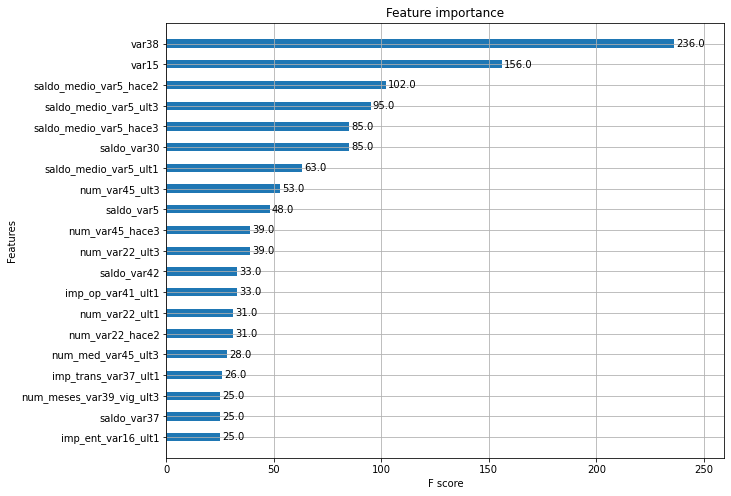

In [26]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(1,1,figsize=(10,8))
plot_importance(xgb_clf, ax=ax , max_num_features=20,height=0.4)

### LightGBM 모델 학습

In [28]:
from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier(n_estimators=500)

eval_set = [(X_tr, y_tr),(X_val, y_val)]
lgbm_clf.fit(X_tr,y_tr,early_stopping_rounds=100,eval_metric='auc',eval_set=eval_set)

lgbm_roc_score=roc_auc_score(y_test, lgbm_clf.predict_proba(X_test)[:,1])
print('ROC AUC: {0:.4f}'.format(lgbm_roc_score))

[1]	training's auc: 0.82625	training's binary_logloss: 0.15523	valid_1's auc: 0.809814	valid_1's binary_logloss: 0.15774
Training until validation scores don't improve for 100 rounds
[2]	training's auc: 0.833899	training's binary_logloss: 0.149581	valid_1's auc: 0.81222	valid_1's binary_logloss: 0.153275
[3]	training's auc: 0.841789	training's binary_logloss: 0.145416	valid_1's auc: 0.814833	valid_1's binary_logloss: 0.149999
[4]	training's auc: 0.847243	training's binary_logloss: 0.14212	valid_1's auc: 0.819406	valid_1's binary_logloss: 0.147524
[5]	training's auc: 0.849589	training's binary_logloss: 0.139438	valid_1's auc: 0.821869	valid_1's binary_logloss: 0.145464
[6]	training's auc: 0.853413	training's binary_logloss: 0.137254	valid_1's auc: 0.820878	valid_1's binary_logloss: 0.143973
[7]	training's auc: 0.85551	training's binary_logloss: 0.1354	valid_1's auc: 0.821815	valid_1's binary_logloss: 0.142746
[8]	training's auc: 0.858698	training's binary_logloss: 0.133561	valid_1's auc

[75]	training's auc: 0.928639	training's binary_logloss: 0.104167	valid_1's auc: 0.83094	valid_1's binary_logloss: 0.135819
[76]	training's auc: 0.928812	training's binary_logloss: 0.104032	valid_1's auc: 0.831078	valid_1's binary_logloss: 0.135819
[77]	training's auc: 0.929094	training's binary_logloss: 0.103841	valid_1's auc: 0.831173	valid_1's binary_logloss: 0.135831
[78]	training's auc: 0.929304	training's binary_logloss: 0.103661	valid_1's auc: 0.831108	valid_1's binary_logloss: 0.135854
[79]	training's auc: 0.929558	training's binary_logloss: 0.103444	valid_1's auc: 0.830932	valid_1's binary_logloss: 0.135942
[80]	training's auc: 0.930062	training's binary_logloss: 0.103185	valid_1's auc: 0.831212	valid_1's binary_logloss: 0.135846
[81]	training's auc: 0.93021	training's binary_logloss: 0.103035	valid_1's auc: 0.831221	valid_1's binary_logloss: 0.13587
[82]	training's auc: 0.930873	training's binary_logloss: 0.102757	valid_1's auc: 0.831112	valid_1's binary_logloss: 0.135917
[83

 ## 하이퍼 파라미터 튜닝

In [29]:
lgbm_search_space = {'num_leaves': hp.quniform('num_leaves', 32, 64, 1),
                     'max_depth': hp.quniform('max_depth', 100, 160, 1),
                     'min_child_samples': hp.quniform('min_child_samples', 60, 100, 1),
                     'subsample': hp.uniform('subsample', 0.7, 1),
                     'learning_rate': hp.uniform('learning_rate', 0.01, 0.2)
                    }

In [30]:
def objective_func(search_space):
    lgbm_clf =  LGBMClassifier(n_estimators=100, num_leaves=int(search_space['num_leaves']),
                               max_depth=int(search_space['max_depth']),
                               min_child_samples=int(search_space['min_child_samples']), 
                               subsample=search_space['subsample'],
                               learning_rate=search_space['learning_rate'])
    # 3개 k-fold 방식으로 평가된 roc_auc 지표를 담는 list
    roc_auc_list = []
    
    # 3개 k-fold방식 적용 
    kf = KFold(n_splits=3)
    # X_train을 다시 학습과 검증용 데이터로 분리
    for tr_index, val_index in kf.split(X_train):
        # kf.split(X_train)으로 추출된 학습과 검증 index값으로 학습과 검증 데이터 세트 분리 
        X_tr, y_tr = X_train.iloc[tr_index], y_train.iloc[tr_index]
        X_val, y_val = X_train.iloc[val_index], y_train.iloc[val_index]

        # early stopping은 30회로 설정하고 추출된 학습과 검증 데이터로 XGBClassifier 학습 수행. 
        lgbm_clf.fit(X_tr, y_tr, early_stopping_rounds=30, eval_metric="auc",
           eval_set=[(X_tr, y_tr), (X_val, y_val)])

        # 1로 예측한 확률값 추출후 roc auc 계산하고 평균 roc auc 계산을 위해 list에 결과값 담음.
        score = roc_auc_score(y_val, lgbm_clf.predict_proba(X_val)[:, 1]) 
        roc_auc_list.append(score)
    
    # 3개 k-fold로 계산된 roc_auc값의 평균값을 반환하되, 
    # HyperOpt는 목적함수의 최소값을 위한 입력값을 찾으므로 -1을 곱한 뒤 반환.
    return -1*np.mean(roc_auc_list)

In [31]:
from hyperopt import fmin, tpe, Trials

trials = Trials()

# fmin()함수를 호출. max_evals지정된 횟수만큼 반복 후 목적함수의 최소값을 가지는 최적 입력값 추출. 
best = fmin(fn=objective_func, space=lgbm_search_space, algo=tpe.suggest,
            max_evals=50, # 최대 반복 횟수를 지정합니다.
            trials=trials, rstate=np.random.default_rng(seed=30))

print('best:', best)

[1]	training's auc: 0.82736	training's binary_logloss: 0.162294	valid_1's auc: 0.804818	valid_1's binary_logloss: 0.163544
Training until validation scores don't improve for 30 rounds                    
[2]	training's auc: 0.828309	training's binary_logloss: 0.160269	valid_1's auc: 0.804585	valid_1's binary_logloss: 0.161866
[3]	training's auc: 0.833368	training's binary_logloss: 0.158478	valid_1's auc: 0.806871	valid_1's binary_logloss: 0.16038
[4]	training's auc: 0.834671	training's binary_logloss: 0.156852	valid_1's auc: 0.80706	valid_1's binary_logloss: 0.159053
[5]	training's auc: 0.837783	training's binary_logloss: 0.155354	valid_1's auc: 0.811645	valid_1's binary_logloss: 0.157793
[6]	training's auc: 0.839052	training's binary_logloss: 0.153966	valid_1's auc: 0.81271	valid_1's binary_logloss: 0.156635
[7]	training's auc: 0.841216	training's binary_logloss: 0.152691	valid_1's auc: 0.815103	valid_1's binary_logloss: 0.155585
[8]	training's auc: 0.841859	training's binary_logloss:

[66]	training's auc: 0.876244	training's binary_logloss: 0.126639	valid_1's auc: 0.829919	valid_1's binary_logloss: 0.137223
[67]	training's auc: 0.876733	training's binary_logloss: 0.126457	valid_1's auc: 0.829943	valid_1's binary_logloss: 0.137148
[68]	training's auc: 0.877004	training's binary_logloss: 0.126282	valid_1's auc: 0.829954	valid_1's binary_logloss: 0.137083
[69]	training's auc: 0.87756	training's binary_logloss: 0.1261	valid_1's auc: 0.830128	valid_1's binary_logloss: 0.137018
[70]	training's auc: 0.87797	training's binary_logloss: 0.12593	valid_1's auc: 0.830009	valid_1's binary_logloss: 0.136959
[71]	training's auc: 0.878271	training's binary_logloss: 0.125757	valid_1's auc: 0.83006	valid_1's binary_logloss: 0.136874
[72]	training's auc: 0.878636	training's binary_logloss: 0.125587	valid_1's auc: 0.830076	valid_1's binary_logloss: 0.136826
[73]	training's auc: 0.879184	training's binary_logloss: 0.125399	valid_1's auc: 0.830085	valid_1's binary_logloss: 0.136789
[74]	t

[29]	training's auc: 0.858888	training's binary_logloss: 0.139137	valid_1's auc: 0.835662	valid_1's binary_logloss: 0.13837
[30]	training's auc: 0.859921	training's binary_logloss: 0.138699	valid_1's auc: 0.83536	valid_1's binary_logloss: 0.138101
[31]	training's auc: 0.860346	training's binary_logloss: 0.138259	valid_1's auc: 0.835652	valid_1's binary_logloss: 0.137767
[32]	training's auc: 0.860623	training's binary_logloss: 0.137851	valid_1's auc: 0.835706	valid_1's binary_logloss: 0.137481
[33]	training's auc: 0.861233	training's binary_logloss: 0.137451	valid_1's auc: 0.835552	valid_1's binary_logloss: 0.137215
[34]	training's auc: 0.861685	training's binary_logloss: 0.137067	valid_1's auc: 0.835533	valid_1's binary_logloss: 0.136967
[35]	training's auc: 0.862184	training's binary_logloss: 0.136698	valid_1's auc: 0.835406	valid_1's binary_logloss: 0.136728
[36]	training's auc: 0.862667	training's binary_logloss: 0.136338	valid_1's auc: 0.835312	valid_1's binary_logloss: 0.136482
[3

[30]	training's auc: 0.856921	training's binary_logloss: 0.135833	valid_1's auc: 0.831037	valid_1's binary_logloss: 0.144164
[31]	training's auc: 0.857352	training's binary_logloss: 0.135401	valid_1's auc: 0.831342	valid_1's binary_logloss: 0.143854
[32]	training's auc: 0.857588	training's binary_logloss: 0.134987	valid_1's auc: 0.831532	valid_1's binary_logloss: 0.143556
[33]	training's auc: 0.857821	training's binary_logloss: 0.134603	valid_1's auc: 0.831764	valid_1's binary_logloss: 0.143283
[34]	training's auc: 0.858306	training's binary_logloss: 0.13423	valid_1's auc: 0.831793	valid_1's binary_logloss: 0.143018
[35]	training's auc: 0.858929	training's binary_logloss: 0.133883	valid_1's auc: 0.831932	valid_1's binary_logloss: 0.142746
[36]	training's auc: 0.859609	training's binary_logloss: 0.133542	valid_1's auc: 0.832139	valid_1's binary_logloss: 0.142495
[37]	training's auc: 0.860114	training's binary_logloss: 0.133199	valid_1's auc: 0.832296	valid_1's binary_logloss: 0.142265
[

[96]	training's auc: 0.884749	training's binary_logloss: 0.121826	valid_1's auc: 0.837378	valid_1's binary_logloss: 0.136511
[97]	training's auc: 0.885099	training's binary_logloss: 0.121706	valid_1's auc: 0.83749	valid_1's binary_logloss: 0.136478
[98]	training's auc: 0.885445	training's binary_logloss: 0.121577	valid_1's auc: 0.837538	valid_1's binary_logloss: 0.136446
[99]	training's auc: 0.885685	training's binary_logloss: 0.121466	valid_1's auc: 0.837478	valid_1's binary_logloss: 0.136439
[100]	training's auc: 0.886052	training's binary_logloss: 0.121345	valid_1's auc: 0.837486	valid_1's binary_logloss: 0.136434
Did not meet early stopping. Best iteration is:                                 
[100]	training's auc: 0.886052	training's binary_logloss: 0.121345	valid_1's auc: 0.837486	valid_1's binary_logloss: 0.136434
[1]	training's auc: 0.840138	training's binary_logloss: 0.15221	valid_1's auc: 0.812785	valid_1's binary_logloss: 0.155558
Training until validation scores don't improv

[19]	training's auc: 0.897993	training's binary_logloss: 0.118991	valid_1's auc: 0.832518	valid_1's binary_logloss: 0.131701
[20]	training's auc: 0.900167	training's binary_logloss: 0.118172	valid_1's auc: 0.833565	valid_1's binary_logloss: 0.13152
[21]	training's auc: 0.902969	training's binary_logloss: 0.117293	valid_1's auc: 0.834523	valid_1's binary_logloss: 0.131402
[22]	training's auc: 0.90531	training's binary_logloss: 0.116475	valid_1's auc: 0.834618	valid_1's binary_logloss: 0.131358
[23]	training's auc: 0.907056	training's binary_logloss: 0.115757	valid_1's auc: 0.834942	valid_1's binary_logloss: 0.131246
[24]	training's auc: 0.909088	training's binary_logloss: 0.115144	valid_1's auc: 0.8348	valid_1's binary_logloss: 0.131217
[25]	training's auc: 0.91079	training's binary_logloss: 0.114412	valid_1's auc: 0.834459	valid_1's binary_logloss: 0.131233
[26]	training's auc: 0.912142	training's binary_logloss: 0.113763	valid_1's auc: 0.834075	valid_1's binary_logloss: 0.131343
[27]	

[43]	training's auc: 0.933172	training's binary_logloss: 0.101676	valid_1's auc: 0.826256	valid_1's binary_logloss: 0.139262
[44]	training's auc: 0.933569	training's binary_logloss: 0.101296	valid_1's auc: 0.825773	valid_1's binary_logloss: 0.139428
[45]	training's auc: 0.934175	training's binary_logloss: 0.100855	valid_1's auc: 0.825556	valid_1's binary_logloss: 0.139525
[46]	training's auc: 0.934949	training's binary_logloss: 0.100477	valid_1's auc: 0.826272	valid_1's binary_logloss: 0.139441
[47]	training's auc: 0.936035	training's binary_logloss: 0.099964	valid_1's auc: 0.826319	valid_1's binary_logloss: 0.139438
Early stopping, best iteration is:                                              
[17]	training's auc: 0.897685	training's binary_logloss: 0.117316	valid_1's auc: 0.832056	valid_1's binary_logloss: 0.137878
[1]	training's auc: 0.839116	training's binary_logloss: 0.158407	valid_1's auc: 0.808457	valid_1's binary_logloss: 0.160442
Training until validation scores don't improv

[6]	training's auc: 0.857472	training's binary_logloss: 0.145319	valid_1's auc: 0.833905	valid_1's binary_logloss: 0.143543
[7]	training's auc: 0.860339	training's binary_logloss: 0.143397	valid_1's auc: 0.834078	valid_1's binary_logloss: 0.142131
[8]	training's auc: 0.861304	training's binary_logloss: 0.141745	valid_1's auc: 0.834468	valid_1's binary_logloss: 0.140892
[9]	training's auc: 0.862956	training's binary_logloss: 0.140132	valid_1's auc: 0.834869	valid_1's binary_logloss: 0.139771
[10]	training's auc: 0.864847	training's binary_logloss: 0.138724	valid_1's auc: 0.835446	valid_1's binary_logloss: 0.13885
[11]	training's auc: 0.86623	training's binary_logloss: 0.137473	valid_1's auc: 0.835713	valid_1's binary_logloss: 0.138002
[12]	training's auc: 0.867981	training's binary_logloss: 0.136307	valid_1's auc: 0.835994	valid_1's binary_logloss: 0.13717
[13]	training's auc: 0.869792	training's binary_logloss: 0.135215	valid_1's auc: 0.835849	valid_1's binary_logloss: 0.136529
[14]	tr

[72]	training's auc: 0.920641	training's binary_logloss: 0.110576	valid_1's auc: 0.835869	valid_1's binary_logloss: 0.130871
[73]	training's auc: 0.921038	training's binary_logloss: 0.110351	valid_1's auc: 0.835913	valid_1's binary_logloss: 0.130874
[74]	training's auc: 0.921692	training's binary_logloss: 0.110051	valid_1's auc: 0.835825	valid_1's binary_logloss: 0.130914
[75]	training's auc: 0.92206	training's binary_logloss: 0.109837	valid_1's auc: 0.835923	valid_1's binary_logloss: 0.13091
[76]	training's auc: 0.922658	training's binary_logloss: 0.109639	valid_1's auc: 0.835933	valid_1's binary_logloss: 0.130919
[77]	training's auc: 0.923055	training's binary_logloss: 0.109417	valid_1's auc: 0.835784	valid_1's binary_logloss: 0.13095
Early stopping, best iteration is:                                              
[47]	training's auc: 0.903653	training's binary_logloss: 0.11734	valid_1's auc: 0.837037	valid_1's binary_logloss: 0.130606
[1]	training's auc: 0.834503	training's binary_l

[58]	training's auc: 0.913849	training's binary_logloss: 0.111582	valid_1's auc: 0.834285	valid_1's binary_logloss: 0.136843
[59]	training's auc: 0.914384	training's binary_logloss: 0.111309	valid_1's auc: 0.834247	valid_1's binary_logloss: 0.136871
[60]	training's auc: 0.914903	training's binary_logloss: 0.111077	valid_1's auc: 0.833798	valid_1's binary_logloss: 0.13696
[61]	training's auc: 0.915517	training's binary_logloss: 0.110801	valid_1's auc: 0.833659	valid_1's binary_logloss: 0.136979
[62]	training's auc: 0.916195	training's binary_logloss: 0.110516	valid_1's auc: 0.833471	valid_1's binary_logloss: 0.137027
[63]	training's auc: 0.91689	training's binary_logloss: 0.110232	valid_1's auc: 0.833442	valid_1's binary_logloss: 0.137015
[64]	training's auc: 0.917469	training's binary_logloss: 0.109937	valid_1's auc: 0.833273	valid_1's binary_logloss: 0.137088
[65]	training's auc: 0.918136	training's binary_logloss: 0.109677	valid_1's auc: 0.833317	valid_1's binary_logloss: 0.137111
[6

[7]	training's auc: 0.872434	training's binary_logloss: 0.135255	valid_1's auc: 0.833923	valid_1's binary_logloss: 0.137628
[8]	training's auc: 0.875089	training's binary_logloss: 0.133378	valid_1's auc: 0.833948	valid_1's binary_logloss: 0.136537
[9]	training's auc: 0.876666	training's binary_logloss: 0.131736	valid_1's auc: 0.833881	valid_1's binary_logloss: 0.135624
[10]	training's auc: 0.878562	training's binary_logloss: 0.130295	valid_1's auc: 0.833605	valid_1's binary_logloss: 0.134901
[11]	training's auc: 0.88046	training's binary_logloss: 0.128929	valid_1's auc: 0.833745	valid_1's binary_logloss: 0.134262
[12]	training's auc: 0.882314	training's binary_logloss: 0.127699	valid_1's auc: 0.834269	valid_1's binary_logloss: 0.133745
[13]	training's auc: 0.884388	training's binary_logloss: 0.126532	valid_1's auc: 0.834366	valid_1's binary_logloss: 0.133288
[14]	training's auc: 0.886595	training's binary_logloss: 0.125433	valid_1's auc: 0.834777	valid_1's binary_logloss: 0.132883
[15]

[2]	training's auc: 0.848498	training's binary_logloss: 0.147776	valid_1's auc: 0.821284	valid_1's binary_logloss: 0.155561
[3]	training's auc: 0.857619	training's binary_logloss: 0.143331	valid_1's auc: 0.82337	valid_1's binary_logloss: 0.151964
[4]	training's auc: 0.861851	training's binary_logloss: 0.139678	valid_1's auc: 0.82534	valid_1's binary_logloss: 0.149262
[5]	training's auc: 0.865752	training's binary_logloss: 0.136765	valid_1's auc: 0.827254	valid_1's binary_logloss: 0.147084
[6]	training's auc: 0.868268	training's binary_logloss: 0.134361	valid_1's auc: 0.827763	valid_1's binary_logloss: 0.145391
[7]	training's auc: 0.870669	training's binary_logloss: 0.132206	valid_1's auc: 0.827993	valid_1's binary_logloss: 0.144066
[8]	training's auc: 0.87337	training's binary_logloss: 0.130415	valid_1's auc: 0.828218	valid_1's binary_logloss: 0.143004
[9]	training's auc: 0.875151	training's binary_logloss: 0.128795	valid_1's auc: 0.829181	valid_1's binary_logloss: 0.142038
[10]	traini

[22]	training's auc: 0.88238	training's binary_logloss: 0.126723	valid_1's auc: 0.830295	valid_1's binary_logloss: 0.138243
[23]	training's auc: 0.883776	training's binary_logloss: 0.126165	valid_1's auc: 0.830692	valid_1's binary_logloss: 0.137971
[24]	training's auc: 0.88482	training's binary_logloss: 0.125529	valid_1's auc: 0.830506	valid_1's binary_logloss: 0.137746
[25]	training's auc: 0.885832	training's binary_logloss: 0.124934	valid_1's auc: 0.830799	valid_1's binary_logloss: 0.137556
[26]	training's auc: 0.887091	training's binary_logloss: 0.124379	valid_1's auc: 0.830879	valid_1's binary_logloss: 0.13733
[27]	training's auc: 0.888004	training's binary_logloss: 0.123857	valid_1's auc: 0.830649	valid_1's binary_logloss: 0.137147
[28]	training's auc: 0.889028	training's binary_logloss: 0.123347	valid_1's auc: 0.830946	valid_1's binary_logloss: 0.136992
[29]	training's auc: 0.889966	training's binary_logloss: 0.12285	valid_1's auc: 0.830753	valid_1's binary_logloss: 0.136863
[30]

[9]	training's auc: 0.864091	training's binary_logloss: 0.141155	valid_1's auc: 0.833572	valid_1's binary_logloss: 0.140697
[10]	training's auc: 0.865652	training's binary_logloss: 0.139724	valid_1's auc: 0.834132	valid_1's binary_logloss: 0.139644
[11]	training's auc: 0.867069	training's binary_logloss: 0.138407	valid_1's auc: 0.834624	valid_1's binary_logloss: 0.138815
[12]	training's auc: 0.868332	training's binary_logloss: 0.1372	valid_1's auc: 0.83419	valid_1's binary_logloss: 0.138044
[13]	training's auc: 0.870189	training's binary_logloss: 0.13606	valid_1's auc: 0.833746	valid_1's binary_logloss: 0.137411
[14]	training's auc: 0.871525	training's binary_logloss: 0.135012	valid_1's auc: 0.834002	valid_1's binary_logloss: 0.136798
[15]	training's auc: 0.872978	training's binary_logloss: 0.134049	valid_1's auc: 0.834288	valid_1's binary_logloss: 0.136215
[16]	training's auc: 0.873929	training's binary_logloss: 0.133184	valid_1's auc: 0.834257	valid_1's binary_logloss: 0.135675
[17]	

[75]	training's auc: 0.922581	training's binary_logloss: 0.110024	valid_1's auc: 0.834208	valid_1's binary_logloss: 0.130921
[76]	training's auc: 0.923075	training's binary_logloss: 0.109776	valid_1's auc: 0.834431	valid_1's binary_logloss: 0.130884
Early stopping, best iteration is:                                              
[46]	training's auc: 0.902133	training's binary_logloss: 0.118038	valid_1's auc: 0.835118	valid_1's binary_logloss: 0.130885
[1]	training's auc: 0.838009	training's binary_logloss: 0.15785	valid_1's auc: 0.816064	valid_1's binary_logloss: 0.163853
Training until validation scores don't improve for 30 rounds                    
[2]	training's auc: 0.842866	training's binary_logloss: 0.153851	valid_1's auc: 0.821346	valid_1's binary_logloss: 0.160188
[3]	training's auc: 0.849387	training's binary_logloss: 0.150557	valid_1's auc: 0.824199	valid_1's binary_logloss: 0.157216
[4]	training's auc: 0.852024	training's binary_logloss: 0.147809	valid_1's auc: 0.82622	vali

[4]	training's auc: 0.835195	training's binary_logloss: 0.159725	valid_1's auc: 0.809769	valid_1's binary_logloss: 0.161432
[5]	training's auc: 0.83658	training's binary_logloss: 0.158699	valid_1's auc: 0.81153	valid_1's binary_logloss: 0.160564
[6]	training's auc: 0.838752	training's binary_logloss: 0.157727	valid_1's auc: 0.812415	valid_1's binary_logloss: 0.159769
[7]	training's auc: 0.840544	training's binary_logloss: 0.156809	valid_1's auc: 0.813045	valid_1's binary_logloss: 0.159006
[8]	training's auc: 0.841508	training's binary_logloss: 0.155933	valid_1's auc: 0.813588	valid_1's binary_logloss: 0.15826
[9]	training's auc: 0.842593	training's binary_logloss: 0.155093	valid_1's auc: 0.814195	valid_1's binary_logloss: 0.157554
[10]	training's auc: 0.843342	training's binary_logloss: 0.154292	valid_1's auc: 0.813792	valid_1's binary_logloss: 0.156894
[11]	training's auc: 0.843313	training's binary_logloss: 0.153521	valid_1's auc: 0.813823	valid_1's binary_logloss: 0.156295
[12]	trai

[70]	training's auc: 0.867847	training's binary_logloss: 0.132243	valid_1's auc: 0.828498	valid_1's binary_logloss: 0.140277
[71]	training's auc: 0.868181	training's binary_logloss: 0.132064	valid_1's auc: 0.828488	valid_1's binary_logloss: 0.140172
[72]	training's auc: 0.868743	training's binary_logloss: 0.131875	valid_1's auc: 0.828686	valid_1's binary_logloss: 0.140061
[73]	training's auc: 0.869174	training's binary_logloss: 0.131693	valid_1's auc: 0.82894	valid_1's binary_logloss: 0.139952
[74]	training's auc: 0.869477	training's binary_logloss: 0.131521	valid_1's auc: 0.828985	valid_1's binary_logloss: 0.139841
[75]	training's auc: 0.869716	training's binary_logloss: 0.131343	valid_1's auc: 0.829064	valid_1's binary_logloss: 0.139743
[76]	training's auc: 0.869956	training's binary_logloss: 0.131177	valid_1's auc: 0.829219	valid_1's binary_logloss: 0.139638
[77]	training's auc: 0.870148	training's binary_logloss: 0.13101	valid_1's auc: 0.829206	valid_1's binary_logloss: 0.139546
[7

[33]	training's auc: 0.854962	training's binary_logloss: 0.144328	valid_1's auc: 0.831939	valid_1's binary_logloss: 0.14239
[34]	training's auc: 0.855744	training's binary_logloss: 0.14394	valid_1's auc: 0.832138	valid_1's binary_logloss: 0.1421
[35]	training's auc: 0.855992	training's binary_logloss: 0.143563	valid_1's auc: 0.832164	valid_1's binary_logloss: 0.141833
[36]	training's auc: 0.856445	training's binary_logloss: 0.143191	valid_1's auc: 0.832302	valid_1's binary_logloss: 0.141572
[37]	training's auc: 0.856706	training's binary_logloss: 0.142826	valid_1's auc: 0.832306	valid_1's binary_logloss: 0.141317
[38]	training's auc: 0.856987	training's binary_logloss: 0.142472	valid_1's auc: 0.832409	valid_1's binary_logloss: 0.141056
[39]	training's auc: 0.857241	training's binary_logloss: 0.142133	valid_1's auc: 0.832698	valid_1's binary_logloss: 0.140802
[40]	training's auc: 0.857483	training's binary_logloss: 0.141793	valid_1's auc: 0.832718	valid_1's binary_logloss: 0.140543
[41]

[8]	training's auc: 0.838132	training's binary_logloss: 0.154878	valid_1's auc: 0.81704	valid_1's binary_logloss: 0.160902
[9]	training's auc: 0.838243	training's binary_logloss: 0.154074	valid_1's auc: 0.817406	valid_1's binary_logloss: 0.160172
[10]	training's auc: 0.838737	training's binary_logloss: 0.153301	valid_1's auc: 0.817767	valid_1's binary_logloss: 0.159432
[11]	training's auc: 0.838953	training's binary_logloss: 0.152567	valid_1's auc: 0.818212	valid_1's binary_logloss: 0.158746
[12]	training's auc: 0.841943	training's binary_logloss: 0.151856	valid_1's auc: 0.821481	valid_1's binary_logloss: 0.158082
[13]	training's auc: 0.844335	training's binary_logloss: 0.151175	valid_1's auc: 0.824672	valid_1's binary_logloss: 0.157447
[14]	training's auc: 0.845206	training's binary_logloss: 0.150529	valid_1's auc: 0.825131	valid_1's binary_logloss: 0.156859
[15]	training's auc: 0.845727	training's binary_logloss: 0.149892	valid_1's auc: 0.825481	valid_1's binary_logloss: 0.156275
[16

[74]	training's auc: 0.867089	training's binary_logloss: 0.130904	valid_1's auc: 0.834739	valid_1's binary_logloss: 0.14119
[75]	training's auc: 0.867387	training's binary_logloss: 0.130733	valid_1's auc: 0.834843	valid_1's binary_logloss: 0.141078
[76]	training's auc: 0.867663	training's binary_logloss: 0.130568	valid_1's auc: 0.834935	valid_1's binary_logloss: 0.140965
[77]	training's auc: 0.867917	training's binary_logloss: 0.130405	valid_1's auc: 0.834862	valid_1's binary_logloss: 0.140858
[78]	training's auc: 0.868166	training's binary_logloss: 0.130244	valid_1's auc: 0.83492	valid_1's binary_logloss: 0.140755
[79]	training's auc: 0.868473	training's binary_logloss: 0.130087	valid_1's auc: 0.834988	valid_1's binary_logloss: 0.140647
[80]	training's auc: 0.868646	training's binary_logloss: 0.129934	valid_1's auc: 0.835143	valid_1's binary_logloss: 0.140541
[81]	training's auc: 0.86894	training's binary_logloss: 0.129776	valid_1's auc: 0.835069	valid_1's binary_logloss: 0.140452
[82

[37]	training's auc: 0.916864	training's binary_logloss: 0.109828	valid_1's auc: 0.824295	valid_1's binary_logloss: 0.137777
[38]	training's auc: 0.917754	training's binary_logloss: 0.109447	valid_1's auc: 0.824252	valid_1's binary_logloss: 0.137807
[39]	training's auc: 0.918738	training's binary_logloss: 0.108994	valid_1's auc: 0.823361	valid_1's binary_logloss: 0.138031
[40]	training's auc: 0.919472	training's binary_logloss: 0.108593	valid_1's auc: 0.823461	valid_1's binary_logloss: 0.138094
[41]	training's auc: 0.920575	training's binary_logloss: 0.108199	valid_1's auc: 0.823033	valid_1's binary_logloss: 0.138206
[42]	training's auc: 0.920989	training's binary_logloss: 0.10791	valid_1's auc: 0.822508	valid_1's binary_logloss: 0.138373
[43]	training's auc: 0.921722	training's binary_logloss: 0.107558	valid_1's auc: 0.822235	valid_1's binary_logloss: 0.138422
[44]	training's auc: 0.922355	training's binary_logloss: 0.107139	valid_1's auc: 0.821937	valid_1's binary_logloss: 0.138572
E

Training until validation scores don't improve for 30 rounds                    
[2]	training's auc: 0.839999	training's binary_logloss: 0.144773	valid_1's auc: 0.81813	valid_1's binary_logloss: 0.151807
[3]	training's auc: 0.849834	training's binary_logloss: 0.140265	valid_1's auc: 0.826173	valid_1's binary_logloss: 0.148056
[4]	training's auc: 0.853229	training's binary_logloss: 0.136959	valid_1's auc: 0.827736	valid_1's binary_logloss: 0.145438
[5]	training's auc: 0.858015	training's binary_logloss: 0.134357	valid_1's auc: 0.828647	valid_1's binary_logloss: 0.143565
[6]	training's auc: 0.861489	training's binary_logloss: 0.132111	valid_1's auc: 0.829608	valid_1's binary_logloss: 0.142111
[7]	training's auc: 0.864164	training's binary_logloss: 0.130256	valid_1's auc: 0.830298	valid_1's binary_logloss: 0.141005
[8]	training's auc: 0.867383	training's binary_logloss: 0.128639	valid_1's auc: 0.830377	valid_1's binary_logloss: 0.140085
[9]	training's auc: 0.871355	training's binary_loglo

[21]	training's auc: 0.917065	training's binary_logloss: 0.110247	valid_1's auc: 0.826553	valid_1's binary_logloss: 0.136903
[22]	training's auc: 0.919846	training's binary_logloss: 0.109404	valid_1's auc: 0.827202	valid_1's binary_logloss: 0.136773
[23]	training's auc: 0.921092	training's binary_logloss: 0.108644	valid_1's auc: 0.826512	valid_1's binary_logloss: 0.136893
[24]	training's auc: 0.922464	training's binary_logloss: 0.107874	valid_1's auc: 0.826486	valid_1's binary_logloss: 0.13697
[25]	training's auc: 0.923928	training's binary_logloss: 0.107095	valid_1's auc: 0.825799	valid_1's binary_logloss: 0.137192
[26]	training's auc: 0.924977	training's binary_logloss: 0.106395	valid_1's auc: 0.825612	valid_1's binary_logloss: 0.137341
[27]	training's auc: 0.926897	training's binary_logloss: 0.105585	valid_1's auc: 0.82531	valid_1's binary_logloss: 0.137547
[28]	training's auc: 0.928986	training's binary_logloss: 0.10492	valid_1's auc: 0.825042	valid_1's binary_logloss: 0.137682
[29

[8]	training's auc: 0.879634	training's binary_logloss: 0.124469	valid_1's auc: 0.82917	valid_1's binary_logloss: 0.139821
[9]	training's auc: 0.885213	training's binary_logloss: 0.122814	valid_1's auc: 0.831606	valid_1's binary_logloss: 0.139245
[10]	training's auc: 0.888474	training's binary_logloss: 0.121393	valid_1's auc: 0.831905	valid_1's binary_logloss: 0.13881
[11]	training's auc: 0.892631	training's binary_logloss: 0.119808	valid_1's auc: 0.830839	valid_1's binary_logloss: 0.138632
[12]	training's auc: 0.89636	training's binary_logloss: 0.11844	valid_1's auc: 0.830213	valid_1's binary_logloss: 0.138487
[13]	training's auc: 0.899184	training's binary_logloss: 0.117177	valid_1's auc: 0.83078	valid_1's binary_logloss: 0.13829
[14]	training's auc: 0.9012	training's binary_logloss: 0.116061	valid_1's auc: 0.830049	valid_1's binary_logloss: 0.138147
[15]	training's auc: 0.903316	training's binary_logloss: 0.115034	valid_1's auc: 0.830521	valid_1's binary_logloss: 0.138054
[16]	train

[31]	training's auc: 0.906008	training's binary_logloss: 0.114097	valid_1's auc: 0.826641	valid_1's binary_logloss: 0.13662
[32]	training's auc: 0.907268	training's binary_logloss: 0.113642	valid_1's auc: 0.826709	valid_1's binary_logloss: 0.136689
[33]	training's auc: 0.908689	training's binary_logloss: 0.113109	valid_1's auc: 0.826764	valid_1's binary_logloss: 0.136693
[34]	training's auc: 0.909375	training's binary_logloss: 0.112734	valid_1's auc: 0.826165	valid_1's binary_logloss: 0.136828
[35]	training's auc: 0.910191	training's binary_logloss: 0.112353	valid_1's auc: 0.82612	valid_1's binary_logloss: 0.136922
[36]	training's auc: 0.911047	training's binary_logloss: 0.112016	valid_1's auc: 0.825729	valid_1's binary_logloss: 0.137028
[37]	training's auc: 0.912307	training's binary_logloss: 0.111554	valid_1's auc: 0.825494	valid_1's binary_logloss: 0.137132
[38]	training's auc: 0.913453	training's binary_logloss: 0.111214	valid_1's auc: 0.825892	valid_1's binary_logloss: 0.137105
[3

[48]	training's auc: 0.919047	training's binary_logloss: 0.110139	valid_1's auc: 0.831156	valid_1's binary_logloss: 0.132011
[49]	training's auc: 0.919789	training's binary_logloss: 0.109779	valid_1's auc: 0.831212	valid_1's binary_logloss: 0.132003
[50]	training's auc: 0.920348	training's binary_logloss: 0.109451	valid_1's auc: 0.830851	valid_1's binary_logloss: 0.132081
[51]	training's auc: 0.920884	training's binary_logloss: 0.109125	valid_1's auc: 0.830677	valid_1's binary_logloss: 0.132121
[52]	training's auc: 0.921404	training's binary_logloss: 0.108847	valid_1's auc: 0.830604	valid_1's binary_logloss: 0.132146
[53]	training's auc: 0.922258	training's binary_logloss: 0.108444	valid_1's auc: 0.830768	valid_1's binary_logloss: 0.132094
[54]	training's auc: 0.922811	training's binary_logloss: 0.108136	valid_1's auc: 0.830383	valid_1's binary_logloss: 0.13219
[55]	training's auc: 0.923652	training's binary_logloss: 0.107688	valid_1's auc: 0.830315	valid_1's binary_logloss: 0.132215
[

[7]	training's auc: 0.86017	training's binary_logloss: 0.139823	valid_1's auc: 0.822239	valid_1's binary_logloss: 0.146152
[8]	training's auc: 0.863392	training's binary_logloss: 0.138089	valid_1's auc: 0.824008	valid_1's binary_logloss: 0.144894
[9]	training's auc: 0.864887	training's binary_logloss: 0.136563	valid_1's auc: 0.825397	valid_1's binary_logloss: 0.14377
[10]	training's auc: 0.867247	training's binary_logloss: 0.135194	valid_1's auc: 0.826174	valid_1's binary_logloss: 0.142833
[11]	training's auc: 0.868858	training's binary_logloss: 0.133923	valid_1's auc: 0.826769	valid_1's binary_logloss: 0.142046
[12]	training's auc: 0.870396	training's binary_logloss: 0.132803	valid_1's auc: 0.826729	valid_1's binary_logloss: 0.14135
[13]	training's auc: 0.871572	training's binary_logloss: 0.131724	valid_1's auc: 0.82804	valid_1's binary_logloss: 0.140682
[14]	training's auc: 0.873851	training's binary_logloss: 0.130769	valid_1's auc: 0.828314	valid_1's binary_logloss: 0.140141
[15]	tr

[15]	training's auc: 0.875851	training's binary_logloss: 0.13162	valid_1's auc: 0.8354	valid_1's binary_logloss: 0.134764
[16]	training's auc: 0.877035	training's binary_logloss: 0.130767	valid_1's auc: 0.835307	valid_1's binary_logloss: 0.134321
[17]	training's auc: 0.878502	training's binary_logloss: 0.129926	valid_1's auc: 0.835095	valid_1's binary_logloss: 0.133956
[18]	training's auc: 0.879305	training's binary_logloss: 0.129173	valid_1's auc: 0.835024	valid_1's binary_logloss: 0.133602
[19]	training's auc: 0.8806	training's binary_logloss: 0.128429	valid_1's auc: 0.835291	valid_1's binary_logloss: 0.133309
[20]	training's auc: 0.881731	training's binary_logloss: 0.127727	valid_1's auc: 0.835191	valid_1's binary_logloss: 0.133033
[21]	training's auc: 0.882924	training's binary_logloss: 0.127079	valid_1's auc: 0.835519	valid_1's binary_logloss: 0.132723
[22]	training's auc: 0.883667	training's binary_logloss: 0.126471	valid_1's auc: 0.835972	valid_1's binary_logloss: 0.132465
[23]	

[19]	training's auc: 0.87994	training's binary_logloss: 0.125886	valid_1's auc: 0.834485	valid_1's binary_logloss: 0.139234
[20]	training's auc: 0.88202	training's binary_logloss: 0.125232	valid_1's auc: 0.835215	valid_1's binary_logloss: 0.138883
[21]	training's auc: 0.883156	training's binary_logloss: 0.124589	valid_1's auc: 0.835481	valid_1's binary_logloss: 0.138603
[22]	training's auc: 0.884302	training's binary_logloss: 0.123977	valid_1's auc: 0.835796	valid_1's binary_logloss: 0.138336
[23]	training's auc: 0.885111	training's binary_logloss: 0.12337	valid_1's auc: 0.836175	valid_1's binary_logloss: 0.138062
[24]	training's auc: 0.886658	training's binary_logloss: 0.122784	valid_1's auc: 0.836321	valid_1's binary_logloss: 0.137867
[25]	training's auc: 0.888382	training's binary_logloss: 0.122169	valid_1's auc: 0.836123	valid_1's binary_logloss: 0.137699
[26]	training's auc: 0.889879	training's binary_logloss: 0.121591	valid_1's auc: 0.836472	valid_1's binary_logloss: 0.137448
[27

[23]	training's auc: 0.931657	training's binary_logloss: 0.103126	valid_1's auc: 0.823108	valid_1's binary_logloss: 0.138499
[24]	training's auc: 0.933037	training's binary_logloss: 0.102359	valid_1's auc: 0.822849	valid_1's binary_logloss: 0.138703
[25]	training's auc: 0.934278	training's binary_logloss: 0.101612	valid_1's auc: 0.822143	valid_1's binary_logloss: 0.139006
[26]	training's auc: 0.935224	training's binary_logloss: 0.100926	valid_1's auc: 0.82196	valid_1's binary_logloss: 0.139186
[27]	training's auc: 0.936884	training's binary_logloss: 0.100265	valid_1's auc: 0.821696	valid_1's binary_logloss: 0.139367
[28]	training's auc: 0.937661	training's binary_logloss: 0.099597	valid_1's auc: 0.821104	valid_1's binary_logloss: 0.139566
[29]	training's auc: 0.938259	training's binary_logloss: 0.0990356	valid_1's auc: 0.819684	valid_1's binary_logloss: 0.13994
[30]	training's auc: 0.939401	training's binary_logloss: 0.0984907	valid_1's auc: 0.819168	valid_1's binary_logloss: 0.140259


[4]	training's auc: 0.869125	training's binary_logloss: 0.129798	valid_1's auc: 0.824435	valid_1's binary_logloss: 0.143537
[5]	training's auc: 0.873604	training's binary_logloss: 0.126831	valid_1's auc: 0.823621	valid_1's binary_logloss: 0.142239
[6]	training's auc: 0.879521	training's binary_logloss: 0.124324	valid_1's auc: 0.825508	valid_1's binary_logloss: 0.1411
[7]	training's auc: 0.885507	training's binary_logloss: 0.122052	valid_1's auc: 0.828451	valid_1's binary_logloss: 0.140296
[8]	training's auc: 0.891505	training's binary_logloss: 0.119988	valid_1's auc: 0.829185	valid_1's binary_logloss: 0.139789
[9]	training's auc: 0.896672	training's binary_logloss: 0.118111	valid_1's auc: 0.829868	valid_1's binary_logloss: 0.139304
[10]	training's auc: 0.900951	training's binary_logloss: 0.116292	valid_1's auc: 0.830367	valid_1's binary_logloss: 0.139063
[11]	training's auc: 0.90427	training's binary_logloss: 0.114915	valid_1's auc: 0.829192	valid_1's binary_logloss: 0.139091
[12]	trai

[27]	training's auc: 0.894086	training's binary_logloss: 0.122001	valid_1's auc: 0.831195	valid_1's binary_logloss: 0.136887
[28]	training's auc: 0.895331	training's binary_logloss: 0.121427	valid_1's auc: 0.83114	valid_1's binary_logloss: 0.136737
[29]	training's auc: 0.896178	training's binary_logloss: 0.120917	valid_1's auc: 0.830786	valid_1's binary_logloss: 0.136664
[30]	training's auc: 0.897063	training's binary_logloss: 0.120411	valid_1's auc: 0.830517	valid_1's binary_logloss: 0.136585
[31]	training's auc: 0.898239	training's binary_logloss: 0.119894	valid_1's auc: 0.830005	valid_1's binary_logloss: 0.136552
[32]	training's auc: 0.899232	training's binary_logloss: 0.119402	valid_1's auc: 0.829601	valid_1's binary_logloss: 0.136515
[33]	training's auc: 0.90016	training's binary_logloss: 0.118914	valid_1's auc: 0.829292	valid_1's binary_logloss: 0.136478
[34]	training's auc: 0.901036	training's binary_logloss: 0.118464	valid_1's auc: 0.828982	valid_1's binary_logloss: 0.13647
[35

[36]	training's auc: 0.8999	training's binary_logloss: 0.119567	valid_1's auc: 0.834128	valid_1's binary_logloss: 0.131432
[37]	training's auc: 0.901007	training's binary_logloss: 0.119129	valid_1's auc: 0.833959	valid_1's binary_logloss: 0.131395
[38]	training's auc: 0.902074	training's binary_logloss: 0.1187	valid_1's auc: 0.833874	valid_1's binary_logloss: 0.131352
[39]	training's auc: 0.902858	training's binary_logloss: 0.118317	valid_1's auc: 0.833936	valid_1's binary_logloss: 0.131304
[40]	training's auc: 0.903887	training's binary_logloss: 0.117904	valid_1's auc: 0.834015	valid_1's binary_logloss: 0.131249
[41]	training's auc: 0.904686	training's binary_logloss: 0.117502	valid_1's auc: 0.83386	valid_1's binary_logloss: 0.13124
[42]	training's auc: 0.905828	training's binary_logloss: 0.117103	valid_1's auc: 0.833866	valid_1's binary_logloss: 0.13119
[43]	training's auc: 0.906984	training's binary_logloss: 0.116695	valid_1's auc: 0.833956	valid_1's binary_logloss: 0.131152
Early s

[56]	training's auc: 0.918599	training's binary_logloss: 0.109496	valid_1's auc: 0.832825	valid_1's binary_logloss: 0.137326
[57]	training's auc: 0.919398	training's binary_logloss: 0.109209	valid_1's auc: 0.832683	valid_1's binary_logloss: 0.137346
[58]	training's auc: 0.920128	training's binary_logloss: 0.108894	valid_1's auc: 0.832702	valid_1's binary_logloss: 0.137357
[59]	training's auc: 0.921035	training's binary_logloss: 0.108627	valid_1's auc: 0.832744	valid_1's binary_logloss: 0.137353
[60]	training's auc: 0.921561	training's binary_logloss: 0.108343	valid_1's auc: 0.832903	valid_1's binary_logloss: 0.137356
[61]	training's auc: 0.922328	training's binary_logloss: 0.108066	valid_1's auc: 0.833134	valid_1's binary_logloss: 0.137311
[62]	training's auc: 0.923043	training's binary_logloss: 0.107768	valid_1's auc: 0.833212	valid_1's binary_logloss: 0.137308
[63]	training's auc: 0.92369	training's binary_logloss: 0.107516	valid_1's auc: 0.833463	valid_1's binary_logloss: 0.137275
E

[11]	training's auc: 0.885223	training's binary_logloss: 0.123092	valid_1's auc: 0.833404	valid_1's binary_logloss: 0.132146
[12]	training's auc: 0.88705	training's binary_logloss: 0.122061	valid_1's auc: 0.833766	valid_1's binary_logloss: 0.131969
[13]	training's auc: 0.890193	training's binary_logloss: 0.121076	valid_1's auc: 0.833735	valid_1's binary_logloss: 0.131773
[14]	training's auc: 0.892768	training's binary_logloss: 0.120034	valid_1's auc: 0.83406	valid_1's binary_logloss: 0.131714
[15]	training's auc: 0.895239	training's binary_logloss: 0.119038	valid_1's auc: 0.833864	valid_1's binary_logloss: 0.13164
[16]	training's auc: 0.898151	training's binary_logloss: 0.118158	valid_1's auc: 0.83471	valid_1's binary_logloss: 0.131582
[17]	training's auc: 0.900526	training's binary_logloss: 0.117375	valid_1's auc: 0.834665	valid_1's binary_logloss: 0.131557
[18]	training's auc: 0.902132	training's binary_logloss: 0.116605	valid_1's auc: 0.834877	valid_1's binary_logloss: 0.131432
[19]

[25]	training's auc: 0.917701	training's binary_logloss: 0.10867	valid_1's auc: 0.831594	valid_1's binary_logloss: 0.138028
[26]	training's auc: 0.91948	training's binary_logloss: 0.107979	valid_1's auc: 0.83117	valid_1's binary_logloss: 0.13819
[27]	training's auc: 0.92015	training's binary_logloss: 0.107464	valid_1's auc: 0.830787	valid_1's binary_logloss: 0.138307
[28]	training's auc: 0.921104	training's binary_logloss: 0.106947	valid_1's auc: 0.830337	valid_1's binary_logloss: 0.138443
[29]	training's auc: 0.922313	training's binary_logloss: 0.106313	valid_1's auc: 0.829377	valid_1's binary_logloss: 0.138686
[30]	training's auc: 0.923577	training's binary_logloss: 0.105641	valid_1's auc: 0.828933	valid_1's binary_logloss: 0.138793
[31]	training's auc: 0.924796	training's binary_logloss: 0.105017	valid_1's auc: 0.82865	valid_1's binary_logloss: 0.138904
[32]	training's auc: 0.925347	training's binary_logloss: 0.10459	valid_1's auc: 0.828038	valid_1's binary_logloss: 0.139074
[33]	tr

[46]	training's auc: 0.897568	training's binary_logloss: 0.1189	valid_1's auc: 0.829815	valid_1's binary_logloss: 0.136245
[47]	training's auc: 0.898143	training's binary_logloss: 0.118604	valid_1's auc: 0.830122	valid_1's binary_logloss: 0.136137
[48]	training's auc: 0.89856	training's binary_logloss: 0.118336	valid_1's auc: 0.830078	valid_1's binary_logloss: 0.136113
[49]	training's auc: 0.899304	training's binary_logloss: 0.118002	valid_1's auc: 0.829833	valid_1's binary_logloss: 0.136141
[50]	training's auc: 0.899791	training's binary_logloss: 0.117706	valid_1's auc: 0.82989	valid_1's binary_logloss: 0.136107
[51]	training's auc: 0.900308	training's binary_logloss: 0.117424	valid_1's auc: 0.829688	valid_1's binary_logloss: 0.136075
[52]	training's auc: 0.900818	training's binary_logloss: 0.117149	valid_1's auc: 0.82981	valid_1's binary_logloss: 0.136046
[53]	training's auc: 0.901626	training's binary_logloss: 0.116826	valid_1's auc: 0.829734	valid_1's binary_logloss: 0.136066
[54]	

[1]	training's auc: 0.832013	training's binary_logloss: 0.158746	valid_1's auc: 0.807047	valid_1's binary_logloss: 0.164738
Training until validation scores don't improve for 30 rounds                    
[2]	training's auc: 0.839478	training's binary_logloss: 0.155212	valid_1's auc: 0.814671	valid_1's binary_logloss: 0.161574
[3]	training's auc: 0.843493	training's binary_logloss: 0.15231	valid_1's auc: 0.821546	valid_1's binary_logloss: 0.15889
[4]	training's auc: 0.847877	training's binary_logloss: 0.149752	valid_1's auc: 0.82469	valid_1's binary_logloss: 0.156669
[5]	training's auc: 0.850318	training's binary_logloss: 0.147567	valid_1's auc: 0.82543	valid_1's binary_logloss: 0.154801
[6]	training's auc: 0.852449	training's binary_logloss: 0.145583	valid_1's auc: 0.826208	valid_1's binary_logloss: 0.153101
[7]	training's auc: 0.855694	training's binary_logloss: 0.143785	valid_1's auc: 0.828369	valid_1's binary_logloss: 0.151616
[8]	training's auc: 0.856457	training's binary_logloss:

[66]	training's auc: 0.909575	training's binary_logloss: 0.112877	valid_1's auc: 0.835704	valid_1's binary_logloss: 0.136429
[67]	training's auc: 0.910273	training's binary_logloss: 0.112634	valid_1's auc: 0.83574	valid_1's binary_logloss: 0.136416
[68]	training's auc: 0.910686	training's binary_logloss: 0.112435	valid_1's auc: 0.835664	valid_1's binary_logloss: 0.136426
[69]	training's auc: 0.91135	training's binary_logloss: 0.112215	valid_1's auc: 0.8355	valid_1's binary_logloss: 0.136446
[70]	training's auc: 0.911812	training's binary_logloss: 0.111998	valid_1's auc: 0.835738	valid_1's binary_logloss: 0.136389
[71]	training's auc: 0.91259	training's binary_logloss: 0.11176	valid_1's auc: 0.835812	valid_1's binary_logloss: 0.13639
[72]	training's auc: 0.913358	training's binary_logloss: 0.111539	valid_1's auc: 0.836118	valid_1's binary_logloss: 0.136356
[73]	training's auc: 0.913789	training's binary_logloss: 0.111344	valid_1's auc: 0.835918	valid_1's binary_logloss: 0.13639
[74]	tra

Training until validation scores don't improve for 30 rounds                    
[2]	training's auc: 0.83681	training's binary_logloss: 0.150422	valid_1's auc: 0.822984	valid_1's binary_logloss: 0.147075
[3]	training's auc: 0.845348	training's binary_logloss: 0.146031	valid_1's auc: 0.828091	valid_1's binary_logloss: 0.143671
[4]	training's auc: 0.849796	training's binary_logloss: 0.1428	valid_1's auc: 0.827681	valid_1's binary_logloss: 0.141309
[5]	training's auc: 0.85354	training's binary_logloss: 0.140107	valid_1's auc: 0.831145	valid_1's binary_logloss: 0.139337
[6]	training's auc: 0.856277	training's binary_logloss: 0.137855	valid_1's auc: 0.833832	valid_1's binary_logloss: 0.13778
[7]	training's auc: 0.859846	training's binary_logloss: 0.135973	valid_1's auc: 0.833963	valid_1's binary_logloss: 0.136551
[8]	training's auc: 0.863692	training's binary_logloss: 0.134322	valid_1's auc: 0.833681	valid_1's binary_logloss: 0.135493
[9]	training's auc: 0.865743	training's binary_logloss: 

[14]	training's auc: 0.875717	training's binary_logloss: 0.124988	valid_1's auc: 0.833355	valid_1's binary_logloss: 0.138171
[15]	training's auc: 0.876711	training's binary_logloss: 0.124242	valid_1's auc: 0.832806	valid_1's binary_logloss: 0.137954
[16]	training's auc: 0.879202	training's binary_logloss: 0.123476	valid_1's auc: 0.833144	valid_1's binary_logloss: 0.137712
[17]	training's auc: 0.880862	training's binary_logloss: 0.122781	valid_1's auc: 0.834309	valid_1's binary_logloss: 0.137458
[18]	training's auc: 0.882672	training's binary_logloss: 0.122022	valid_1's auc: 0.833909	valid_1's binary_logloss: 0.13735
[19]	training's auc: 0.884244	training's binary_logloss: 0.121377	valid_1's auc: 0.833688	valid_1's binary_logloss: 0.137305
[20]	training's auc: 0.885797	training's binary_logloss: 0.12074	valid_1's auc: 0.833767	valid_1's binary_logloss: 0.137272
[21]	training's auc: 0.887201	training's binary_logloss: 0.120138	valid_1's auc: 0.83376	valid_1's binary_logloss: 0.137202
[22

[30]	training's auc: 0.896228	training's binary_logloss: 0.121295	valid_1's auc: 0.830959	valid_1's binary_logloss: 0.136893
[31]	training's auc: 0.897253	training's binary_logloss: 0.120753	valid_1's auc: 0.830853	valid_1's binary_logloss: 0.136761
[32]	training's auc: 0.89813	training's binary_logloss: 0.120266	valid_1's auc: 0.830453	valid_1's binary_logloss: 0.13668
[33]	training's auc: 0.898902	training's binary_logloss: 0.119784	valid_1's auc: 0.830248	valid_1's binary_logloss: 0.136585
[34]	training's auc: 0.899544	training's binary_logloss: 0.119345	valid_1's auc: 0.830113	valid_1's binary_logloss: 0.136502
[35]	training's auc: 0.900749	training's binary_logloss: 0.118902	valid_1's auc: 0.830651	valid_1's binary_logloss: 0.13639
[36]	training's auc: 0.901855	training's binary_logloss: 0.118454	valid_1's auc: 0.830478	valid_1's binary_logloss: 0.136327
[37]	training's auc: 0.902713	training's binary_logloss: 0.118058	valid_1's auc: 0.830269	valid_1's binary_logloss: 0.136285
[38

[36]	training's auc: 0.899815	training's binary_logloss: 0.120324	valid_1's auc: 0.83338	valid_1's binary_logloss: 0.132046
[37]	training's auc: 0.900967	training's binary_logloss: 0.119883	valid_1's auc: 0.833761	valid_1's binary_logloss: 0.131923
[38]	training's auc: 0.901977	training's binary_logloss: 0.119418	valid_1's auc: 0.833794	valid_1's binary_logloss: 0.131855
[39]	training's auc: 0.902827	training's binary_logloss: 0.118997	valid_1's auc: 0.833863	valid_1's binary_logloss: 0.131786
[40]	training's auc: 0.903723	training's binary_logloss: 0.118585	valid_1's auc: 0.833677	valid_1's binary_logloss: 0.131756
[41]	training's auc: 0.904542	training's binary_logloss: 0.11816	valid_1's auc: 0.83372	valid_1's binary_logloss: 0.131695
[42]	training's auc: 0.905257	training's binary_logloss: 0.117764	valid_1's auc: 0.833594	valid_1's binary_logloss: 0.131672
[43]	training's auc: 0.906186	training's binary_logloss: 0.117379	valid_1's auc: 0.833431	valid_1's binary_logloss: 0.131641
[44

[30]	training's auc: 0.895095	training's binary_logloss: 0.120672	valid_1's auc: 0.834399	valid_1's binary_logloss: 0.138345
[31]	training's auc: 0.896333	training's binary_logloss: 0.120112	valid_1's auc: 0.834411	valid_1's binary_logloss: 0.138183
[32]	training's auc: 0.897291	training's binary_logloss: 0.119617	valid_1's auc: 0.834254	valid_1's binary_logloss: 0.138076
[33]	training's auc: 0.898406	training's binary_logloss: 0.119122	valid_1's auc: 0.834054	valid_1's binary_logloss: 0.137976
[34]	training's auc: 0.89948	training's binary_logloss: 0.118632	valid_1's auc: 0.834223	valid_1's binary_logloss: 0.137871
[35]	training's auc: 0.900569	training's binary_logloss: 0.118177	valid_1's auc: 0.834066	valid_1's binary_logloss: 0.137763
[36]	training's auc: 0.901461	training's binary_logloss: 0.117748	valid_1's auc: 0.833988	valid_1's binary_logloss: 0.137695
[37]	training's auc: 0.902372	training's binary_logloss: 0.117286	valid_1's auc: 0.834034	valid_1's binary_logloss: 0.137587
[

[34]	training's auc: 0.866259	training's binary_logloss: 0.133957	valid_1's auc: 0.828955	valid_1's binary_logloss: 0.141425
[35]	training's auc: 0.866275	training's binary_logloss: 0.133576	valid_1's auc: 0.828309	valid_1's binary_logloss: 0.141206
[36]	training's auc: 0.866509	training's binary_logloss: 0.133213	valid_1's auc: 0.828311	valid_1's binary_logloss: 0.140964
[37]	training's auc: 0.867451	training's binary_logloss: 0.132848	valid_1's auc: 0.828637	valid_1's binary_logloss: 0.140719
[38]	training's auc: 0.867946	training's binary_logloss: 0.132507	valid_1's auc: 0.828292	valid_1's binary_logloss: 0.140533
[39]	training's auc: 0.868586	training's binary_logloss: 0.132171	valid_1's auc: 0.828525	valid_1's binary_logloss: 0.140325
[40]	training's auc: 0.869129	training's binary_logloss: 0.131845	valid_1's auc: 0.828696	valid_1's binary_logloss: 0.140129
[41]	training's auc: 0.869788	training's binary_logloss: 0.131532	valid_1's auc: 0.828529	valid_1's binary_logloss: 0.139965


[100]	training's auc: 0.892651	training's binary_logloss: 0.120091	valid_1's auc: 0.831335	valid_1's binary_logloss: 0.135824
Did not meet early stopping. Best iteration is:                                 
[100]	training's auc: 0.892651	training's binary_logloss: 0.120091	valid_1's auc: 0.831335	valid_1's binary_logloss: 0.135824
[1]	training's auc: 0.828332	training's binary_logloss: 0.16466	valid_1's auc: 0.81505	valid_1's binary_logloss: 0.158833
Training until validation scores don't improve for 30 rounds                    
[2]	training's auc: 0.831427	training's binary_logloss: 0.162605	valid_1's auc: 0.818514	valid_1's binary_logloss: 0.157139
[3]	training's auc: 0.837341	training's binary_logloss: 0.160743	valid_1's auc: 0.821587	valid_1's binary_logloss: 0.155553
[4]	training's auc: 0.838106	training's binary_logloss: 0.159087	valid_1's auc: 0.821137	valid_1's binary_logloss: 0.154157
[5]	training's auc: 0.840904	training's binary_logloss: 0.157507	valid_1's auc: 0.824349	val

[3]	training's auc: 0.835428	training's binary_logloss: 0.157187	valid_1's auc: 0.813725	valid_1's binary_logloss: 0.16304
[4]	training's auc: 0.836389	training's binary_logloss: 0.155585	valid_1's auc: 0.81517	valid_1's binary_logloss: 0.161558
[5]	training's auc: 0.838076	training's binary_logloss: 0.154083	valid_1's auc: 0.81699	valid_1's binary_logloss: 0.16016
[6]	training's auc: 0.838467	training's binary_logloss: 0.152703	valid_1's auc: 0.818098	valid_1's binary_logloss: 0.158919
[7]	training's auc: 0.841724	training's binary_logloss: 0.151434	valid_1's auc: 0.820876	valid_1's binary_logloss: 0.15774
[8]	training's auc: 0.844529	training's binary_logloss: 0.150259	valid_1's auc: 0.824315	valid_1's binary_logloss: 0.156607
[9]	training's auc: 0.845804	training's binary_logloss: 0.14915	valid_1's auc: 0.825215	valid_1's binary_logloss: 0.155591
[10]	training's auc: 0.846709	training's binary_logloss: 0.148112	valid_1's auc: 0.825351	valid_1's binary_logloss: 0.154655
[11]	training

[69]	training's auc: 0.8809	training's binary_logloss: 0.124362	valid_1's auc: 0.83641	valid_1's binary_logloss: 0.137835
[70]	training's auc: 0.881192	training's binary_logloss: 0.124173	valid_1's auc: 0.836457	valid_1's binary_logloss: 0.137756
[71]	training's auc: 0.881463	training's binary_logloss: 0.124007	valid_1's auc: 0.836466	valid_1's binary_logloss: 0.137677
[72]	training's auc: 0.881803	training's binary_logloss: 0.123824	valid_1's auc: 0.836531	valid_1's binary_logloss: 0.137601
[73]	training's auc: 0.882297	training's binary_logloss: 0.123636	valid_1's auc: 0.836458	valid_1's binary_logloss: 0.13752
[74]	training's auc: 0.882749	training's binary_logloss: 0.123467	valid_1's auc: 0.836402	valid_1's binary_logloss: 0.137482
[75]	training's auc: 0.883187	training's binary_logloss: 0.123292	valid_1's auc: 0.836441	valid_1's binary_logloss: 0.137421
[76]	training's auc: 0.883444	training's binary_logloss: 0.123126	valid_1's auc: 0.836425	valid_1's binary_logloss: 0.137372
[77]

[35]	training's auc: 0.918889	training's binary_logloss: 0.11016	valid_1's auc: 0.826767	valid_1's binary_logloss: 0.136729
[36]	training's auc: 0.920366	training's binary_logloss: 0.109728	valid_1's auc: 0.826614	valid_1's binary_logloss: 0.136772
[37]	training's auc: 0.921671	training's binary_logloss: 0.109212	valid_1's auc: 0.826205	valid_1's binary_logloss: 0.136891
[38]	training's auc: 0.922857	training's binary_logloss: 0.108761	valid_1's auc: 0.825893	valid_1's binary_logloss: 0.136925
[39]	training's auc: 0.923795	training's binary_logloss: 0.108343	valid_1's auc: 0.825393	valid_1's binary_logloss: 0.137076
[40]	training's auc: 0.92536	training's binary_logloss: 0.107917	valid_1's auc: 0.825556	valid_1's binary_logloss: 0.137069
[41]	training's auc: 0.926399	training's binary_logloss: 0.107478	valid_1's auc: 0.825207	valid_1's binary_logloss: 0.137204
[42]	training's auc: 0.927405	training's binary_logloss: 0.106947	valid_1's auc: 0.825523	valid_1's binary_logloss: 0.137216
[4

[52]	training's auc: 0.934284	training's binary_logloss: 0.104416	valid_1's auc: 0.831097	valid_1's binary_logloss: 0.131976
[53]	training's auc: 0.934808	training's binary_logloss: 0.104098	valid_1's auc: 0.831155	valid_1's binary_logloss: 0.132013
[54]	training's auc: 0.935314	training's binary_logloss: 0.103765	valid_1's auc: 0.831037	valid_1's binary_logloss: 0.132072
[55]	training's auc: 0.93593	training's binary_logloss: 0.103375	valid_1's auc: 0.831028	valid_1's binary_logloss: 0.132083
[56]	training's auc: 0.936616	training's binary_logloss: 0.102991	valid_1's auc: 0.83053	valid_1's binary_logloss: 0.132255
[57]	training's auc: 0.937087	training's binary_logloss: 0.10263	valid_1's auc: 0.830484	valid_1's binary_logloss: 0.132259
Early stopping, best iteration is:                                              
[27]	training's auc: 0.907788	training's binary_logloss: 0.116045	valid_1's auc: 0.833893	valid_1's binary_logloss: 0.131288
[1]	training's auc: 0.839635	training's binary_

[9]	training's auc: 0.882264	training's binary_logloss: 0.124204	valid_1's auc: 0.829698	valid_1's binary_logloss: 0.137138
[10]	training's auc: 0.885851	training's binary_logloss: 0.12279	valid_1's auc: 0.8293	valid_1's binary_logloss: 0.136953
[11]	training's auc: 0.888458	training's binary_logloss: 0.12155	valid_1's auc: 0.829196	valid_1's binary_logloss: 0.136842
[12]	training's auc: 0.890809	training's binary_logloss: 0.120382	valid_1's auc: 0.830185	valid_1's binary_logloss: 0.1365
[13]	training's auc: 0.893033	training's binary_logloss: 0.119304	valid_1's auc: 0.829925	valid_1's binary_logloss: 0.136429
[14]	training's auc: 0.895743	training's binary_logloss: 0.118357	valid_1's auc: 0.8299	valid_1's binary_logloss: 0.136343
[15]	training's auc: 0.898684	training's binary_logloss: 0.117301	valid_1's auc: 0.829213	valid_1's binary_logloss: 0.136474
[16]	training's auc: 0.900875	training's binary_logloss: 0.116402	valid_1's auc: 0.828965	valid_1's binary_logloss: 0.136493
[17]	trai

[31]	training's auc: 0.924731	training's binary_logloss: 0.107128	valid_1's auc: 0.828346	valid_1's binary_logloss: 0.132706
[32]	training's auc: 0.926051	training's binary_logloss: 0.106479	valid_1's auc: 0.828109	valid_1's binary_logloss: 0.132814
[33]	training's auc: 0.926608	training's binary_logloss: 0.106038	valid_1's auc: 0.827909	valid_1's binary_logloss: 0.132884
[34]	training's auc: 0.927452	training's binary_logloss: 0.105557	valid_1's auc: 0.828448	valid_1's binary_logloss: 0.132841
[35]	training's auc: 0.928691	training's binary_logloss: 0.105021	valid_1's auc: 0.828273	valid_1's binary_logloss: 0.132932
[36]	training's auc: 0.929259	training's binary_logloss: 0.10457	valid_1's auc: 0.828212	valid_1's binary_logloss: 0.132954
Early stopping, best iteration is:                                              
[6]	training's auc: 0.869003	training's binary_logloss: 0.131621	valid_1's auc: 0.833731	valid_1's binary_logloss: 0.134972
[1]	training's auc: 0.831682	training's binary

[8]	training's auc: 0.846724	training's binary_logloss: 0.150982	valid_1's auc: 0.816151	valid_1's binary_logloss: 0.154312
[9]	training's auc: 0.849025	training's binary_logloss: 0.14984	valid_1's auc: 0.817714	valid_1's binary_logloss: 0.15339
[10]	training's auc: 0.849819	training's binary_logloss: 0.148774	valid_1's auc: 0.818119	valid_1's binary_logloss: 0.152534
[11]	training's auc: 0.850605	training's binary_logloss: 0.147764	valid_1's auc: 0.818099	valid_1's binary_logloss: 0.151703
[12]	training's auc: 0.852698	training's binary_logloss: 0.146805	valid_1's auc: 0.819832	valid_1's binary_logloss: 0.150932
[13]	training's auc: 0.854212	training's binary_logloss: 0.145913	valid_1's auc: 0.821448	valid_1's binary_logloss: 0.150228
[14]	training's auc: 0.854688	training's binary_logloss: 0.145031	valid_1's auc: 0.822076	valid_1's binary_logloss: 0.149553
[15]	training's auc: 0.854982	training's binary_logloss: 0.144227	valid_1's auc: 0.822344	valid_1's binary_logloss: 0.14895
[16]	

[74]	training's auc: 0.885277	training's binary_logloss: 0.123636	valid_1's auc: 0.831691	valid_1's binary_logloss: 0.136475
[75]	training's auc: 0.885782	training's binary_logloss: 0.123464	valid_1's auc: 0.831784	valid_1's binary_logloss: 0.136426
[76]	training's auc: 0.88613	training's binary_logloss: 0.123297	valid_1's auc: 0.831775	valid_1's binary_logloss: 0.13638
[77]	training's auc: 0.886519	training's binary_logloss: 0.123125	valid_1's auc: 0.831937	valid_1's binary_logloss: 0.136308
[78]	training's auc: 0.886914	training's binary_logloss: 0.122947	valid_1's auc: 0.831892	valid_1's binary_logloss: 0.13627
[79]	training's auc: 0.887247	training's binary_logloss: 0.122777	valid_1's auc: 0.832059	valid_1's binary_logloss: 0.136207
[80]	training's auc: 0.887542	training's binary_logloss: 0.12262	valid_1's auc: 0.83212	valid_1's binary_logloss: 0.136147
[81]	training's auc: 0.887896	training's binary_logloss: 0.122449	valid_1's auc: 0.832121	valid_1's binary_logloss: 0.136102
[82]	

[37]	training's auc: 0.867689	training's binary_logloss: 0.134793	valid_1's auc: 0.835322	valid_1's binary_logloss: 0.135985
[38]	training's auc: 0.868003	training's binary_logloss: 0.134443	valid_1's auc: 0.835276	valid_1's binary_logloss: 0.135754
[39]	training's auc: 0.868655	training's binary_logloss: 0.134108	valid_1's auc: 0.835513	valid_1's binary_logloss: 0.135538
[40]	training's auc: 0.869099	training's binary_logloss: 0.133787	valid_1's auc: 0.835402	valid_1's binary_logloss: 0.13533
[41]	training's auc: 0.869356	training's binary_logloss: 0.133474	valid_1's auc: 0.83529	valid_1's binary_logloss: 0.135147
[42]	training's auc: 0.869729	training's binary_logloss: 0.133157	valid_1's auc: 0.835491	valid_1's binary_logloss: 0.134953
[43]	training's auc: 0.870164	training's binary_logloss: 0.132856	valid_1's auc: 0.835538	valid_1's binary_logloss: 0.134771
[44]	training's auc: 0.870646	training's binary_logloss: 0.132558	valid_1's auc: 0.835373	valid_1's binary_logloss: 0.134621
[4

[17]	training's auc: 0.853811	training's binary_logloss: 0.142002	valid_1's auc: 0.828471	valid_1's binary_logloss: 0.149499
[18]	training's auc: 0.854346	training's binary_logloss: 0.141285	valid_1's auc: 0.828502	valid_1's binary_logloss: 0.148938
[19]	training's auc: 0.854674	training's binary_logloss: 0.140612	valid_1's auc: 0.828475	valid_1's binary_logloss: 0.148394
[20]	training's auc: 0.856267	training's binary_logloss: 0.13998	valid_1's auc: 0.829423	valid_1's binary_logloss: 0.147881
[21]	training's auc: 0.856935	training's binary_logloss: 0.139377	valid_1's auc: 0.829623	valid_1's binary_logloss: 0.147393
[22]	training's auc: 0.857301	training's binary_logloss: 0.138797	valid_1's auc: 0.829527	valid_1's binary_logloss: 0.146955
[23]	training's auc: 0.858072	training's binary_logloss: 0.138236	valid_1's auc: 0.829633	valid_1's binary_logloss: 0.146505
[24]	training's auc: 0.858648	training's binary_logloss: 0.137704	valid_1's auc: 0.829582	valid_1's binary_logloss: 0.146094
[

[83]	training's auc: 0.887767	training's binary_logloss: 0.121608	valid_1's auc: 0.837031	valid_1's binary_logloss: 0.136906
[84]	training's auc: 0.888147	training's binary_logloss: 0.12144	valid_1's auc: 0.83702	valid_1's binary_logloss: 0.136874
[85]	training's auc: 0.888518	training's binary_logloss: 0.121272	valid_1's auc: 0.836967	valid_1's binary_logloss: 0.136855
[86]	training's auc: 0.888941	training's binary_logloss: 0.121104	valid_1's auc: 0.837142	valid_1's binary_logloss: 0.136806
[87]	training's auc: 0.889287	training's binary_logloss: 0.120959	valid_1's auc: 0.83718	valid_1's binary_logloss: 0.136766
[88]	training's auc: 0.88962	training's binary_logloss: 0.120802	valid_1's auc: 0.83726	valid_1's binary_logloss: 0.136732
[89]	training's auc: 0.890026	training's binary_logloss: 0.120652	valid_1's auc: 0.837368	valid_1's binary_logloss: 0.136696
[90]	training's auc: 0.890378	training's binary_logloss: 0.120512	valid_1's auc: 0.837306	valid_1's binary_logloss: 0.136662
[91]	

[46]	training's auc: 0.881229	training's binary_logloss: 0.126085	valid_1's auc: 0.829758	valid_1's binary_logloss: 0.137617
[47]	training's auc: 0.881967	training's binary_logloss: 0.125803	valid_1's auc: 0.829727	valid_1's binary_logloss: 0.137536
[48]	training's auc: 0.882558	training's binary_logloss: 0.12553	valid_1's auc: 0.829416	valid_1's binary_logloss: 0.137459
[49]	training's auc: 0.882893	training's binary_logloss: 0.125266	valid_1's auc: 0.829209	valid_1's binary_logloss: 0.137372
[50]	training's auc: 0.883381	training's binary_logloss: 0.125015	valid_1's auc: 0.829497	valid_1's binary_logloss: 0.13725
[51]	training's auc: 0.88393	training's binary_logloss: 0.124746	valid_1's auc: 0.829476	valid_1's binary_logloss: 0.137164
[52]	training's auc: 0.884474	training's binary_logloss: 0.124486	valid_1's auc: 0.829437	valid_1's binary_logloss: 0.137091
[53]	training's auc: 0.885109	training's binary_logloss: 0.124239	valid_1's auc: 0.829287	valid_1's binary_logloss: 0.137036
[54

[9]	training's auc: 0.852205	training's binary_logloss: 0.149172	valid_1's auc: 0.829972	valid_1's binary_logloss: 0.146272
[10]	training's auc: 0.854162	training's binary_logloss: 0.148002	valid_1's auc: 0.830447	valid_1's binary_logloss: 0.145349
[11]	training's auc: 0.854646	training's binary_logloss: 0.146911	valid_1's auc: 0.830737	valid_1's binary_logloss: 0.144492
[12]	training's auc: 0.85531	training's binary_logloss: 0.145879	valid_1's auc: 0.830577	valid_1's binary_logloss: 0.143728
[13]	training's auc: 0.855878	training's binary_logloss: 0.144915	valid_1's auc: 0.830864	valid_1's binary_logloss: 0.143013
[14]	training's auc: 0.857443	training's binary_logloss: 0.144004	valid_1's auc: 0.831848	valid_1's binary_logloss: 0.142332
[15]	training's auc: 0.858113	training's binary_logloss: 0.143094	valid_1's auc: 0.832728	valid_1's binary_logloss: 0.141648
[16]	training's auc: 0.858976	training's binary_logloss: 0.142249	valid_1's auc: 0.833218	valid_1's binary_logloss: 0.141024
[1

[75]	training's auc: 0.891827	training's binary_logloss: 0.121768	valid_1's auc: 0.835338	valid_1's binary_logloss: 0.131023
[76]	training's auc: 0.892371	training's binary_logloss: 0.121575	valid_1's auc: 0.83545	valid_1's binary_logloss: 0.130986
[77]	training's auc: 0.892701	training's binary_logloss: 0.121417	valid_1's auc: 0.835384	valid_1's binary_logloss: 0.130957
[78]	training's auc: 0.893004	training's binary_logloss: 0.121249	valid_1's auc: 0.835475	valid_1's binary_logloss: 0.130929
[79]	training's auc: 0.893552	training's binary_logloss: 0.121071	valid_1's auc: 0.835526	valid_1's binary_logloss: 0.130903
[80]	training's auc: 0.894044	training's binary_logloss: 0.120901	valid_1's auc: 0.835509	valid_1's binary_logloss: 0.130872
[81]	training's auc: 0.894422	training's binary_logloss: 0.120732	valid_1's auc: 0.835587	valid_1's binary_logloss: 0.130865
[82]	training's auc: 0.895021	training's binary_logloss: 0.120549	valid_1's auc: 0.83561	valid_1's binary_logloss: 0.130865
[8

[38]	training's auc: 0.873612	training's binary_logloss: 0.128	valid_1's auc: 0.834601	valid_1's binary_logloss: 0.139702
[39]	training's auc: 0.874268	training's binary_logloss: 0.127674	valid_1's auc: 0.834599	valid_1's binary_logloss: 0.139529
[40]	training's auc: 0.874785	training's binary_logloss: 0.12735	valid_1's auc: 0.834636	valid_1's binary_logloss: 0.139366
[41]	training's auc: 0.875916	training's binary_logloss: 0.127033	valid_1's auc: 0.835139	valid_1's binary_logloss: 0.139196
[42]	training's auc: 0.876442	training's binary_logloss: 0.126733	valid_1's auc: 0.835058	valid_1's binary_logloss: 0.139051
[43]	training's auc: 0.877089	training's binary_logloss: 0.126434	valid_1's auc: 0.83527	valid_1's binary_logloss: 0.138878
[44]	training's auc: 0.877732	training's binary_logloss: 0.126153	valid_1's auc: 0.835682	valid_1's binary_logloss: 0.138733
[45]	training's auc: 0.878207	training's binary_logloss: 0.125876	valid_1's auc: 0.835507	valid_1's binary_logloss: 0.138599
[46]	

[20]	training's auc: 0.883484	training's binary_logloss: 0.123909	valid_1's auc: 0.828791	valid_1's binary_logloss: 0.137281
[21]	training's auc: 0.8854	training's binary_logloss: 0.123214	valid_1's auc: 0.828637	valid_1's binary_logloss: 0.137122
[22]	training's auc: 0.886703	training's binary_logloss: 0.122594	valid_1's auc: 0.828339	valid_1's binary_logloss: 0.136987
[23]	training's auc: 0.888367	training's binary_logloss: 0.121969	valid_1's auc: 0.828319	valid_1's binary_logloss: 0.136849
[24]	training's auc: 0.889613	training's binary_logloss: 0.121404	valid_1's auc: 0.828571	valid_1's binary_logloss: 0.136687
[25]	training's auc: 0.89059	training's binary_logloss: 0.120844	valid_1's auc: 0.828095	valid_1's binary_logloss: 0.136577
[26]	training's auc: 0.891791	training's binary_logloss: 0.120374	valid_1's auc: 0.828765	valid_1's binary_logloss: 0.136446
[27]	training's auc: 0.893185	training's binary_logloss: 0.119834	valid_1's auc: 0.828805	valid_1's binary_logloss: 0.136396
[28

[17]	training's auc: 0.878264	training's binary_logloss: 0.128191	valid_1's auc: 0.83349	valid_1's binary_logloss: 0.133283
[18]	training's auc: 0.879587	training's binary_logloss: 0.127422	valid_1's auc: 0.833055	valid_1's binary_logloss: 0.133032
[19]	training's auc: 0.880813	training's binary_logloss: 0.126744	valid_1's auc: 0.832749	valid_1's binary_logloss: 0.132829
[20]	training's auc: 0.882861	training's binary_logloss: 0.126038	valid_1's auc: 0.832401	valid_1's binary_logloss: 0.132657
[21]	training's auc: 0.884704	training's binary_logloss: 0.125387	valid_1's auc: 0.832576	valid_1's binary_logloss: 0.132424
[22]	training's auc: 0.885953	training's binary_logloss: 0.124703	valid_1's auc: 0.832502	valid_1's binary_logloss: 0.132289
[23]	training's auc: 0.887215	training's binary_logloss: 0.124103	valid_1's auc: 0.832617	valid_1's binary_logloss: 0.132153
[24]	training's auc: 0.888413	training's binary_logloss: 0.123544	valid_1's auc: 0.832133	valid_1's binary_logloss: 0.1321
[25

[41]	training's auc: 0.907124	training's binary_logloss: 0.113368	valid_1's auc: 0.836712	valid_1's binary_logloss: 0.13644
[42]	training's auc: 0.907955	training's binary_logloss: 0.113054	valid_1's auc: 0.836547	valid_1's binary_logloss: 0.136454
[43]	training's auc: 0.909183	training's binary_logloss: 0.112712	valid_1's auc: 0.836563	valid_1's binary_logloss: 0.136459
[44]	training's auc: 0.910296	training's binary_logloss: 0.112281	valid_1's auc: 0.836646	valid_1's binary_logloss: 0.136446
[45]	training's auc: 0.910883	training's binary_logloss: 0.112008	valid_1's auc: 0.836574	valid_1's binary_logloss: 0.136462
[46]	training's auc: 0.91157	training's binary_logloss: 0.111638	valid_1's auc: 0.836634	valid_1's binary_logloss: 0.136446
[47]	training's auc: 0.91209	training's binary_logloss: 0.111348	valid_1's auc: 0.836535	valid_1's binary_logloss: 0.136491
[48]	training's auc: 0.913067	training's binary_logloss: 0.110996	valid_1's auc: 0.836681	valid_1's binary_logloss: 0.136464
[49

[33]	training's auc: 0.852738	training's binary_logloss: 0.142383	valid_1's auc: 0.823627	valid_1's binary_logloss: 0.147116
[34]	training's auc: 0.85303	training's binary_logloss: 0.142005	valid_1's auc: 0.823779	valid_1's binary_logloss: 0.146828
[35]	training's auc: 0.853172	training's binary_logloss: 0.141642	valid_1's auc: 0.823837	valid_1's binary_logloss: 0.14655
[36]	training's auc: 0.855378	training's binary_logloss: 0.141291	valid_1's auc: 0.824684	valid_1's binary_logloss: 0.146278
[37]	training's auc: 0.855703	training's binary_logloss: 0.140953	valid_1's auc: 0.825027	valid_1's binary_logloss: 0.145997
[38]	training's auc: 0.856227	training's binary_logloss: 0.140624	valid_1's auc: 0.825501	valid_1's binary_logloss: 0.14573
[39]	training's auc: 0.856354	training's binary_logloss: 0.140303	valid_1's auc: 0.825512	valid_1's binary_logloss: 0.145489
[40]	training's auc: 0.856628	training's binary_logloss: 0.139991	valid_1's auc: 0.825569	valid_1's binary_logloss: 0.145247
[41

[99]	training's auc: 0.870098	training's binary_logloss: 0.128908	valid_1's auc: 0.830191	valid_1's binary_logloss: 0.137861
[100]	training's auc: 0.870377	training's binary_logloss: 0.128787	valid_1's auc: 0.830192	valid_1's binary_logloss: 0.137803
Did not meet early stopping. Best iteration is:                                 
[100]	training's auc: 0.870377	training's binary_logloss: 0.128787	valid_1's auc: 0.830192	valid_1's binary_logloss: 0.137803
[1]	training's auc: 0.826103	training's binary_logloss: 0.165672	valid_1's auc: 0.813834	valid_1's binary_logloss: 0.159658
Training until validation scores don't improve for 30 rounds                    
[2]	training's auc: 0.827983	training's binary_logloss: 0.164457	valid_1's auc: 0.814429	valid_1's binary_logloss: 0.158655
[3]	training's auc: 0.828414	training's binary_logloss: 0.163333	valid_1's auc: 0.815245	valid_1's binary_logloss: 0.157701
[4]	training's auc: 0.829066	training's binary_logloss: 0.162265	valid_1's auc: 0.816742	

[62]	training's auc: 0.860718	training's binary_logloss: 0.136851	valid_1's auc: 0.835483	valid_1's binary_logloss: 0.136542
[63]	training's auc: 0.860953	training's binary_logloss: 0.136653	valid_1's auc: 0.835284	valid_1's binary_logloss: 0.136408
[64]	training's auc: 0.861139	training's binary_logloss: 0.136452	valid_1's auc: 0.835297	valid_1's binary_logloss: 0.136266
[65]	training's auc: 0.8614	training's binary_logloss: 0.136255	valid_1's auc: 0.835293	valid_1's binary_logloss: 0.136139
[66]	training's auc: 0.861716	training's binary_logloss: 0.136067	valid_1's auc: 0.835266	valid_1's binary_logloss: 0.136005
[67]	training's auc: 0.862096	training's binary_logloss: 0.135883	valid_1's auc: 0.835231	valid_1's binary_logloss: 0.135886
[68]	training's auc: 0.862642	training's binary_logloss: 0.135701	valid_1's auc: 0.835177	valid_1's binary_logloss: 0.135768
[69]	training's auc: 0.862935	training's binary_logloss: 0.135525	valid_1's auc: 0.835047	valid_1's binary_logloss: 0.135651
[7

[25]	training's auc: 0.846932	training's binary_logloss: 0.14495	valid_1's auc: 0.827379	valid_1's binary_logloss: 0.151547
[26]	training's auc: 0.847465	training's binary_logloss: 0.144512	valid_1's auc: 0.827649	valid_1's binary_logloss: 0.151157
[27]	training's auc: 0.847549	training's binary_logloss: 0.144087	valid_1's auc: 0.827836	valid_1's binary_logloss: 0.150776
[28]	training's auc: 0.847937	training's binary_logloss: 0.143675	valid_1's auc: 0.828008	valid_1's binary_logloss: 0.150409
[29]	training's auc: 0.84893	training's binary_logloss: 0.143245	valid_1's auc: 0.828175	valid_1's binary_logloss: 0.150054
[30]	training's auc: 0.849436	training's binary_logloss: 0.142839	valid_1's auc: 0.828596	valid_1's binary_logloss: 0.149711
[31]	training's auc: 0.849655	training's binary_logloss: 0.142449	valid_1's auc: 0.828827	valid_1's binary_logloss: 0.149376
[32]	training's auc: 0.849915	training's binary_logloss: 0.142066	valid_1's auc: 0.828904	valid_1's binary_logloss: 0.149046
[3

[91]	training's auc: 0.867877	training's binary_logloss: 0.129342	valid_1's auc: 0.83526	valid_1's binary_logloss: 0.139471
[92]	training's auc: 0.868198	training's binary_logloss: 0.129215	valid_1's auc: 0.835204	valid_1's binary_logloss: 0.139397
[93]	training's auc: 0.868416	training's binary_logloss: 0.129089	valid_1's auc: 0.835297	valid_1's binary_logloss: 0.139319
[94]	training's auc: 0.868704	training's binary_logloss: 0.128969	valid_1's auc: 0.835405	valid_1's binary_logloss: 0.139241
[95]	training's auc: 0.86889	training's binary_logloss: 0.128841	valid_1's auc: 0.835482	valid_1's binary_logloss: 0.139161
[96]	training's auc: 0.869256	training's binary_logloss: 0.128724	valid_1's auc: 0.835516	valid_1's binary_logloss: 0.13909
[97]	training's auc: 0.869534	training's binary_logloss: 0.128613	valid_1's auc: 0.835575	valid_1's binary_logloss: 0.139019
[98]	training's auc: 0.869696	training's binary_logloss: 0.128498	valid_1's auc: 0.835617	valid_1's binary_logloss: 0.138947
[99

[54]	training's auc: 0.878906	training's binary_logloss: 0.124877	valid_1's auc: 0.831133	valid_1's binary_logloss: 0.136436
[55]	training's auc: 0.879403	training's binary_logloss: 0.124664	valid_1's auc: 0.831245	valid_1's binary_logloss: 0.136398
[56]	training's auc: 0.879966	training's binary_logloss: 0.124458	valid_1's auc: 0.831221	valid_1's binary_logloss: 0.136349
[57]	training's auc: 0.880288	training's binary_logloss: 0.124265	valid_1's auc: 0.83111	valid_1's binary_logloss: 0.136314
[58]	training's auc: 0.880748	training's binary_logloss: 0.12407	valid_1's auc: 0.831309	valid_1's binary_logloss: 0.136249
[59]	training's auc: 0.88131	training's binary_logloss: 0.123871	valid_1's auc: 0.831319	valid_1's binary_logloss: 0.136207
[60]	training's auc: 0.881931	training's binary_logloss: 0.123682	valid_1's auc: 0.831507	valid_1's binary_logloss: 0.136181
[61]	training's auc: 0.882332	training's binary_logloss: 0.123489	valid_1's auc: 0.831428	valid_1's binary_logloss: 0.136148
[62

[17]	training's auc: 0.855439	training's binary_logloss: 0.141053	valid_1's auc: 0.834599	valid_1's binary_logloss: 0.139442
[18]	training's auc: 0.855954	training's binary_logloss: 0.140344	valid_1's auc: 0.835118	valid_1's binary_logloss: 0.138896
[19]	training's auc: 0.85707	training's binary_logloss: 0.139646	valid_1's auc: 0.835213	valid_1's binary_logloss: 0.138368
[20]	training's auc: 0.85781	training's binary_logloss: 0.138985	valid_1's auc: 0.835265	valid_1's binary_logloss: 0.1379
[21]	training's auc: 0.858707	training's binary_logloss: 0.138373	valid_1's auc: 0.835384	valid_1's binary_logloss: 0.137473
[22]	training's auc: 0.859491	training's binary_logloss: 0.137802	valid_1's auc: 0.835208	valid_1's binary_logloss: 0.1371
[23]	training's auc: 0.860767	training's binary_logloss: 0.13726	valid_1's auc: 0.834943	valid_1's binary_logloss: 0.136702
[24]	training's auc: 0.861175	training's binary_logloss: 0.136744	valid_1's auc: 0.834855	valid_1's binary_logloss: 0.136362
[25]	tr

[29]	training's auc: 0.861097	training's binary_logloss: 0.131633	valid_1's auc: 0.832369	valid_1's binary_logloss: 0.140852
[30]	training's auc: 0.86184	training's binary_logloss: 0.131247	valid_1's auc: 0.832784	valid_1's binary_logloss: 0.140562
[31]	training's auc: 0.862504	training's binary_logloss: 0.130861	valid_1's auc: 0.832839	valid_1's binary_logloss: 0.140332
[32]	training's auc: 0.86325	training's binary_logloss: 0.130493	valid_1's auc: 0.833038	valid_1's binary_logloss: 0.140062
[33]	training's auc: 0.865133	training's binary_logloss: 0.130131	valid_1's auc: 0.834605	valid_1's binary_logloss: 0.139835
[34]	training's auc: 0.865854	training's binary_logloss: 0.129799	valid_1's auc: 0.834841	valid_1's binary_logloss: 0.139598
[35]	training's auc: 0.866888	training's binary_logloss: 0.129458	valid_1's auc: 0.83504	valid_1's binary_logloss: 0.139407
[36]	training's auc: 0.867363	training's binary_logloss: 0.129136	valid_1's auc: 0.835504	valid_1's binary_logloss: 0.139213
[37

[7]	training's auc: 0.861086	training's binary_logloss: 0.137569	valid_1's auc: 0.82571	valid_1's binary_logloss: 0.143898
[8]	training's auc: 0.863211	training's binary_logloss: 0.1359	valid_1's auc: 0.826389	valid_1's binary_logloss: 0.142706
[9]	training's auc: 0.864833	training's binary_logloss: 0.13444	valid_1's auc: 0.826131	valid_1's binary_logloss: 0.141724
[10]	training's auc: 0.866492	training's binary_logloss: 0.133163	valid_1's auc: 0.827913	valid_1's binary_logloss: 0.140862
[11]	training's auc: 0.867735	training's binary_logloss: 0.131976	valid_1's auc: 0.829249	valid_1's binary_logloss: 0.140102
[12]	training's auc: 0.869311	training's binary_logloss: 0.130846	valid_1's auc: 0.828627	valid_1's binary_logloss: 0.139504
[13]	training's auc: 0.871265	training's binary_logloss: 0.129884	valid_1's auc: 0.828794	valid_1's binary_logloss: 0.138989
[14]	training's auc: 0.872872	training's binary_logloss: 0.128899	valid_1's auc: 0.829162	valid_1's binary_logloss: 0.138466
[15]	tr

[15]	training's auc: 0.873862	training's binary_logloss: 0.130116	valid_1's auc: 0.835479	valid_1's binary_logloss: 0.133358
[16]	training's auc: 0.875085	training's binary_logloss: 0.129371	valid_1's auc: 0.835511	valid_1's binary_logloss: 0.132995
[17]	training's auc: 0.876411	training's binary_logloss: 0.128545	valid_1's auc: 0.834763	valid_1's binary_logloss: 0.132739
[18]	training's auc: 0.877443	training's binary_logloss: 0.127839	valid_1's auc: 0.834821	valid_1's binary_logloss: 0.13249
[19]	training's auc: 0.878844	training's binary_logloss: 0.127217	valid_1's auc: 0.83473	valid_1's binary_logloss: 0.132273
[20]	training's auc: 0.879851	training's binary_logloss: 0.126567	valid_1's auc: 0.834151	valid_1's binary_logloss: 0.13212
[21]	training's auc: 0.881419	training's binary_logloss: 0.125935	valid_1's auc: 0.833962	valid_1's binary_logloss: 0.131956
[22]	training's auc: 0.882861	training's binary_logloss: 0.125338	valid_1's auc: 0.834076	valid_1's binary_logloss: 0.131799
[23

[7]	training's auc: 0.858288	training's binary_logloss: 0.13697	valid_1's auc: 0.830059	valid_1's binary_logloss: 0.145413
[8]	training's auc: 0.859902	training's binary_logloss: 0.135208	valid_1's auc: 0.830179	valid_1's binary_logloss: 0.144255
[9]	training's auc: 0.861652	training's binary_logloss: 0.133712	valid_1's auc: 0.830548	valid_1's binary_logloss: 0.143203
[10]	training's auc: 0.863521	training's binary_logloss: 0.132389	valid_1's auc: 0.831166	valid_1's binary_logloss: 0.142299
[11]	training's auc: 0.866752	training's binary_logloss: 0.131264	valid_1's auc: 0.833265	valid_1's binary_logloss: 0.141558
[12]	training's auc: 0.868469	training's binary_logloss: 0.13025	valid_1's auc: 0.833589	valid_1's binary_logloss: 0.140896
[13]	training's auc: 0.869735	training's binary_logloss: 0.129285	valid_1's auc: 0.834084	valid_1's binary_logloss: 0.140317
[14]	training's auc: 0.871249	training's binary_logloss: 0.128392	valid_1's auc: 0.834356	valid_1's binary_logloss: 0.139801
[15]	

[10]	training's auc: 0.84854	training's binary_logloss: 0.144675	valid_1's auc: 0.819804	valid_1's binary_logloss: 0.149033
[11]	training's auc: 0.850477	training's binary_logloss: 0.143554	valid_1's auc: 0.820541	valid_1's binary_logloss: 0.148195
[12]	training's auc: 0.850654	training's binary_logloss: 0.142528	valid_1's auc: 0.821161	valid_1's binary_logloss: 0.147367
[13]	training's auc: 0.851729	training's binary_logloss: 0.14155	valid_1's auc: 0.821054	valid_1's binary_logloss: 0.146638
[14]	training's auc: 0.854412	training's binary_logloss: 0.140638	valid_1's auc: 0.821981	valid_1's binary_logloss: 0.145956
[15]	training's auc: 0.854738	training's binary_logloss: 0.139801	valid_1's auc: 0.821942	valid_1's binary_logloss: 0.14531
[16]	training's auc: 0.855193	training's binary_logloss: 0.139027	valid_1's auc: 0.822101	valid_1's binary_logloss: 0.144734
[17]	training's auc: 0.855493	training's binary_logloss: 0.138286	valid_1's auc: 0.822268	valid_1's binary_logloss: 0.144166
[18

[76]	training's auc: 0.889233	training's binary_logloss: 0.120784	valid_1's auc: 0.831979	valid_1's binary_logloss: 0.13569
[77]	training's auc: 0.889644	training's binary_logloss: 0.120638	valid_1's auc: 0.832065	valid_1's binary_logloss: 0.135671
[78]	training's auc: 0.890012	training's binary_logloss: 0.120485	valid_1's auc: 0.831948	valid_1's binary_logloss: 0.135673
[79]	training's auc: 0.890467	training's binary_logloss: 0.120323	valid_1's auc: 0.831955	valid_1's binary_logloss: 0.135622
[80]	training's auc: 0.890857	training's binary_logloss: 0.120175	valid_1's auc: 0.831915	valid_1's binary_logloss: 0.135615
[81]	training's auc: 0.891163	training's binary_logloss: 0.120047	valid_1's auc: 0.831701	valid_1's binary_logloss: 0.135655
[82]	training's auc: 0.891579	training's binary_logloss: 0.119901	valid_1's auc: 0.831611	valid_1's binary_logloss: 0.135654
[83]	training's auc: 0.891922	training's binary_logloss: 0.119769	valid_1's auc: 0.831577	valid_1's binary_logloss: 0.135654
[

[39]	training's auc: 0.869275	training's binary_logloss: 0.13082	valid_1's auc: 0.834235	valid_1's binary_logloss: 0.132953
[40]	training's auc: 0.869809	training's binary_logloss: 0.130521	valid_1's auc: 0.833985	valid_1's binary_logloss: 0.132851
[41]	training's auc: 0.870194	training's binary_logloss: 0.130243	valid_1's auc: 0.834122	valid_1's binary_logloss: 0.13273
[42]	training's auc: 0.87075	training's binary_logloss: 0.129953	valid_1's auc: 0.834169	valid_1's binary_logloss: 0.132603
[43]	training's auc: 0.871158	training's binary_logloss: 0.129688	valid_1's auc: 0.834092	valid_1's binary_logloss: 0.132513
[44]	training's auc: 0.8718	training's binary_logloss: 0.129414	valid_1's auc: 0.833979	valid_1's binary_logloss: 0.132414
[45]	training's auc: 0.872708	training's binary_logloss: 0.129117	valid_1's auc: 0.834022	valid_1's binary_logloss: 0.132306
[46]	training's auc: 0.873085	training's binary_logloss: 0.12885	valid_1's auc: 0.834239	valid_1's binary_logloss: 0.132193
[47]	t

[2]	training's auc: 0.831255	training's binary_logloss: 0.157223	valid_1's auc: 0.814717	valid_1's binary_logloss: 0.162884
[3]	training's auc: 0.832528	training's binary_logloss: 0.154926	valid_1's auc: 0.815992	valid_1's binary_logloss: 0.160616
[4]	training's auc: 0.834474	training's binary_logloss: 0.152855	valid_1's auc: 0.81837	valid_1's binary_logloss: 0.158686
[5]	training's auc: 0.837515	training's binary_logloss: 0.151023	valid_1's auc: 0.821989	valid_1's binary_logloss: 0.156947
[6]	training's auc: 0.84076	training's binary_logloss: 0.149385	valid_1's auc: 0.825226	valid_1's binary_logloss: 0.155361
[7]	training's auc: 0.842726	training's binary_logloss: 0.147878	valid_1's auc: 0.826999	valid_1's binary_logloss: 0.153946
[8]	training's auc: 0.844987	training's binary_logloss: 0.146481	valid_1's auc: 0.827916	valid_1's binary_logloss: 0.152693
[9]	training's auc: 0.846021	training's binary_logloss: 0.145223	valid_1's auc: 0.828088	valid_1's binary_logloss: 0.151563
[10]	train

[68]	training's auc: 0.885097	training's binary_logloss: 0.121679	valid_1's auc: 0.837365	valid_1's binary_logloss: 0.136334
[69]	training's auc: 0.885398	training's binary_logloss: 0.121536	valid_1's auc: 0.837298	valid_1's binary_logloss: 0.136313
[70]	training's auc: 0.885817	training's binary_logloss: 0.121359	valid_1's auc: 0.837378	valid_1's binary_logloss: 0.13627
[71]	training's auc: 0.886361	training's binary_logloss: 0.121187	valid_1's auc: 0.837456	valid_1's binary_logloss: 0.136245
[72]	training's auc: 0.886936	training's binary_logloss: 0.121028	valid_1's auc: 0.83727	valid_1's binary_logloss: 0.136252
[73]	training's auc: 0.887311	training's binary_logloss: 0.120867	valid_1's auc: 0.837137	valid_1's binary_logloss: 0.136239
[74]	training's auc: 0.887718	training's binary_logloss: 0.12071	valid_1's auc: 0.8371	valid_1's binary_logloss: 0.136228
[75]	training's auc: 0.888248	training's binary_logloss: 0.120557	valid_1's auc: 0.837018	valid_1's binary_logloss: 0.136217
[76]	

[48]	training's auc: 0.883162	training's binary_logloss: 0.123714	valid_1's auc: 0.830988	valid_1's binary_logloss: 0.136294
[49]	training's auc: 0.883597	training's binary_logloss: 0.123464	valid_1's auc: 0.831114	valid_1's binary_logloss: 0.136216
[50]	training's auc: 0.884155	training's binary_logloss: 0.12322	valid_1's auc: 0.830882	valid_1's binary_logloss: 0.13619
[51]	training's auc: 0.884581	training's binary_logloss: 0.122991	valid_1's auc: 0.830884	valid_1's binary_logloss: 0.136148
[52]	training's auc: 0.885118	training's binary_logloss: 0.122761	valid_1's auc: 0.831021	valid_1's binary_logloss: 0.1361
[53]	training's auc: 0.885489	training's binary_logloss: 0.122557	valid_1's auc: 0.831163	valid_1's binary_logloss: 0.136032
[54]	training's auc: 0.885923	training's binary_logloss: 0.122344	valid_1's auc: 0.831117	valid_1's binary_logloss: 0.135985
[55]	training's auc: 0.886345	training's binary_logloss: 0.122151	valid_1's auc: 0.831315	valid_1's binary_logloss: 0.135928
[56]

[14]	training's auc: 0.856201	training's binary_logloss: 0.141247	valid_1's auc: 0.835173	valid_1's binary_logloss: 0.139801
[15]	training's auc: 0.857449	training's binary_logloss: 0.140356	valid_1's auc: 0.835696	valid_1's binary_logloss: 0.139123
[16]	training's auc: 0.858977	training's binary_logloss: 0.139529	valid_1's auc: 0.835651	valid_1's binary_logloss: 0.138532
[17]	training's auc: 0.859525	training's binary_logloss: 0.138763	valid_1's auc: 0.83592	valid_1's binary_logloss: 0.137979
[18]	training's auc: 0.860982	training's binary_logloss: 0.138031	valid_1's auc: 0.835711	valid_1's binary_logloss: 0.137505
[19]	training's auc: 0.861558	training's binary_logloss: 0.137348	valid_1's auc: 0.836032	valid_1's binary_logloss: 0.137007
[20]	training's auc: 0.863066	training's binary_logloss: 0.136686	valid_1's auc: 0.835911	valid_1's binary_logloss: 0.136581
[21]	training's auc: 0.863995	training's binary_logloss: 0.136074	valid_1's auc: 0.835877	valid_1's binary_logloss: 0.136175
[

[80]	training's auc: 0.896618	training's binary_logloss: 0.119685	valid_1's auc: 0.838061	valid_1's binary_logloss: 0.130207
[81]	training's auc: 0.897086	training's binary_logloss: 0.119545	valid_1's auc: 0.838148	valid_1's binary_logloss: 0.130196
[82]	training's auc: 0.897877	training's binary_logloss: 0.119351	valid_1's auc: 0.838058	valid_1's binary_logloss: 0.130202
[83]	training's auc: 0.898423	training's binary_logloss: 0.119201	valid_1's auc: 0.838096	valid_1's binary_logloss: 0.130182
[84]	training's auc: 0.898865	training's binary_logloss: 0.119044	valid_1's auc: 0.838326	valid_1's binary_logloss: 0.13015
[85]	training's auc: 0.899299	training's binary_logloss: 0.11891	valid_1's auc: 0.838388	valid_1's binary_logloss: 0.130142
[86]	training's auc: 0.899738	training's binary_logloss: 0.11875	valid_1's auc: 0.838405	valid_1's binary_logloss: 0.130142
[87]	training's auc: 0.89997	training's binary_logloss: 0.118624	valid_1's auc: 0.838406	valid_1's binary_logloss: 0.130134
[88]

[43]	training's auc: 0.878568	training's binary_logloss: 0.124606	valid_1's auc: 0.835985	valid_1's binary_logloss: 0.137508
[44]	training's auc: 0.879009	training's binary_logloss: 0.124333	valid_1's auc: 0.836093	valid_1's binary_logloss: 0.137431
[45]	training's auc: 0.879867	training's binary_logloss: 0.124055	valid_1's auc: 0.83615	valid_1's binary_logloss: 0.137328
[46]	training's auc: 0.880749	training's binary_logloss: 0.123754	valid_1's auc: 0.836371	valid_1's binary_logloss: 0.137237
[47]	training's auc: 0.881356	training's binary_logloss: 0.123492	valid_1's auc: 0.836442	valid_1's binary_logloss: 0.137161
[48]	training's auc: 0.882075	training's binary_logloss: 0.123214	valid_1's auc: 0.836303	valid_1's binary_logloss: 0.137101
[49]	training's auc: 0.882796	training's binary_logloss: 0.122949	valid_1's auc: 0.836352	valid_1's binary_logloss: 0.137026
[50]	training's auc: 0.883288	training's binary_logloss: 0.122693	valid_1's auc: 0.836182	valid_1's binary_logloss: 0.136986
[

[14]	training's auc: 0.873896	training's binary_logloss: 0.129571	valid_1's auc: 0.827183	valid_1's binary_logloss: 0.13952
[15]	training's auc: 0.875132	training's binary_logloss: 0.128685	valid_1's auc: 0.827175	valid_1's binary_logloss: 0.13907
[16]	training's auc: 0.876448	training's binary_logloss: 0.127888	valid_1's auc: 0.827403	valid_1's binary_logloss: 0.138695
[17]	training's auc: 0.879025	training's binary_logloss: 0.127055	valid_1's auc: 0.82836	valid_1's binary_logloss: 0.138306
[18]	training's auc: 0.880618	training's binary_logloss: 0.12631	valid_1's auc: 0.829122	valid_1's binary_logloss: 0.137967
[19]	training's auc: 0.881889	training's binary_logloss: 0.125608	valid_1's auc: 0.829163	valid_1's binary_logloss: 0.137693
[20]	training's auc: 0.883442	training's binary_logloss: 0.12493	valid_1's auc: 0.829058	valid_1's binary_logloss: 0.137474
[21]	training's auc: 0.884831	training's binary_logloss: 0.124273	valid_1's auc: 0.828809	valid_1's binary_logloss: 0.137329
[22]	

[28]	training's auc: 0.891345	training's binary_logloss: 0.122352	valid_1's auc: 0.835579	valid_1's binary_logloss: 0.131371
[29]	training's auc: 0.892592	training's binary_logloss: 0.121824	valid_1's auc: 0.835718	valid_1's binary_logloss: 0.131268
[30]	training's auc: 0.893475	training's binary_logloss: 0.121347	valid_1's auc: 0.835758	valid_1's binary_logloss: 0.131185
[31]	training's auc: 0.894668	training's binary_logloss: 0.120859	valid_1's auc: 0.836076	valid_1's binary_logloss: 0.131072
[32]	training's auc: 0.895701	training's binary_logloss: 0.120411	valid_1's auc: 0.836422	valid_1's binary_logloss: 0.130983
[33]	training's auc: 0.89654	training's binary_logloss: 0.119957	valid_1's auc: 0.836136	valid_1's binary_logloss: 0.130951
[34]	training's auc: 0.89769	training's binary_logloss: 0.119498	valid_1's auc: 0.836343	valid_1's binary_logloss: 0.130885
[35]	training's auc: 0.898662	training's binary_logloss: 0.119072	valid_1's auc: 0.836329	valid_1's binary_logloss: 0.130832
[3

[21]	training's auc: 0.883537	training's binary_logloss: 0.123629	valid_1's auc: 0.835453	valid_1's binary_logloss: 0.13805
[22]	training's auc: 0.884803	training's binary_logloss: 0.123015	valid_1's auc: 0.835477	valid_1's binary_logloss: 0.137863
[23]	training's auc: 0.886385	training's binary_logloss: 0.12241	valid_1's auc: 0.835577	valid_1's binary_logloss: 0.137649
[24]	training's auc: 0.888124	training's binary_logloss: 0.121843	valid_1's auc: 0.835668	valid_1's binary_logloss: 0.137449
[25]	training's auc: 0.889375	training's binary_logloss: 0.121313	valid_1's auc: 0.835586	valid_1's binary_logloss: 0.137354
[26]	training's auc: 0.890484	training's binary_logloss: 0.120781	valid_1's auc: 0.835362	valid_1's binary_logloss: 0.137258
[27]	training's auc: 0.891711	training's binary_logloss: 0.12025	valid_1's auc: 0.835201	valid_1's binary_logloss: 0.137219
[28]	training's auc: 0.892863	training's binary_logloss: 0.119704	valid_1's auc: 0.835568	valid_1's binary_logloss: 0.137117
[29

[34]	training's auc: 0.854458	training's binary_logloss: 0.143277	valid_1's auc: 0.823337	valid_1's binary_logloss: 0.148027
[35]	training's auc: 0.854771	training's binary_logloss: 0.142926	valid_1's auc: 0.823282	valid_1's binary_logloss: 0.147761
[36]	training's auc: 0.85495	training's binary_logloss: 0.142583	valid_1's auc: 0.823259	valid_1's binary_logloss: 0.147499
[37]	training's auc: 0.855153	training's binary_logloss: 0.14224	valid_1's auc: 0.823281	valid_1's binary_logloss: 0.147244
[38]	training's auc: 0.855319	training's binary_logloss: 0.141899	valid_1's auc: 0.823545	valid_1's binary_logloss: 0.146983
[39]	training's auc: 0.85554	training's binary_logloss: 0.141569	valid_1's auc: 0.823726	valid_1's binary_logloss: 0.146736
[40]	training's auc: 0.85568	training's binary_logloss: 0.141246	valid_1's auc: 0.823775	valid_1's binary_logloss: 0.146503
[41]	training's auc: 0.858245	training's binary_logloss: 0.140931	valid_1's auc: 0.825046	valid_1's binary_logloss: 0.146258
[42]

[100]	training's auc: 0.871186	training's binary_logloss: 0.129631	valid_1's auc: 0.830204	valid_1's binary_logloss: 0.138573
Did not meet early stopping. Best iteration is:                                 
[100]	training's auc: 0.871186	training's binary_logloss: 0.129631	valid_1's auc: 0.830204	valid_1's binary_logloss: 0.138573
[1]	training's auc: 0.827357	training's binary_logloss: 0.165799	valid_1's auc: 0.814231	valid_1's binary_logloss: 0.15978
Training until validation scores don't improve for 30 rounds                    
[2]	training's auc: 0.830176	training's binary_logloss: 0.164721	valid_1's auc: 0.817006	valid_1's binary_logloss: 0.158866
[3]	training's auc: 0.830671	training's binary_logloss: 0.163705	valid_1's auc: 0.817094	valid_1's binary_logloss: 0.158031
[4]	training's auc: 0.831593	training's binary_logloss: 0.162729	valid_1's auc: 0.817574	valid_1's binary_logloss: 0.157203
[5]	training's auc: 0.833832	training's binary_logloss: 0.161801	valid_1's auc: 0.819054	va

[63]	training's auc: 0.862213	training's binary_logloss: 0.137783	valid_1's auc: 0.835663	valid_1's binary_logloss: 0.137454
[64]	training's auc: 0.862549	training's binary_logloss: 0.137576	valid_1's auc: 0.835645	valid_1's binary_logloss: 0.137316
[65]	training's auc: 0.862792	training's binary_logloss: 0.137374	valid_1's auc: 0.835598	valid_1's binary_logloss: 0.137183
[66]	training's auc: 0.862998	training's binary_logloss: 0.137176	valid_1's auc: 0.835565	valid_1's binary_logloss: 0.137054
[67]	training's auc: 0.863548	training's binary_logloss: 0.136981	valid_1's auc: 0.835457	valid_1's binary_logloss: 0.136932
[68]	training's auc: 0.86372	training's binary_logloss: 0.13679	valid_1's auc: 0.835465	valid_1's binary_logloss: 0.1368
[69]	training's auc: 0.863963	training's binary_logloss: 0.136601	valid_1's auc: 0.835477	valid_1's binary_logloss: 0.136665
[70]	training's auc: 0.864352	training's binary_logloss: 0.136416	valid_1's auc: 0.835456	valid_1's binary_logloss: 0.136539
[71]

[35]	training's auc: 0.851298	training's binary_logloss: 0.142238	valid_1's auc: 0.828588	valid_1's binary_logloss: 0.149445
[36]	training's auc: 0.851679	training's binary_logloss: 0.141897	valid_1's auc: 0.828614	valid_1's binary_logloss: 0.149163
[37]	training's auc: 0.851777	training's binary_logloss: 0.14157	valid_1's auc: 0.828613	valid_1's binary_logloss: 0.14889
[38]	training's auc: 0.852177	training's binary_logloss: 0.141243	valid_1's auc: 0.828525	valid_1's binary_logloss: 0.148614
[39]	training's auc: 0.853109	training's binary_logloss: 0.14093	valid_1's auc: 0.829254	valid_1's binary_logloss: 0.148357
[40]	training's auc: 0.853548	training's binary_logloss: 0.140617	valid_1's auc: 0.829554	valid_1's binary_logloss: 0.148105
[41]	training's auc: 0.853759	training's binary_logloss: 0.140313	valid_1's auc: 0.829494	valid_1's binary_logloss: 0.147855
[42]	training's auc: 0.853846	training's binary_logloss: 0.14002	valid_1's auc: 0.829339	valid_1's binary_logloss: 0.147612
[43]

Did not meet early stopping. Best iteration is:                                 
[100]	training's auc: 0.869424	training's binary_logloss: 0.129167	valid_1's auc: 0.834958	valid_1's binary_logloss: 0.139731
[1]	training's auc: 0.827749	training's binary_logloss: 0.160411	valid_1's auc: 0.804741	valid_1's binary_logloss: 0.161996
Training until validation scores don't improve for 30 rounds                    
[2]	training's auc: 0.833648	training's binary_logloss: 0.15709	valid_1's auc: 0.806625	valid_1's binary_logloss: 0.159316
[3]	training's auc: 0.8376	training's binary_logloss: 0.154338	valid_1's auc: 0.809594	valid_1's binary_logloss: 0.156965
[4]	training's auc: 0.839312	training's binary_logloss: 0.151977	valid_1's auc: 0.809694	valid_1's binary_logloss: 0.155098
[5]	training's auc: 0.842586	training's binary_logloss: 0.149839	valid_1's auc: 0.812279	valid_1's binary_logloss: 0.15338
[6]	training's auc: 0.845909	training's binary_logloss: 0.147996	valid_1's auc: 0.813217	valid_1

[64]	training's auc: 0.894686	training's binary_logloss: 0.119073	valid_1's auc: 0.83165	valid_1's binary_logloss: 0.135728
[65]	training's auc: 0.895183	training's binary_logloss: 0.118856	valid_1's auc: 0.831801	valid_1's binary_logloss: 0.135707
[66]	training's auc: 0.895704	training's binary_logloss: 0.118653	valid_1's auc: 0.831671	valid_1's binary_logloss: 0.135715
[67]	training's auc: 0.896197	training's binary_logloss: 0.118457	valid_1's auc: 0.83164	valid_1's binary_logloss: 0.135712
[68]	training's auc: 0.896745	training's binary_logloss: 0.118286	valid_1's auc: 0.831705	valid_1's binary_logloss: 0.135693
[69]	training's auc: 0.897165	training's binary_logloss: 0.118119	valid_1's auc: 0.831755	valid_1's binary_logloss: 0.135698
[70]	training's auc: 0.897544	training's binary_logloss: 0.117962	valid_1's auc: 0.831769	valid_1's binary_logloss: 0.135689
[71]	training's auc: 0.897991	training's binary_logloss: 0.117766	valid_1's auc: 0.831656	valid_1's binary_logloss: 0.135698
[7

[27]	training's auc: 0.869311	training's binary_logloss: 0.131999	valid_1's auc: 0.83562	valid_1's binary_logloss: 0.13393
[28]	training's auc: 0.870178	training's binary_logloss: 0.131524	valid_1's auc: 0.835589	valid_1's binary_logloss: 0.133687
[29]	training's auc: 0.870832	training's binary_logloss: 0.131092	valid_1's auc: 0.835531	valid_1's binary_logloss: 0.13348
[30]	training's auc: 0.871631	training's binary_logloss: 0.130686	valid_1's auc: 0.83523	valid_1's binary_logloss: 0.133316
[31]	training's auc: 0.872118	training's binary_logloss: 0.130277	valid_1's auc: 0.835073	valid_1's binary_logloss: 0.13315
[32]	training's auc: 0.87272	training's binary_logloss: 0.129892	valid_1's auc: 0.835068	valid_1's binary_logloss: 0.132975
[33]	training's auc: 0.873134	training's binary_logloss: 0.129532	valid_1's auc: 0.834898	valid_1's binary_logloss: 0.13282
[34]	training's auc: 0.873802	training's binary_logloss: 0.129178	valid_1's auc: 0.834805	valid_1's binary_logloss: 0.132676
[35]	tr

[43]	training's auc: 0.882285	training's binary_logloss: 0.123541	valid_1's auc: 0.836784	valid_1's binary_logloss: 0.137276
[44]	training's auc: 0.883074	training's binary_logloss: 0.123246	valid_1's auc: 0.836989	valid_1's binary_logloss: 0.137164
[45]	training's auc: 0.88361	training's binary_logloss: 0.122972	valid_1's auc: 0.837134	valid_1's binary_logloss: 0.137058
[46]	training's auc: 0.884202	training's binary_logloss: 0.122682	valid_1's auc: 0.837058	valid_1's binary_logloss: 0.137007
[47]	training's auc: 0.884724	training's binary_logloss: 0.122411	valid_1's auc: 0.836817	valid_1's binary_logloss: 0.136952
[48]	training's auc: 0.885471	training's binary_logloss: 0.122129	valid_1's auc: 0.836808	valid_1's binary_logloss: 0.136896
[49]	training's auc: 0.886096	training's binary_logloss: 0.121866	valid_1's auc: 0.837386	valid_1's binary_logloss: 0.136774
[50]	training's auc: 0.886666	training's binary_logloss: 0.121615	valid_1's auc: 0.837394	valid_1's binary_logloss: 0.136684
[

[6]	training's auc: 0.844392	training's binary_logloss: 0.154778	valid_1's auc: 0.812189	valid_1's binary_logloss: 0.157492
[7]	training's auc: 0.846325	training's binary_logloss: 0.153585	valid_1's auc: 0.814236	valid_1's binary_logloss: 0.156508
[8]	training's auc: 0.846642	training's binary_logloss: 0.152455	valid_1's auc: 0.813501	valid_1's binary_logloss: 0.155609
[9]	training's auc: 0.850348	training's binary_logloss: 0.151416	valid_1's auc: 0.817467	valid_1's binary_logloss: 0.154747
[10]	training's auc: 0.851114	training's binary_logloss: 0.150419	valid_1's auc: 0.817964	valid_1's binary_logloss: 0.153948
[11]	training's auc: 0.852147	training's binary_logloss: 0.14945	valid_1's auc: 0.818732	valid_1's binary_logloss: 0.153171
[12]	training's auc: 0.854154	training's binary_logloss: 0.148549	valid_1's auc: 0.820431	valid_1's binary_logloss: 0.152451
[13]	training's auc: 0.855284	training's binary_logloss: 0.147684	valid_1's auc: 0.820553	valid_1's binary_logloss: 0.151766
[14]	

[72]	training's auc: 0.882232	training's binary_logloss: 0.125716	valid_1's auc: 0.831178	valid_1's binary_logloss: 0.137281
[73]	training's auc: 0.882581	training's binary_logloss: 0.125529	valid_1's auc: 0.831252	valid_1's binary_logloss: 0.137206
[74]	training's auc: 0.882863	training's binary_logloss: 0.125353	valid_1's auc: 0.831281	valid_1's binary_logloss: 0.137146
[75]	training's auc: 0.883254	training's binary_logloss: 0.125175	valid_1's auc: 0.831361	valid_1's binary_logloss: 0.137076
[76]	training's auc: 0.883667	training's binary_logloss: 0.125005	valid_1's auc: 0.831327	valid_1's binary_logloss: 0.137011
[77]	training's auc: 0.884038	training's binary_logloss: 0.124841	valid_1's auc: 0.831421	valid_1's binary_logloss: 0.136946
[78]	training's auc: 0.8843	training's binary_logloss: 0.124676	valid_1's auc: 0.831338	valid_1's binary_logloss: 0.136885
[79]	training's auc: 0.88461	training's binary_logloss: 0.124509	valid_1's auc: 0.831418	valid_1's binary_logloss: 0.136822
[80

[35]	training's auc: 0.866323	training's binary_logloss: 0.137557	valid_1's auc: 0.835253	valid_1's binary_logloss: 0.137879
[36]	training's auc: 0.866623	training's binary_logloss: 0.137169	valid_1's auc: 0.835376	valid_1's binary_logloss: 0.13762
[37]	training's auc: 0.867109	training's binary_logloss: 0.136796	valid_1's auc: 0.83526	valid_1's binary_logloss: 0.137382
[38]	training's auc: 0.86745	training's binary_logloss: 0.136431	valid_1's auc: 0.835106	valid_1's binary_logloss: 0.137136
[39]	training's auc: 0.867974	training's binary_logloss: 0.136079	valid_1's auc: 0.835119	valid_1's binary_logloss: 0.136919
[40]	training's auc: 0.868337	training's binary_logloss: 0.135736	valid_1's auc: 0.835251	valid_1's binary_logloss: 0.136697
[41]	training's auc: 0.868862	training's binary_logloss: 0.135393	valid_1's auc: 0.835334	valid_1's binary_logloss: 0.136479
[42]	training's auc: 0.869283	training's binary_logloss: 0.135068	valid_1's auc: 0.835431	valid_1's binary_logloss: 0.136267
[43

[17]	training's auc: 0.853657	training's binary_logloss: 0.143798	valid_1's auc: 0.829062	valid_1's binary_logloss: 0.151109
[18]	training's auc: 0.854137	training's binary_logloss: 0.14312	valid_1's auc: 0.829376	valid_1's binary_logloss: 0.150541
[19]	training's auc: 0.854495	training's binary_logloss: 0.142457	valid_1's auc: 0.829363	valid_1's binary_logloss: 0.150007
[20]	training's auc: 0.855512	training's binary_logloss: 0.141807	valid_1's auc: 0.829422	valid_1's binary_logloss: 0.149487
[21]	training's auc: 0.856483	training's binary_logloss: 0.14121	valid_1's auc: 0.829662	valid_1's binary_logloss: 0.149006
[22]	training's auc: 0.856928	training's binary_logloss: 0.14063	valid_1's auc: 0.829516	valid_1's binary_logloss: 0.148549
[23]	training's auc: 0.857459	training's binary_logloss: 0.140074	valid_1's auc: 0.829756	valid_1's binary_logloss: 0.148119
[24]	training's auc: 0.858491	training's binary_logloss: 0.139518	valid_1's auc: 0.830525	valid_1's binary_logloss: 0.147666
[25

[83]	training's auc: 0.884989	training's binary_logloss: 0.123325	valid_1's auc: 0.83609	valid_1's binary_logloss: 0.137711
[84]	training's auc: 0.88546	training's binary_logloss: 0.12316	valid_1's auc: 0.836025	valid_1's binary_logloss: 0.137663
[85]	training's auc: 0.885765	training's binary_logloss: 0.123004	valid_1's auc: 0.83599	valid_1's binary_logloss: 0.137622
[86]	training's auc: 0.886032	training's binary_logloss: 0.122855	valid_1's auc: 0.836023	valid_1's binary_logloss: 0.137574
[87]	training's auc: 0.886396	training's binary_logloss: 0.122703	valid_1's auc: 0.835999	valid_1's binary_logloss: 0.137531
[88]	training's auc: 0.886747	training's binary_logloss: 0.122543	valid_1's auc: 0.835926	valid_1's binary_logloss: 0.137489
[89]	training's auc: 0.887186	training's binary_logloss: 0.122388	valid_1's auc: 0.835814	valid_1's binary_logloss: 0.137463
[90]	training's auc: 0.887585	training's binary_logloss: 0.122239	valid_1's auc: 0.83573	valid_1's binary_logloss: 0.137419
[91]	

[46]	training's auc: 0.912853	training's binary_logloss: 0.112236	valid_1's auc: 0.829062	valid_1's binary_logloss: 0.136283
[47]	training's auc: 0.913557	training's binary_logloss: 0.111873	valid_1's auc: 0.828602	valid_1's binary_logloss: 0.136429
[48]	training's auc: 0.914263	training's binary_logloss: 0.111526	valid_1's auc: 0.828513	valid_1's binary_logloss: 0.136491
[49]	training's auc: 0.915104	training's binary_logloss: 0.111191	valid_1's auc: 0.828561	valid_1's binary_logloss: 0.136508
[50]	training's auc: 0.915648	training's binary_logloss: 0.110888	valid_1's auc: 0.828316	valid_1's binary_logloss: 0.136562
[51]	training's auc: 0.916391	training's binary_logloss: 0.1106	valid_1's auc: 0.828361	valid_1's binary_logloss: 0.13656
[52]	training's auc: 0.917066	training's binary_logloss: 0.110288	valid_1's auc: 0.828407	valid_1's binary_logloss: 0.136564
[53]	training's auc: 0.918008	training's binary_logloss: 0.109914	valid_1's auc: 0.828158	valid_1's binary_logloss: 0.136639
[54

[43]	training's auc: 0.907521	training's binary_logloss: 0.115515	valid_1's auc: 0.838322	valid_1's binary_logloss: 0.13034
[44]	training's auc: 0.908295	training's binary_logloss: 0.115214	valid_1's auc: 0.837923	valid_1's binary_logloss: 0.130409
[45]	training's auc: 0.909067	training's binary_logloss: 0.114902	valid_1's auc: 0.837784	valid_1's binary_logloss: 0.130456
[46]	training's auc: 0.910102	training's binary_logloss: 0.114595	valid_1's auc: 0.837952	valid_1's binary_logloss: 0.130445
[47]	training's auc: 0.910951	training's binary_logloss: 0.114231	valid_1's auc: 0.837648	valid_1's binary_logloss: 0.130518
[48]	training's auc: 0.912023	training's binary_logloss: 0.113858	valid_1's auc: 0.837562	valid_1's binary_logloss: 0.130585
[49]	training's auc: 0.912629	training's binary_logloss: 0.113518	valid_1's auc: 0.837556	valid_1's binary_logloss: 0.130565
[50]	training's auc: 0.913485	training's binary_logloss: 0.113197	valid_1's auc: 0.837536	valid_1's binary_logloss: 0.130575
[

[33]	training's auc: 0.900037	training's binary_logloss: 0.116285	valid_1's auc: 0.83734	valid_1's binary_logloss: 0.136217
[34]	training's auc: 0.900746	training's binary_logloss: 0.115937	valid_1's auc: 0.837346	valid_1's binary_logloss: 0.136213
[35]	training's auc: 0.901814	training's binary_logloss: 0.115556	valid_1's auc: 0.837455	valid_1's binary_logloss: 0.136155
[36]	training's auc: 0.903138	training's binary_logloss: 0.115105	valid_1's auc: 0.837154	valid_1's binary_logloss: 0.136161
[37]	training's auc: 0.904287	training's binary_logloss: 0.114736	valid_1's auc: 0.837085	valid_1's binary_logloss: 0.136137
[38]	training's auc: 0.905233	training's binary_logloss: 0.114319	valid_1's auc: 0.836847	valid_1's binary_logloss: 0.136197
[39]	training's auc: 0.906506	training's binary_logloss: 0.113941	valid_1's auc: 0.836788	valid_1's binary_logloss: 0.136182
[40]	training's auc: 0.907742	training's binary_logloss: 0.113583	valid_1's auc: 0.836979	valid_1's binary_logloss: 0.13616
[4

[38]	training's auc: 0.916999	training's binary_logloss: 0.110917	valid_1's auc: 0.830212	valid_1's binary_logloss: 0.13637
[39]	training's auc: 0.918006	training's binary_logloss: 0.110483	valid_1's auc: 0.829983	valid_1's binary_logloss: 0.136464
[40]	training's auc: 0.918842	training's binary_logloss: 0.110069	valid_1's auc: 0.829852	valid_1's binary_logloss: 0.136494
[41]	training's auc: 0.919906	training's binary_logloss: 0.10962	valid_1's auc: 0.829892	valid_1's binary_logloss: 0.136505
[42]	training's auc: 0.92082	training's binary_logloss: 0.109247	valid_1's auc: 0.829475	valid_1's binary_logloss: 0.13661
[43]	training's auc: 0.921652	training's binary_logloss: 0.108832	valid_1's auc: 0.828827	valid_1's binary_logloss: 0.136795
[44]	training's auc: 0.92218	training's binary_logloss: 0.108498	valid_1's auc: 0.828339	valid_1's binary_logloss: 0.136932
[45]	training's auc: 0.92269	training's binary_logloss: 0.108162	valid_1's auc: 0.827869	valid_1's binary_logloss: 0.13707
[46]	tr

[5]	training's auc: 0.855792	training's binary_logloss: 0.136825	valid_1's auc: 0.827079	valid_1's binary_logloss: 0.145946
[6]	training's auc: 0.85957	training's binary_logloss: 0.134553	valid_1's auc: 0.828304	valid_1's binary_logloss: 0.14438
[7]	training's auc: 0.863357	training's binary_logloss: 0.132706	valid_1's auc: 0.829522	valid_1's binary_logloss: 0.14306
[8]	training's auc: 0.865104	training's binary_logloss: 0.131024	valid_1's auc: 0.83088	valid_1's binary_logloss: 0.141972
[9]	training's auc: 0.867418	training's binary_logloss: 0.129552	valid_1's auc: 0.831104	valid_1's binary_logloss: 0.141115
[10]	training's auc: 0.869036	training's binary_logloss: 0.128321	valid_1's auc: 0.831468	valid_1's binary_logloss: 0.140467
[11]	training's auc: 0.872342	training's binary_logloss: 0.127109	valid_1's auc: 0.83335	valid_1's binary_logloss: 0.139799
[12]	training's auc: 0.875229	training's binary_logloss: 0.12607	valid_1's auc: 0.834432	valid_1's binary_logloss: 0.139165
[13]	traini

[19]	training's auc: 0.888291	training's binary_logloss: 0.122095	valid_1's auc: 0.827546	valid_1's binary_logloss: 0.13722
[20]	training's auc: 0.889886	training's binary_logloss: 0.121356	valid_1's auc: 0.827876	valid_1's binary_logloss: 0.137045
[21]	training's auc: 0.890962	training's binary_logloss: 0.120684	valid_1's auc: 0.828421	valid_1's binary_logloss: 0.136794
[22]	training's auc: 0.892395	training's binary_logloss: 0.120063	valid_1's auc: 0.828439	valid_1's binary_logloss: 0.136669
[23]	training's auc: 0.893711	training's binary_logloss: 0.119422	valid_1's auc: 0.828345	valid_1's binary_logloss: 0.136628
[24]	training's auc: 0.894986	training's binary_logloss: 0.118888	valid_1's auc: 0.828207	valid_1's binary_logloss: 0.136553
[25]	training's auc: 0.896149	training's binary_logloss: 0.118361	valid_1's auc: 0.828346	valid_1's binary_logloss: 0.136523
[26]	training's auc: 0.897835	training's binary_logloss: 0.117731	valid_1's auc: 0.828232	valid_1's binary_logloss: 0.136536
[

[19]	training's auc: 0.885569	training's binary_logloss: 0.124363	valid_1's auc: 0.834038	valid_1's binary_logloss: 0.131966
[20]	training's auc: 0.887237	training's binary_logloss: 0.123665	valid_1's auc: 0.834305	valid_1's binary_logloss: 0.131821
[21]	training's auc: 0.888662	training's binary_logloss: 0.12301	valid_1's auc: 0.834046	valid_1's binary_logloss: 0.131701
[22]	training's auc: 0.890559	training's binary_logloss: 0.122236	valid_1's auc: 0.834148	valid_1's binary_logloss: 0.13157
[23]	training's auc: 0.892384	training's binary_logloss: 0.121567	valid_1's auc: 0.834353	valid_1's binary_logloss: 0.131447
[24]	training's auc: 0.893991	training's binary_logloss: 0.120936	valid_1's auc: 0.833947	valid_1's binary_logloss: 0.131428
[25]	training's auc: 0.895029	training's binary_logloss: 0.120407	valid_1's auc: 0.833965	valid_1's binary_logloss: 0.131313
[26]	training's auc: 0.896036	training's binary_logloss: 0.119858	valid_1's auc: 0.83389	valid_1's binary_logloss: 0.131244
[27

[43]	training's auc: 0.917684	training's binary_logloss: 0.109091	valid_1's auc: 0.8358	valid_1's binary_logloss: 0.136649
[44]	training's auc: 0.918539	training's binary_logloss: 0.108751	valid_1's auc: 0.836137	valid_1's binary_logloss: 0.136596
[45]	training's auc: 0.919165	training's binary_logloss: 0.108417	valid_1's auc: 0.836003	valid_1's binary_logloss: 0.136684
[46]	training's auc: 0.919977	training's binary_logloss: 0.108037	valid_1's auc: 0.836177	valid_1's binary_logloss: 0.136679
[47]	training's auc: 0.920786	training's binary_logloss: 0.10764	valid_1's auc: 0.836281	valid_1's binary_logloss: 0.136658
[48]	training's auc: 0.921383	training's binary_logloss: 0.107302	valid_1's auc: 0.835722	valid_1's binary_logloss: 0.13679
[49]	training's auc: 0.92199	training's binary_logloss: 0.106987	valid_1's auc: 0.835377	valid_1's binary_logloss: 0.13687
[50]	training's auc: 0.922773	training's binary_logloss: 0.106593	valid_1's auc: 0.834837	valid_1's binary_logloss: 0.136976
[51]	t

[36]	training's auc: 0.901851	training's binary_logloss: 0.116993	valid_1's auc: 0.831278	valid_1's binary_logloss: 0.135912
[37]	training's auc: 0.903178	training's binary_logloss: 0.116511	valid_1's auc: 0.831757	valid_1's binary_logloss: 0.135841
[38]	training's auc: 0.903906	training's binary_logloss: 0.116113	valid_1's auc: 0.83182	valid_1's binary_logloss: 0.135828
[39]	training's auc: 0.904737	training's binary_logloss: 0.115753	valid_1's auc: 0.831713	valid_1's binary_logloss: 0.135836
[40]	training's auc: 0.90561	training's binary_logloss: 0.115337	valid_1's auc: 0.83182	valid_1's binary_logloss: 0.135789
[41]	training's auc: 0.906309	training's binary_logloss: 0.114991	valid_1's auc: 0.831506	valid_1's binary_logloss: 0.135819
[42]	training's auc: 0.907072	training's binary_logloss: 0.114611	valid_1's auc: 0.8316	valid_1's binary_logloss: 0.135783
[43]	training's auc: 0.907831	training's binary_logloss: 0.114249	valid_1's auc: 0.831308	valid_1's binary_logloss: 0.135825
[44]	

[29]	training's auc: 0.891765	training's binary_logloss: 0.122128	valid_1's auc: 0.835366	valid_1's binary_logloss: 0.131611
[30]	training's auc: 0.893176	training's binary_logloss: 0.121616	valid_1's auc: 0.835951	valid_1's binary_logloss: 0.131447
[31]	training's auc: 0.894746	training's binary_logloss: 0.12109	valid_1's auc: 0.836022	valid_1's binary_logloss: 0.131347
[32]	training's auc: 0.895561	training's binary_logloss: 0.120649	valid_1's auc: 0.836137	valid_1's binary_logloss: 0.131245
[33]	training's auc: 0.896761	training's binary_logloss: 0.120173	valid_1's auc: 0.836069	valid_1's binary_logloss: 0.131195
[34]	training's auc: 0.897781	training's binary_logloss: 0.119736	valid_1's auc: 0.836214	valid_1's binary_logloss: 0.131104
[35]	training's auc: 0.89857	training's binary_logloss: 0.119294	valid_1's auc: 0.836068	valid_1's binary_logloss: 0.131081
[36]	training's auc: 0.899768	training's binary_logloss: 0.118933	valid_1's auc: 0.836059	valid_1's binary_logloss: 0.13099
[37

[51]	training's auc: 0.914303	training's binary_logloss: 0.11081	valid_1's auc: 0.833799	valid_1's binary_logloss: 0.136917
[52]	training's auc: 0.914951	training's binary_logloss: 0.110469	valid_1's auc: 0.833861	valid_1's binary_logloss: 0.136896
[53]	training's auc: 0.915653	training's binary_logloss: 0.110194	valid_1's auc: 0.83405	valid_1's binary_logloss: 0.136869
[54]	training's auc: 0.916255	training's binary_logloss: 0.10988	valid_1's auc: 0.834335	valid_1's binary_logloss: 0.136857
Early stopping, best iteration is:                                              
[24]	training's auc: 0.887599	training's binary_logloss: 0.122248	valid_1's auc: 0.835558	valid_1's binary_logloss: 0.137905
[1]	training's auc: 0.840551	training's binary_logloss: 0.152287	valid_1's auc: 0.811749	valid_1's binary_logloss: 0.155652
Training until validation scores don't improve for 30 rounds                    
[2]	training's auc: 0.847614	training's binary_logloss: 0.145843	valid_1's auc: 0.814026	val

[16]	training's auc: 0.89472	training's binary_logloss: 0.12071	valid_1's auc: 0.834709	valid_1's binary_logloss: 0.13203
[17]	training's auc: 0.896858	training's binary_logloss: 0.119812	valid_1's auc: 0.835498	valid_1's binary_logloss: 0.131798
[18]	training's auc: 0.89923	training's binary_logloss: 0.118927	valid_1's auc: 0.835857	valid_1's binary_logloss: 0.131577
[19]	training's auc: 0.900683	training's binary_logloss: 0.118187	valid_1's auc: 0.835951	valid_1's binary_logloss: 0.131421
[20]	training's auc: 0.902738	training's binary_logloss: 0.117346	valid_1's auc: 0.836041	valid_1's binary_logloss: 0.13134
[21]	training's auc: 0.904883	training's binary_logloss: 0.116534	valid_1's auc: 0.835969	valid_1's binary_logloss: 0.131325
[22]	training's auc: 0.906581	training's binary_logloss: 0.115768	valid_1's auc: 0.835139	valid_1's binary_logloss: 0.131433
[23]	training's auc: 0.908485	training's binary_logloss: 0.115022	valid_1's auc: 0.835693	valid_1's binary_logloss: 0.131313
[24]	

[29]	training's auc: 0.918371	training's binary_logloss: 0.108842	valid_1's auc: 0.831399	valid_1's binary_logloss: 0.137935
[30]	training's auc: 0.919427	training's binary_logloss: 0.108256	valid_1's auc: 0.831523	valid_1's binary_logloss: 0.137943
[31]	training's auc: 0.921123	training's binary_logloss: 0.107761	valid_1's auc: 0.832182	valid_1's binary_logloss: 0.137863
[32]	training's auc: 0.922355	training's binary_logloss: 0.107161	valid_1's auc: 0.831554	valid_1's binary_logloss: 0.137993
[33]	training's auc: 0.92355	training's binary_logloss: 0.106725	valid_1's auc: 0.831807	valid_1's binary_logloss: 0.137939
[34]	training's auc: 0.924698	training's binary_logloss: 0.106135	valid_1's auc: 0.831494	valid_1's binary_logloss: 0.138061
[35]	training's auc: 0.925682	training's binary_logloss: 0.105576	valid_1's auc: 0.831766	valid_1's binary_logloss: 0.138054
[36]	training's auc: 0.92666	training's binary_logloss: 0.105019	valid_1's auc: 0.831268	valid_1's binary_logloss: 0.138204
[3

[41]	training's auc: 0.936785	training's binary_logloss: 0.0986312	valid_1's auc: 0.813869	valid_1's binary_logloss: 0.141189
[42]	training's auc: 0.937788	training's binary_logloss: 0.0980707	valid_1's auc: 0.813699	valid_1's binary_logloss: 0.141301
[43]	training's auc: 0.938109	training's binary_logloss: 0.0977737	valid_1's auc: 0.81329	valid_1's binary_logloss: 0.141503
[44]	training's auc: 0.939326	training's binary_logloss: 0.0973716	valid_1's auc: 0.812884	valid_1's binary_logloss: 0.141694
[45]	training's auc: 0.939676	training's binary_logloss: 0.0970377	valid_1's auc: 0.81273	valid_1's binary_logloss: 0.141839
[46]	training's auc: 0.94066	training's binary_logloss: 0.0964573	valid_1's auc: 0.812588	valid_1's binary_logloss: 0.141927
[47]	training's auc: 0.941741	training's binary_logloss: 0.0959384	valid_1's auc: 0.812814	valid_1's binary_logloss: 0.141915
Early stopping, best iteration is:                                              
[17]	training's auc: 0.908828	training's

[4]	training's auc: 0.864317	training's binary_logloss: 0.133198	valid_1's auc: 0.824725	valid_1's binary_logloss: 0.144383
[5]	training's auc: 0.867682	training's binary_logloss: 0.13032	valid_1's auc: 0.827247	valid_1's binary_logloss: 0.142634
[6]	training's auc: 0.872103	training's binary_logloss: 0.12789	valid_1's auc: 0.827602	valid_1's binary_logloss: 0.141339
[7]	training's auc: 0.875229	training's binary_logloss: 0.125903	valid_1's auc: 0.828479	valid_1's binary_logloss: 0.140331
[8]	training's auc: 0.880662	training's binary_logloss: 0.123966	valid_1's auc: 0.831551	valid_1's binary_logloss: 0.139474
[9]	training's auc: 0.883897	training's binary_logloss: 0.122416	valid_1's auc: 0.831329	valid_1's binary_logloss: 0.139043
[10]	training's auc: 0.888396	training's binary_logloss: 0.120811	valid_1's auc: 0.831215	valid_1's binary_logloss: 0.138571
[11]	training's auc: 0.891801	training's binary_logloss: 0.119436	valid_1's auc: 0.831651	valid_1's binary_logloss: 0.138258
[12]	tra

[22]	training's auc: 0.901948	training's binary_logloss: 0.115783	valid_1's auc: 0.829388	valid_1's binary_logloss: 0.136287
[23]	training's auc: 0.903902	training's binary_logloss: 0.11505	valid_1's auc: 0.829225	valid_1's binary_logloss: 0.136393
[24]	training's auc: 0.905174	training's binary_logloss: 0.114439	valid_1's auc: 0.828893	valid_1's binary_logloss: 0.136444
[25]	training's auc: 0.906577	training's binary_logloss: 0.113987	valid_1's auc: 0.828712	valid_1's binary_logloss: 0.136467
[26]	training's auc: 0.907817	training's binary_logloss: 0.113453	valid_1's auc: 0.828387	valid_1's binary_logloss: 0.136608
[27]	training's auc: 0.909251	training's binary_logloss: 0.112917	valid_1's auc: 0.828618	valid_1's binary_logloss: 0.136584
[28]	training's auc: 0.91051	training's binary_logloss: 0.112354	valid_1's auc: 0.828494	valid_1's binary_logloss: 0.136625
[29]	training's auc: 0.912127	training's binary_logloss: 0.111871	valid_1's auc: 0.827792	valid_1's binary_logloss: 0.136754
[3

[43]	training's auc: 0.924094	training's binary_logloss: 0.107876	valid_1's auc: 0.833003	valid_1's binary_logloss: 0.131958
[44]	training's auc: 0.924611	training's binary_logloss: 0.107533	valid_1's auc: 0.832354	valid_1's binary_logloss: 0.132113
[45]	training's auc: 0.925436	training's binary_logloss: 0.107085	valid_1's auc: 0.832237	valid_1's binary_logloss: 0.132173
[46]	training's auc: 0.926556	training's binary_logloss: 0.106666	valid_1's auc: 0.831918	valid_1's binary_logloss: 0.132227
[47]	training's auc: 0.927516	training's binary_logloss: 0.106199	valid_1's auc: 0.831225	valid_1's binary_logloss: 0.132448
[48]	training's auc: 0.928486	training's binary_logloss: 0.105868	valid_1's auc: 0.8307	valid_1's binary_logloss: 0.132577
[49]	training's auc: 0.929165	training's binary_logloss: 0.105404	valid_1's auc: 0.831196	valid_1's binary_logloss: 0.13246
[50]	training's auc: 0.929956	training's binary_logloss: 0.105077	valid_1's auc: 0.831043	valid_1's binary_logloss: 0.132548
[51

[4]	training's auc: 0.853546	training's binary_logloss: 0.142854	valid_1's auc: 0.819035	valid_1's binary_logloss: 0.148049
[5]	training's auc: 0.855681	training's binary_logloss: 0.140213	valid_1's auc: 0.82185	valid_1's binary_logloss: 0.146046
[6]	training's auc: 0.859753	training's binary_logloss: 0.137927	valid_1's auc: 0.822866	valid_1's binary_logloss: 0.144453
[7]	training's auc: 0.861484	training's binary_logloss: 0.136022	valid_1's auc: 0.823405	valid_1's binary_logloss: 0.143063
[8]	training's auc: 0.863082	training's binary_logloss: 0.134437	valid_1's auc: 0.824061	valid_1's binary_logloss: 0.141987
[9]	training's auc: 0.86481	training's binary_logloss: 0.132903	valid_1's auc: 0.825403	valid_1's binary_logloss: 0.141044
[10]	training's auc: 0.867801	training's binary_logloss: 0.131605	valid_1's auc: 0.825595	valid_1's binary_logloss: 0.140321
[11]	training's auc: 0.869219	training's binary_logloss: 0.130429	valid_1's auc: 0.826343	valid_1's binary_logloss: 0.13968
[12]	trai

[6]	training's auc: 0.856548	training's binary_logloss: 0.140367	valid_1's auc: 0.833215	valid_1's binary_logloss: 0.139468
[7]	training's auc: 0.858264	training's binary_logloss: 0.13846	valid_1's auc: 0.834121	valid_1's binary_logloss: 0.138137
[8]	training's auc: 0.861313	training's binary_logloss: 0.136735	valid_1's auc: 0.835199	valid_1's binary_logloss: 0.136906
[9]	training's auc: 0.864146	training's binary_logloss: 0.13527	valid_1's auc: 0.834998	valid_1's binary_logloss: 0.135999
[10]	training's auc: 0.865693	training's binary_logloss: 0.134	valid_1's auc: 0.83446	valid_1's binary_logloss: 0.135209
[11]	training's auc: 0.867836	training's binary_logloss: 0.132849	valid_1's auc: 0.834791	valid_1's binary_logloss: 0.134486
[12]	training's auc: 0.869455	training's binary_logloss: 0.131753	valid_1's auc: 0.834599	valid_1's binary_logloss: 0.133908
[13]	training's auc: 0.871239	training's binary_logloss: 0.1308	valid_1's auc: 0.835098	valid_1's binary_logloss: 0.133432
[14]	trainin

[7]	training's auc: 0.85697	training's binary_logloss: 0.135241	valid_1's auc: 0.829635	valid_1's binary_logloss: 0.144281
[8]	training's auc: 0.8585	training's binary_logloss: 0.1336	valid_1's auc: 0.830599	valid_1's binary_logloss: 0.143155
[9]	training's auc: 0.860765	training's binary_logloss: 0.132179	valid_1's auc: 0.830959	valid_1's binary_logloss: 0.142161
[10]	training's auc: 0.863155	training's binary_logloss: 0.130941	valid_1's auc: 0.831336	valid_1's binary_logloss: 0.141376
[11]	training's auc: 0.865925	training's binary_logloss: 0.129736	valid_1's auc: 0.831571	valid_1's binary_logloss: 0.140639
[12]	training's auc: 0.867852	training's binary_logloss: 0.128667	valid_1's auc: 0.832	valid_1's binary_logloss: 0.140026
[13]	training's auc: 0.871982	training's binary_logloss: 0.127611	valid_1's auc: 0.834041	valid_1's binary_logloss: 0.139429
[14]	training's auc: 0.873874	training's binary_logloss: 0.126756	valid_1's auc: 0.834861	valid_1's binary_logloss: 0.138932
[15]	traini

[15]	training's auc: 0.886089	training's binary_logloss: 0.123166	valid_1's auc: 0.829635	valid_1's binary_logloss: 0.136976
[16]	training's auc: 0.888099	training's binary_logloss: 0.122316	valid_1's auc: 0.828562	valid_1's binary_logloss: 0.136889
[17]	training's auc: 0.890368	training's binary_logloss: 0.121516	valid_1's auc: 0.829608	valid_1's binary_logloss: 0.136586
[18]	training's auc: 0.89229	training's binary_logloss: 0.120696	valid_1's auc: 0.830002	valid_1's binary_logloss: 0.13642
[19]	training's auc: 0.893783	training's binary_logloss: 0.119916	valid_1's auc: 0.830002	valid_1's binary_logloss: 0.136257
[20]	training's auc: 0.895075	training's binary_logloss: 0.119188	valid_1's auc: 0.830136	valid_1's binary_logloss: 0.13623
[21]	training's auc: 0.897247	training's binary_logloss: 0.118494	valid_1's auc: 0.830009	valid_1's binary_logloss: 0.136143
[22]	training's auc: 0.898717	training's binary_logloss: 0.117917	valid_1's auc: 0.830232	valid_1's binary_logloss: 0.136061
[23

[22]	training's auc: 0.896385	training's binary_logloss: 0.120023	valid_1's auc: 0.835082	valid_1's binary_logloss: 0.13144
[23]	training's auc: 0.89786	training's binary_logloss: 0.119381	valid_1's auc: 0.83516	valid_1's binary_logloss: 0.131351
[24]	training's auc: 0.899358	training's binary_logloss: 0.118738	valid_1's auc: 0.835533	valid_1's binary_logloss: 0.13122
[25]	training's auc: 0.901328	training's binary_logloss: 0.118165	valid_1's auc: 0.835301	valid_1's binary_logloss: 0.131187
[26]	training's auc: 0.90281	training's binary_logloss: 0.117578	valid_1's auc: 0.834949	valid_1's binary_logloss: 0.131151
[27]	training's auc: 0.903893	training's binary_logloss: 0.117037	valid_1's auc: 0.834629	valid_1's binary_logloss: 0.131166
[28]	training's auc: 0.905201	training's binary_logloss: 0.116518	valid_1's auc: 0.834721	valid_1's binary_logloss: 0.13111
[29]	training's auc: 0.906826	training's binary_logloss: 0.116005	valid_1's auc: 0.834679	valid_1's binary_logloss: 0.131113
[30]	t

[49]	training's auc: 0.929806	training's binary_logloss: 0.104102	valid_1's auc: 0.832085	valid_1's binary_logloss: 0.138028
[50]	training's auc: 0.930538	training's binary_logloss: 0.103827	valid_1's auc: 0.831914	valid_1's binary_logloss: 0.138073
[51]	training's auc: 0.93123	training's binary_logloss: 0.103413	valid_1's auc: 0.831775	valid_1's binary_logloss: 0.138138
Early stopping, best iteration is:                                              
[21]	training's auc: 0.896634	training's binary_logloss: 0.11786	valid_1's auc: 0.834783	valid_1's binary_logloss: 0.137414
[1]	training's auc: 0.827562	training's binary_logloss: 0.151047	valid_1's auc: 0.804468	valid_1's binary_logloss: 0.154438
Training until validation scores don't improve for 30 rounds                    
[2]	training's auc: 0.841678	training's binary_logloss: 0.144765	valid_1's auc: 0.814135	valid_1's binary_logloss: 0.149246
[3]	training's auc: 0.850709	training's binary_logloss: 0.140387	valid_1's auc: 0.82103	vali

[7]	training's auc: 0.863889	training's binary_logloss: 0.132911	valid_1's auc: 0.834062	valid_1's binary_logloss: 0.134758
[8]	training's auc: 0.867341	training's binary_logloss: 0.131293	valid_1's auc: 0.833867	valid_1's binary_logloss: 0.134038
[9]	training's auc: 0.869953	training's binary_logloss: 0.129892	valid_1's auc: 0.834207	valid_1's binary_logloss: 0.133402
[10]	training's auc: 0.871634	training's binary_logloss: 0.128654	valid_1's auc: 0.833214	valid_1's binary_logloss: 0.133006
[11]	training's auc: 0.874048	training's binary_logloss: 0.127545	valid_1's auc: 0.83331	valid_1's binary_logloss: 0.132638
[12]	training's auc: 0.87627	training's binary_logloss: 0.126402	valid_1's auc: 0.833688	valid_1's binary_logloss: 0.132221
[13]	training's auc: 0.87845	training's binary_logloss: 0.125427	valid_1's auc: 0.832834	valid_1's binary_logloss: 0.132043
[14]	training's auc: 0.881132	training's binary_logloss: 0.12449	valid_1's auc: 0.832646	valid_1's binary_logloss: 0.131902
[15]	tr

[31]	training's auc: 0.911427	training's binary_logloss: 0.11105	valid_1's auc: 0.832471	valid_1's binary_logloss: 0.137318
[32]	training's auc: 0.912541	training's binary_logloss: 0.110517	valid_1's auc: 0.831998	valid_1's binary_logloss: 0.137435
[33]	training's auc: 0.913575	training's binary_logloss: 0.110058	valid_1's auc: 0.831759	valid_1's binary_logloss: 0.137491
[34]	training's auc: 0.914659	training's binary_logloss: 0.109579	valid_1's auc: 0.831903	valid_1's binary_logloss: 0.137495
[35]	training's auc: 0.91526	training's binary_logloss: 0.109172	valid_1's auc: 0.831863	valid_1's binary_logloss: 0.137487
[36]	training's auc: 0.915913	training's binary_logloss: 0.108782	valid_1's auc: 0.831979	valid_1's binary_logloss: 0.137541
[37]	training's auc: 0.916951	training's binary_logloss: 0.108435	valid_1's auc: 0.832292	valid_1's binary_logloss: 0.13757
[38]	training's auc: 0.918317	training's binary_logloss: 0.107958	valid_1's auc: 0.831741	valid_1's binary_logloss: 0.1377
[39]	

[46]	training's auc: 0.902894	training's binary_logloss: 0.116786	valid_1's auc: 0.831373	valid_1's binary_logloss: 0.135718
[47]	training's auc: 0.903864	training's binary_logloss: 0.116425	valid_1's auc: 0.831353	valid_1's binary_logloss: 0.135735
[48]	training's auc: 0.904829	training's binary_logloss: 0.11607	valid_1's auc: 0.831379	valid_1's binary_logloss: 0.135692
[49]	training's auc: 0.905495	training's binary_logloss: 0.115743	valid_1's auc: 0.831423	valid_1's binary_logloss: 0.135674
[50]	training's auc: 0.906475	training's binary_logloss: 0.115365	valid_1's auc: 0.831903	valid_1's binary_logloss: 0.135616
[51]	training's auc: 0.907143	training's binary_logloss: 0.115077	valid_1's auc: 0.832191	valid_1's binary_logloss: 0.135573
[52]	training's auc: 0.907781	training's binary_logloss: 0.114746	valid_1's auc: 0.832323	valid_1's binary_logloss: 0.13555
[53]	training's auc: 0.908493	training's binary_logloss: 0.114448	valid_1's auc: 0.831935	valid_1's binary_logloss: 0.135603
[5

[27]	training's auc: 0.884316	training's binary_logloss: 0.12662	valid_1's auc: 0.835261	valid_1's binary_logloss: 0.132791
[28]	training's auc: 0.885024	training's binary_logloss: 0.126114	valid_1's auc: 0.835206	valid_1's binary_logloss: 0.132614
[29]	training's auc: 0.885677	training's binary_logloss: 0.125634	valid_1's auc: 0.834949	valid_1's binary_logloss: 0.132486
[30]	training's auc: 0.886465	training's binary_logloss: 0.12513	valid_1's auc: 0.835217	valid_1's binary_logloss: 0.132326
[31]	training's auc: 0.887654	training's binary_logloss: 0.124671	valid_1's auc: 0.835187	valid_1's binary_logloss: 0.132168
[32]	training's auc: 0.888142	training's binary_logloss: 0.124243	valid_1's auc: 0.834938	valid_1's binary_logloss: 0.132063
[33]	training's auc: 0.88936	training's binary_logloss: 0.123832	valid_1's auc: 0.834915	valid_1's binary_logloss: 0.131929
[34]	training's auc: 0.890106	training's binary_logloss: 0.123436	valid_1's auc: 0.834977	valid_1's binary_logloss: 0.13185
[35]

[2]	training's auc: 0.840809	training's binary_logloss: 0.154191	valid_1's auc: 0.819405	valid_1's binary_logloss: 0.160514
[3]	training's auc: 0.844698	training's binary_logloss: 0.150983	valid_1's auc: 0.824276	valid_1's binary_logloss: 0.157565
[4]	training's auc: 0.850373	training's binary_logloss: 0.148283	valid_1's auc: 0.828318	valid_1's binary_logloss: 0.155204
[5]	training's auc: 0.854622	training's binary_logloss: 0.145904	valid_1's auc: 0.82766	valid_1's binary_logloss: 0.153215
[6]	training's auc: 0.857167	training's binary_logloss: 0.143809	valid_1's auc: 0.828607	valid_1's binary_logloss: 0.151484
[7]	training's auc: 0.858308	training's binary_logloss: 0.141955	valid_1's auc: 0.82874	valid_1's binary_logloss: 0.149963
[8]	training's auc: 0.86071	training's binary_logloss: 0.1403	valid_1's auc: 0.829638	valid_1's binary_logloss: 0.148593
[9]	training's auc: 0.86258	training's binary_logloss: 0.138799	valid_1's auc: 0.829837	valid_1's binary_logloss: 0.147433
[10]	training'

[5]	training's auc: 0.856582	training's binary_logloss: 0.146779	valid_1's auc: 0.82123	valid_1's binary_logloss: 0.151311
[6]	training's auc: 0.858881	training's binary_logloss: 0.144622	valid_1's auc: 0.821876	valid_1's binary_logloss: 0.149703
[7]	training's auc: 0.861126	training's binary_logloss: 0.14277	valid_1's auc: 0.822678	valid_1's binary_logloss: 0.148313
[8]	training's auc: 0.863006	training's binary_logloss: 0.141051	valid_1's auc: 0.82387	valid_1's binary_logloss: 0.147109
[9]	training's auc: 0.864205	training's binary_logloss: 0.139507	valid_1's auc: 0.824693	valid_1's binary_logloss: 0.146035
[10]	training's auc: 0.865485	training's binary_logloss: 0.138081	valid_1's auc: 0.825248	valid_1's binary_logloss: 0.145046
[11]	training's auc: 0.867517	training's binary_logloss: 0.136829	valid_1's auc: 0.825886	valid_1's binary_logloss: 0.144167
[12]	training's auc: 0.86839	training's binary_logloss: 0.135671	valid_1's auc: 0.826811	valid_1's binary_logloss: 0.143361
[13]	trai

[71]	training's auc: 0.919443	training's binary_logloss: 0.110031	valid_1's auc: 0.830922	valid_1's binary_logloss: 0.1359
[72]	training's auc: 0.920051	training's binary_logloss: 0.109796	valid_1's auc: 0.830818	valid_1's binary_logloss: 0.135932
[73]	training's auc: 0.9206	training's binary_logloss: 0.109599	valid_1's auc: 0.831057	valid_1's binary_logloss: 0.135905
[74]	training's auc: 0.92112	training's binary_logloss: 0.109384	valid_1's auc: 0.830687	valid_1's binary_logloss: 0.135982
[75]	training's auc: 0.92169	training's binary_logloss: 0.109162	valid_1's auc: 0.830594	valid_1's binary_logloss: 0.136014
[76]	training's auc: 0.922012	training's binary_logloss: 0.10896	valid_1's auc: 0.830519	valid_1's binary_logloss: 0.136065
[77]	training's auc: 0.922576	training's binary_logloss: 0.108724	valid_1's auc: 0.83034	valid_1's binary_logloss: 0.136098
[78]	training's auc: 0.923034	training's binary_logloss: 0.10851	valid_1's auc: 0.83024	valid_1's binary_logloss: 0.136146
[79]	train

[3]	training's auc: 0.844698	training's binary_logloss: 0.150974	valid_1's auc: 0.824276	valid_1's binary_logloss: 0.157557
[4]	training's auc: 0.850374	training's binary_logloss: 0.148273	valid_1's auc: 0.828318	valid_1's binary_logloss: 0.155195
[5]	training's auc: 0.854623	training's binary_logloss: 0.145892	valid_1's auc: 0.82766	valid_1's binary_logloss: 0.153206
[6]	training's auc: 0.857166	training's binary_logloss: 0.143797	valid_1's auc: 0.828605	valid_1's binary_logloss: 0.151474
[7]	training's auc: 0.858309	training's binary_logloss: 0.141943	valid_1's auc: 0.828739	valid_1's binary_logloss: 0.149953
[8]	training's auc: 0.861564	training's binary_logloss: 0.14028	valid_1's auc: 0.828858	valid_1's binary_logloss: 0.148647
[9]	training's auc: 0.86287	training's binary_logloss: 0.138767	valid_1's auc: 0.829368	valid_1's binary_logloss: 0.147515
[10]	training's auc: 0.865051	training's binary_logloss: 0.137353	valid_1's auc: 0.831228	valid_1's binary_logloss: 0.146423
[11]	train

[69]	training's auc: 0.918915	training's binary_logloss: 0.109799	valid_1's auc: 0.835864	valid_1's binary_logloss: 0.13657
[70]	training's auc: 0.919566	training's binary_logloss: 0.109523	valid_1's auc: 0.835872	valid_1's binary_logloss: 0.136549
Early stopping, best iteration is:                                              
[40]	training's auc: 0.898461	training's binary_logloss: 0.118217	valid_1's auc: 0.836205	valid_1's binary_logloss: 0.136907
[1]	training's auc: 0.840511	training's binary_logloss: 0.15591	valid_1's auc: 0.804014	valid_1's binary_logloss: 0.158516
Training until validation scores don't improve for 30 rounds                    
[2]	training's auc: 0.852904	training's binary_logloss: 0.150564	valid_1's auc: 0.814399	valid_1's binary_logloss: 0.154355
[3]	training's auc: 0.857015	training's binary_logloss: 0.146463	valid_1's auc: 0.818013	valid_1's binary_logloss: 0.151159
[4]	training's auc: 0.860721	training's binary_logloss: 0.143116	valid_1's auc: 0.821433	vali

[62]	training's auc: 0.933145	training's binary_logloss: 0.102911	valid_1's auc: 0.823821	valid_1's binary_logloss: 0.137965
[63]	training's auc: 0.933435	training's binary_logloss: 0.102658	valid_1's auc: 0.823427	valid_1's binary_logloss: 0.138077
[64]	training's auc: 0.933965	training's binary_logloss: 0.102338	valid_1's auc: 0.823193	valid_1's binary_logloss: 0.138174
[65]	training's auc: 0.934777	training's binary_logloss: 0.102005	valid_1's auc: 0.82317	valid_1's binary_logloss: 0.138227
[66]	training's auc: 0.935104	training's binary_logloss: 0.101755	valid_1's auc: 0.822769	valid_1's binary_logloss: 0.138331
[67]	training's auc: 0.935365	training's binary_logloss: 0.101519	valid_1's auc: 0.8224	valid_1's binary_logloss: 0.13842
[68]	training's auc: 0.935674	training's binary_logloss: 0.101258	valid_1's auc: 0.821771	valid_1's binary_logloss: 0.138576
Early stopping, best iteration is:                                              
[38]	training's auc: 0.915655	training's binary_

[57]	training's auc: 0.929805	training's binary_logloss: 0.10621	valid_1's auc: 0.832253	valid_1's binary_logloss: 0.13165
[58]	training's auc: 0.930413	training's binary_logloss: 0.105932	valid_1's auc: 0.832119	valid_1's binary_logloss: 0.131717
[59]	training's auc: 0.930798	training's binary_logloss: 0.105661	valid_1's auc: 0.83223	valid_1's binary_logloss: 0.131707
[60]	training's auc: 0.931323	training's binary_logloss: 0.105382	valid_1's auc: 0.831918	valid_1's binary_logloss: 0.131802
[61]	training's auc: 0.931818	training's binary_logloss: 0.105043	valid_1's auc: 0.831733	valid_1's binary_logloss: 0.131854
[62]	training's auc: 0.932433	training's binary_logloss: 0.10469	valid_1's auc: 0.831664	valid_1's binary_logloss: 0.131854
[63]	training's auc: 0.932944	training's binary_logloss: 0.104452	valid_1's auc: 0.831468	valid_1's binary_logloss: 0.131903
[64]	training's auc: 0.933343	training's binary_logloss: 0.104189	valid_1's auc: 0.831329	valid_1's binary_logloss: 0.131952
[65]

[52]	training's auc: 0.927759	training's binary_logloss: 0.104994	valid_1's auc: 0.832041	valid_1's binary_logloss: 0.137601
[53]	training's auc: 0.92844	training's binary_logloss: 0.104646	valid_1's auc: 0.831801	valid_1's binary_logloss: 0.137693
[54]	training's auc: 0.929279	training's binary_logloss: 0.104285	valid_1's auc: 0.83177	valid_1's binary_logloss: 0.137723
Early stopping, best iteration is:                                              
[24]	training's auc: 0.898845	training's binary_logloss: 0.117987	valid_1's auc: 0.83381	valid_1's binary_logloss: 0.137399
[1]	training's auc: 0.842271	training's binary_logloss: 0.157635	valid_1's auc: 0.809277	valid_1's binary_logloss: 0.159878
Training until validation scores don't improve for 30 rounds                    
[2]	training's auc: 0.846692	training's binary_logloss: 0.15277	valid_1's auc: 0.811573	valid_1's binary_logloss: 0.156199
[3]	training's auc: 0.849781	training's binary_logloss: 0.148951	valid_1's auc: 0.810791	valid

[7]	training's auc: 0.863229	training's binary_logloss: 0.141166	valid_1's auc: 0.832799	valid_1's binary_logloss: 0.141231
[8]	training's auc: 0.8656	training's binary_logloss: 0.139337	valid_1's auc: 0.833287	valid_1's binary_logloss: 0.140036
[9]	training's auc: 0.868454	training's binary_logloss: 0.137667	valid_1's auc: 0.835646	valid_1's binary_logloss: 0.138947
[10]	training's auc: 0.871424	training's binary_logloss: 0.136165	valid_1's auc: 0.836001	valid_1's binary_logloss: 0.137968
[11]	training's auc: 0.873521	training's binary_logloss: 0.134818	valid_1's auc: 0.835331	valid_1's binary_logloss: 0.137158
[12]	training's auc: 0.874981	training's binary_logloss: 0.133559	valid_1's auc: 0.835574	valid_1's binary_logloss: 0.136361
[13]	training's auc: 0.87691	training's binary_logloss: 0.132383	valid_1's auc: 0.835856	valid_1's binary_logloss: 0.135724
[14]	training's auc: 0.878208	training's binary_logloss: 0.131333	valid_1's auc: 0.835772	valid_1's binary_logloss: 0.135123
[15]	t

[30]	training's auc: 0.89972	training's binary_logloss: 0.117219	valid_1's auc: 0.834259	valid_1's binary_logloss: 0.137338
[31]	training's auc: 0.900628	training's binary_logloss: 0.116727	valid_1's auc: 0.834239	valid_1's binary_logloss: 0.137301
[32]	training's auc: 0.901752	training's binary_logloss: 0.116225	valid_1's auc: 0.834469	valid_1's binary_logloss: 0.137206
[33]	training's auc: 0.902967	training's binary_logloss: 0.115715	valid_1's auc: 0.834836	valid_1's binary_logloss: 0.13711
[34]	training's auc: 0.904245	training's binary_logloss: 0.115207	valid_1's auc: 0.834625	valid_1's binary_logloss: 0.137064
[35]	training's auc: 0.9055	training's binary_logloss: 0.114721	valid_1's auc: 0.834317	valid_1's binary_logloss: 0.137056
[36]	training's auc: 0.906175	training's binary_logloss: 0.114282	valid_1's auc: 0.834096	valid_1's binary_logloss: 0.137066
[37]	training's auc: 0.907151	training's binary_logloss: 0.113847	valid_1's auc: 0.833808	valid_1's binary_logloss: 0.13702
[38]	

[30]	training's auc: 0.925882	training's binary_logloss: 0.107336	valid_1's auc: 0.825273	valid_1's binary_logloss: 0.137243
[31]	training's auc: 0.926875	training's binary_logloss: 0.106739	valid_1's auc: 0.825201	valid_1's binary_logloss: 0.137301
[32]	training's auc: 0.927849	training's binary_logloss: 0.106173	valid_1's auc: 0.82446	valid_1's binary_logloss: 0.137524
[33]	training's auc: 0.928952	training's binary_logloss: 0.105653	valid_1's auc: 0.824127	valid_1's binary_logloss: 0.137614
[34]	training's auc: 0.929775	training's binary_logloss: 0.105122	valid_1's auc: 0.823677	valid_1's binary_logloss: 0.137753
[35]	training's auc: 0.930648	training's binary_logloss: 0.104533	valid_1's auc: 0.823157	valid_1's binary_logloss: 0.137896
[36]	training's auc: 0.931869	training's binary_logloss: 0.103854	valid_1's auc: 0.822512	valid_1's binary_logloss: 0.138085
[37]	training's auc: 0.932602	training's binary_logloss: 0.103362	valid_1's auc: 0.821955	valid_1's binary_logloss: 0.138213
[

[51]	training's auc: 0.942923	training's binary_logloss: 0.0984164	valid_1's auc: 0.830447	valid_1's binary_logloss: 0.132647
[52]	training's auc: 0.943313	training's binary_logloss: 0.0980766	valid_1's auc: 0.829939	valid_1's binary_logloss: 0.132753
Early stopping, best iteration is:                                              
[22]	training's auc: 0.91116	training's binary_logloss: 0.11468	valid_1's auc: 0.836357	valid_1's binary_logloss: 0.131024
[1]	training's auc: 0.84209	training's binary_logloss: 0.151736	valid_1's auc: 0.815772	valid_1's binary_logloss: 0.158685
Training until validation scores don't improve for 30 rounds                    
[2]	training's auc: 0.853298	training's binary_logloss: 0.145213	valid_1's auc: 0.820406	valid_1's binary_logloss: 0.153073
[3]	training's auc: 0.859284	training's binary_logloss: 0.140454	valid_1's auc: 0.82319	valid_1's binary_logloss: 0.149525
[4]	training's auc: 0.864293	training's binary_logloss: 0.136885	valid_1's auc: 0.825139	vali

[15]	training's auc: 0.884143	training's binary_logloss: 0.126288	valid_1's auc: 0.830644	valid_1's binary_logloss: 0.138638
[16]	training's auc: 0.886126	training's binary_logloss: 0.125379	valid_1's auc: 0.831091	valid_1's binary_logloss: 0.138254
[17]	training's auc: 0.887462	training's binary_logloss: 0.12447	valid_1's auc: 0.830409	valid_1's binary_logloss: 0.137996
[18]	training's auc: 0.888997	training's binary_logloss: 0.123626	valid_1's auc: 0.830634	valid_1's binary_logloss: 0.137731
[19]	training's auc: 0.890754	training's binary_logloss: 0.122812	valid_1's auc: 0.830563	valid_1's binary_logloss: 0.137476
[20]	training's auc: 0.892679	training's binary_logloss: 0.122015	valid_1's auc: 0.830368	valid_1's binary_logloss: 0.13725
[21]	training's auc: 0.894258	training's binary_logloss: 0.121271	valid_1's auc: 0.82985	valid_1's binary_logloss: 0.137146
[22]	training's auc: 0.895905	training's binary_logloss: 0.120585	valid_1's auc: 0.829315	valid_1's binary_logloss: 0.137041
[23

[32]	training's auc: 0.906994	training's binary_logloss: 0.116514	valid_1's auc: 0.834215	valid_1's binary_logloss: 0.131302
[33]	training's auc: 0.908857	training's binary_logloss: 0.115937	valid_1's auc: 0.834037	valid_1's binary_logloss: 0.131286
[34]	training's auc: 0.90962	training's binary_logloss: 0.115472	valid_1's auc: 0.834404	valid_1's binary_logloss: 0.131192
[35]	training's auc: 0.910851	training's binary_logloss: 0.114977	valid_1's auc: 0.834286	valid_1's binary_logloss: 0.131168
[36]	training's auc: 0.911941	training's binary_logloss: 0.114507	valid_1's auc: 0.834386	valid_1's binary_logloss: 0.131138
[37]	training's auc: 0.913026	training's binary_logloss: 0.114038	valid_1's auc: 0.834335	valid_1's binary_logloss: 0.131137
[38]	training's auc: 0.914276	training's binary_logloss: 0.113554	valid_1's auc: 0.834305	valid_1's binary_logloss: 0.131116
[39]	training's auc: 0.915599	training's binary_logloss: 0.113089	valid_1's auc: 0.834214	valid_1's binary_logloss: 0.13112
[4

[17]	training's auc: 0.885738	training's binary_logloss: 0.123918	valid_1's auc: 0.832547	valid_1's binary_logloss: 0.139513
[18]	training's auc: 0.887695	training's binary_logloss: 0.123087	valid_1's auc: 0.833161	valid_1's binary_logloss: 0.139161
[19]	training's auc: 0.888936	training's binary_logloss: 0.122289	valid_1's auc: 0.833316	valid_1's binary_logloss: 0.13889
[20]	training's auc: 0.891152	training's binary_logloss: 0.121483	valid_1's auc: 0.833459	valid_1's binary_logloss: 0.138625
[21]	training's auc: 0.892525	training's binary_logloss: 0.120757	valid_1's auc: 0.833515	valid_1's binary_logloss: 0.1384
[22]	training's auc: 0.89388	training's binary_logloss: 0.120048	valid_1's auc: 0.833149	valid_1's binary_logloss: 0.138256
[23]	training's auc: 0.895958	training's binary_logloss: 0.119325	valid_1's auc: 0.833417	valid_1's binary_logloss: 0.138093
[24]	training's auc: 0.897189	training's binary_logloss: 0.118691	valid_1's auc: 0.833287	valid_1's binary_logloss: 0.137982
[25]

[29]	training's auc: 0.9066	training's binary_logloss: 0.114498	valid_1's auc: 0.828477	valid_1's binary_logloss: 0.136433
[30]	training's auc: 0.908125	training's binary_logloss: 0.113981	valid_1's auc: 0.82831	valid_1's binary_logloss: 0.13648
[31]	training's auc: 0.909356	training's binary_logloss: 0.113478	valid_1's auc: 0.827906	valid_1's binary_logloss: 0.136561
[32]	training's auc: 0.910132	training's binary_logloss: 0.113028	valid_1's auc: 0.827935	valid_1's binary_logloss: 0.13655
[33]	training's auc: 0.911051	training's binary_logloss: 0.112564	valid_1's auc: 0.827638	valid_1's binary_logloss: 0.13666
[34]	training's auc: 0.912511	training's binary_logloss: 0.112147	valid_1's auc: 0.827442	valid_1's binary_logloss: 0.13669
[35]	training's auc: 0.913664	training's binary_logloss: 0.111703	valid_1's auc: 0.827829	valid_1's binary_logloss: 0.136643
[36]	training's auc: 0.915059	training's binary_logloss: 0.1112	valid_1's auc: 0.827367	valid_1's binary_logloss: 0.136715
[37]	trai

[51]	training's auc: 0.927823	training's binary_logloss: 0.106696	valid_1's auc: 0.830842	valid_1's binary_logloss: 0.132085
[52]	training's auc: 0.928604	training's binary_logloss: 0.106232	valid_1's auc: 0.830727	valid_1's binary_logloss: 0.132151
[53]	training's auc: 0.929174	training's binary_logloss: 0.105905	valid_1's auc: 0.830591	valid_1's binary_logloss: 0.132168
[54]	training's auc: 0.929476	training's binary_logloss: 0.105661	valid_1's auc: 0.830366	valid_1's binary_logloss: 0.132255
[55]	training's auc: 0.930166	training's binary_logloss: 0.105389	valid_1's auc: 0.830333	valid_1's binary_logloss: 0.132334
[56]	training's auc: 0.930758	training's binary_logloss: 0.105021	valid_1's auc: 0.830495	valid_1's binary_logloss: 0.132319
[57]	training's auc: 0.931114	training's binary_logloss: 0.104737	valid_1's auc: 0.830267	valid_1's binary_logloss: 0.132429
[58]	training's auc: 0.932253	training's binary_logloss: 0.10424	valid_1's auc: 0.829898	valid_1's binary_logloss: 0.132515
[

[54]	training's auc: 0.928781	training's binary_logloss: 0.103463	valid_1's auc: 0.831601	valid_1's binary_logloss: 0.137924
[55]	training's auc: 0.929397	training's binary_logloss: 0.103111	valid_1's auc: 0.831197	valid_1's binary_logloss: 0.138034
[56]	training's auc: 0.930186	training's binary_logloss: 0.102741	valid_1's auc: 0.8309	valid_1's binary_logloss: 0.13811
[57]	training's auc: 0.931031	training's binary_logloss: 0.102397	valid_1's auc: 0.830945	valid_1's binary_logloss: 0.138157
[58]	training's auc: 0.931581	training's binary_logloss: 0.102039	valid_1's auc: 0.830823	valid_1's binary_logloss: 0.138243
[59]	training's auc: 0.932133	training's binary_logloss: 0.101756	valid_1's auc: 0.830326	valid_1's binary_logloss: 0.138385
[60]	training's auc: 0.932429	training's binary_logloss: 0.101527	valid_1's auc: 0.829823	valid_1's binary_logloss: 0.138541
[61]	training's auc: 0.933269	training's binary_logloss: 0.101219	valid_1's auc: 0.830273	valid_1's binary_logloss: 0.138491
[62

[11]	training's auc: 0.880773	training's binary_logloss: 0.127776	valid_1's auc: 0.834387	valid_1's binary_logloss: 0.1335
[12]	training's auc: 0.88317	training's binary_logloss: 0.126596	valid_1's auc: 0.833311	valid_1's binary_logloss: 0.13321
[13]	training's auc: 0.885402	training's binary_logloss: 0.125555	valid_1's auc: 0.832665	valid_1's binary_logloss: 0.132974
[14]	training's auc: 0.887637	training's binary_logloss: 0.12453	valid_1's auc: 0.832573	valid_1's binary_logloss: 0.132733
[15]	training's auc: 0.889781	training's binary_logloss: 0.123584	valid_1's auc: 0.831176	valid_1's binary_logloss: 0.132646
[16]	training's auc: 0.891849	training's binary_logloss: 0.122606	valid_1's auc: 0.831349	valid_1's binary_logloss: 0.132451
[17]	training's auc: 0.893519	training's binary_logloss: 0.121673	valid_1's auc: 0.831257	valid_1's binary_logloss: 0.132338
[18]	training's auc: 0.895914	training's binary_logloss: 0.120721	valid_1's auc: 0.831276	valid_1's binary_logloss: 0.132226
[19]	

[34]	training's auc: 0.920522	training's binary_logloss: 0.108314	valid_1's auc: 0.834076	valid_1's binary_logloss: 0.137147
[35]	training's auc: 0.921383	training's binary_logloss: 0.1078	valid_1's auc: 0.833828	valid_1's binary_logloss: 0.137288
[36]	training's auc: 0.922348	training's binary_logloss: 0.107257	valid_1's auc: 0.83334	valid_1's binary_logloss: 0.137379
[37]	training's auc: 0.923187	training's binary_logloss: 0.106771	valid_1's auc: 0.833259	valid_1's binary_logloss: 0.13741
[38]	training's auc: 0.924268	training's binary_logloss: 0.106265	valid_1's auc: 0.833017	valid_1's binary_logloss: 0.137454
[39]	training's auc: 0.924994	training's binary_logloss: 0.105867	valid_1's auc: 0.832836	valid_1's binary_logloss: 0.137515
[40]	training's auc: 0.926121	training's binary_logloss: 0.105357	valid_1's auc: 0.833099	valid_1's binary_logloss: 0.137525
[41]	training's auc: 0.926826	training's binary_logloss: 0.104932	valid_1's auc: 0.833096	valid_1's binary_logloss: 0.137582
[42]

[50]	training's auc: 0.907985	training's binary_logloss: 0.115196	valid_1's auc: 0.830497	valid_1's binary_logloss: 0.135858
[51]	training's auc: 0.908572	training's binary_logloss: 0.114882	valid_1's auc: 0.830525	valid_1's binary_logloss: 0.135849
[52]	training's auc: 0.909209	training's binary_logloss: 0.114548	valid_1's auc: 0.830377	valid_1's binary_logloss: 0.135861
[53]	training's auc: 0.90987	training's binary_logloss: 0.114229	valid_1's auc: 0.83019	valid_1's binary_logloss: 0.135877
[54]	training's auc: 0.910731	training's binary_logloss: 0.113907	valid_1's auc: 0.830249	valid_1's binary_logloss: 0.13588
[55]	training's auc: 0.911396	training's binary_logloss: 0.113612	valid_1's auc: 0.830362	valid_1's binary_logloss: 0.135873
[56]	training's auc: 0.91197	training's binary_logloss: 0.113299	valid_1's auc: 0.830115	valid_1's binary_logloss: 0.135911
[57]	training's auc: 0.912452	training's binary_logloss: 0.113051	valid_1's auc: 0.829819	valid_1's binary_logloss: 0.135974
[58]

[54]	training's auc: 0.909418	training's binary_logloss: 0.115804	valid_1's auc: 0.835013	valid_1's binary_logloss: 0.130849
[55]	training's auc: 0.910121	training's binary_logloss: 0.115493	valid_1's auc: 0.834807	valid_1's binary_logloss: 0.130853
[56]	training's auc: 0.91115	training's binary_logloss: 0.115182	valid_1's auc: 0.834791	valid_1's binary_logloss: 0.13083
[57]	training's auc: 0.912093	training's binary_logloss: 0.114856	valid_1's auc: 0.834753	valid_1's binary_logloss: 0.13082
[58]	training's auc: 0.912963	training's binary_logloss: 0.114538	valid_1's auc: 0.834648	valid_1's binary_logloss: 0.130796
[59]	training's auc: 0.913711	training's binary_logloss: 0.114227	valid_1's auc: 0.834531	valid_1's binary_logloss: 0.1308
[60]	training's auc: 0.914414	training's binary_logloss: 0.11391	valid_1's auc: 0.834685	valid_1's binary_logloss: 0.130817
[61]	training's auc: 0.915225	training's binary_logloss: 0.113597	valid_1's auc: 0.834699	valid_1's binary_logloss: 0.130804
[62]	t

[38]	training's auc: 0.898534	training's binary_logloss: 0.118925	valid_1's auc: 0.835957	valid_1's binary_logloss: 0.137484
[39]	training's auc: 0.899496	training's binary_logloss: 0.118484	valid_1's auc: 0.835719	valid_1's binary_logloss: 0.137438
[40]	training's auc: 0.900471	training's binary_logloss: 0.118091	valid_1's auc: 0.835536	valid_1's binary_logloss: 0.137354
[41]	training's auc: 0.901255	training's binary_logloss: 0.117705	valid_1's auc: 0.835499	valid_1's binary_logloss: 0.137271
[42]	training's auc: 0.902297	training's binary_logloss: 0.117277	valid_1's auc: 0.8354	valid_1's binary_logloss: 0.137222
[43]	training's auc: 0.903023	training's binary_logloss: 0.116904	valid_1's auc: 0.835245	valid_1's binary_logloss: 0.137176
[44]	training's auc: 0.903714	training's binary_logloss: 0.116533	valid_1's auc: 0.834976	valid_1's binary_logloss: 0.137174
[45]	training's auc: 0.904652	training's binary_logloss: 0.116164	valid_1's auc: 0.834787	valid_1's binary_logloss: 0.137165
[4

In [32]:
lgbm_clf =  LGBMClassifier(n_estimators=500, num_leaves=int(best['num_leaves']),
                           max_depth=int(best['max_depth']),
                           min_child_samples=int(best['min_child_samples']), 
                           subsample=round(best['subsample'], 5),
                           learning_rate=round(best['learning_rate'], 5)
                          )

# evaluation metric을 auc로, early stopping은 100 으로 설정하고 학습 수행. 
lgbm_clf.fit(X_tr, y_tr, early_stopping_rounds=100, 
            eval_metric="auc",eval_set=[(X_tr, y_tr), (X_val, y_val)])

lgbm_roc_score = roc_auc_score(y_test, lgbm_clf.predict_proba(X_test)[:,1])
print('ROC AUC: {0:.4f}'.format(lgbm_roc_score))

[1]	training's auc: 0.831361	training's binary_logloss: 0.156294	valid_1's auc: 0.806483	valid_1's binary_logloss: 0.158715
Training until validation scores don't improve for 100 rounds
[2]	training's auc: 0.838601	training's binary_logloss: 0.15083	valid_1's auc: 0.811773	valid_1's binary_logloss: 0.154507
[3]	training's auc: 0.848105	training's binary_logloss: 0.146815	valid_1's auc: 0.816877	valid_1's binary_logloss: 0.151293
[4]	training's auc: 0.851973	training's binary_logloss: 0.143629	valid_1's auc: 0.819909	valid_1's binary_logloss: 0.148714
[5]	training's auc: 0.856732	training's binary_logloss: 0.140963	valid_1's auc: 0.822219	valid_1's binary_logloss: 0.146675
[6]	training's auc: 0.85899	training's binary_logloss: 0.138758	valid_1's auc: 0.825534	valid_1's binary_logloss: 0.144992
[7]	training's auc: 0.860992	training's binary_logloss: 0.136897	valid_1's auc: 0.825534	valid_1's binary_logloss: 0.143674
[8]	training's auc: 0.862288	training's binary_logloss: 0.135247	valid_1

[73]	training's auc: 0.927342	training's binary_logloss: 0.105242	valid_1's auc: 0.831057	valid_1's binary_logloss: 0.135924
[74]	training's auc: 0.927723	training's binary_logloss: 0.105039	valid_1's auc: 0.83097	valid_1's binary_logloss: 0.135954
[75]	training's auc: 0.928025	training's binary_logloss: 0.104852	valid_1's auc: 0.830608	valid_1's binary_logloss: 0.13604
[76]	training's auc: 0.928345	training's binary_logloss: 0.104666	valid_1's auc: 0.830563	valid_1's binary_logloss: 0.136044
[77]	training's auc: 0.928988	training's binary_logloss: 0.104427	valid_1's auc: 0.830494	valid_1's binary_logloss: 0.136036
[78]	training's auc: 0.929874	training's binary_logloss: 0.104127	valid_1's auc: 0.830166	valid_1's binary_logloss: 0.136129
[79]	training's auc: 0.930131	training's binary_logloss: 0.103952	valid_1's auc: 0.830151	valid_1's binary_logloss: 0.136121
[80]	training's auc: 0.930497	training's binary_logloss: 0.103741	valid_1's auc: 0.830103	valid_1's binary_logloss: 0.13614
[81